# Welcome to SImulation of SEctoral Pathways with Uncertainty Exploration for DEcarbonization (SISEPUEDE)

SISEPUEDE is yada yada...


In [1]:
## load packages
import logging
import matplotlib.pyplot as plt
import numpy as np
import os, os.path
import pandas as pd
import temp as tmp
import sisepuede as ssp
from typing import *
import warnings
warnings.filterwarnings("ignore")

##
def _setup_logger(namespace: str, fn_out: Union[str, None] = None) -> None:
    global logger
    
    format_str = "%(asctime)s - %(levelname)s - %(message)s"
    # configure
    if fn_out is not None:
        logging.basicConfig(
            filename = fn_out,
            filemode = "w",
            format = format_str,
            level = logging.DEBUG
        )
    else:
        logging.basicConfig(
            format = format_str,
            level = logging.DEBUG
        )
        
    logger = logging.getLogger(namespace)
    # create console handler and set level to debug
    ch = logging.StreamHandler()
    ch.setLevel(logging.DEBUG)
    # create formatter
    formatter = logging.Formatter(format_str)
    # add formatter to ch
    ch.setFormatter(formatter)
    # add ch to logger
    logger.addHandler(ch)

    return logger

_setup_logger(__name__, os.path.join(os.getcwd(), "log_sisepuede.log"))

/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/model_attributes.py:1943: UserWarning: Invalid subsector attribute 'key_varreqs_partial'. Valid return type values are:'pycategory_primary', 'abv_subsector', 'sector', 'abv_sector', 'key_varreqs_all'
  warnings.warn(f"Invalid subsector attribute '{return_type}'. Valid return type values are:{valid_rts}")


<Logger __main__ (DEBUG)>

##  Initialize the SISEPUEDE class to get started running some models
- see ``?SISEPUEDE`` for more information on initialization arguments

In [2]:
regions =[
    "argentina",
    #"bahamas",
    #"barbados" - missing in latest?,
    #"belize",
    #"bolivia",
    "brazil",
    "chile",
    "colombia",
    "costa_rica",
    #"dominican_republic",
    "ecuador",
    "el_salvador",
    "guatemala",
    #"guyana",
    #"haiti",
    "honduras",
    "jamaica",
    "mexico",
    "nicaragua",
    "panama",
    "paraguay",
    "peru",
    #"suriname",
    #"trinidad_and_tobago",
    "uruguay",
    #"venezuela"
]


In [ ]:
sisepuede = ssp.SISEPUEDE(
    "calibrated", 
    logger = logger,
    regions = ["argentina, ""brazil", "chile", "ecuador", "mexico"]
)


2023-02-25 16:02:52,669 - INFO - Successfully initialized SISEPUEDEFileStructure.
2023-02-25 16:02:52,670 - WARNING - Missing key dict_dimensional_keys: key time_series not found. Tables that rely on the time_series will not have index checking.
2023-02-25 16:02:52,671 - INFO - 	Setting export engine to 'sqlite'.
2023-02-25 16:02:52,693 - WARNING - No index fields defined. Index field values will not be checked when writing to tables.
2023-02-25 16:02:52,694 - INFO - Successfully instantiated table ANALYSIS_METADATA
2023-02-25 16:02:52,696 - WARNING - No index fields found in ATTRIBUTE_DESIGN. Initializing index fields.
2023-02-25 16:02:52,696 - INFO - Successfully instantiated table ATTRIBUTE_DESIGN
2023-02-25 16:02:52,698 - WARNING - No index fields found in ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES. Initializing index fields.
2023-02-25 16:02:52,699 - INFO - Successfully instantiated table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES
2023-02-25 16:02:52,701 - WARNING - No index

## Call the .project_scenarios() method to write outputs directly to a database (prevents significant memory usage)
- This method returns a list of primary keys that were successfully run
- The first positional argument, ``primary_keys``, can be a list of primary keys *or* a dictionary of scenario dimensions
    - e.g., ``sisepuede.project_scenarios([0, 5, 1989])`` uses 3 primary keys
    - ``sisepuede.project_scenarios({"strategy_id": [0], "future_id": [0, 9, 903]})`` specifies a scenario dimensional subset of primary keys
- see ``?sisepuede.project_scenarios`` for more information on inputs



In [25]:
#sisepuede.attribute_strategy.table
import inspect
import sqlalchemy
engine = sqlalchemy.create_engine(f"sqlite:///{sisepuede.models.fp_nemomod_temp_sqlite_db}")


In [5]:
region = "brazil"
df_in = sisepuede.experimental_manager.dict_future_trajectories.get(region).generate_future_from_lhs_vector(None, None, 0, True)

if True:
    df_in.to_csv(
        os.path.join(sisepuede.file_struct.dir_tmp, "temporary_full_inputs.csv"),
        encoding = "UTF-8",
        index = None
    )

In [4]:
# project across 2 futures for 1 design and, notably, *all* strategies (no filtering)
strats_run = [0]
strats_run += list(range(3001, 3007))
strats_run += list(range(3018, 3021))
strats_run += list(range(3025, 3028))


dict_filt = {
    "future_id": [0],
    "design_id": [0], 
    "strategy_id": strats_run
}
# dict_filt = {
#     "future_id": [1],
#     "design_id": [0], 
#     "strategy_id": [0, 3001]
# }
dict_primary_keys_out = sisepuede.project_scenarios(
    dict_filt,
    chunk_size = 2

)

2023-02-24 22:48:59,267 - INFO - Running AFOLU model
2023-02-24 22:48:59,546 - INFO - AFOLU model run successfully completed
2023-02-24 22:48:59,546 - INFO - Running CircularEconomy model
2023-02-24 22:48:59,635 - INFO - CircularEconomy model run successfully completed
2023-02-24 22:48:59,636 - INFO - Running IPPU model
2023-02-24 22:48:59,720 - INFO - IPPU model run successfully completed
2023-02-24 22:48:59,721 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 22:48:59,751 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 22:48:59,865 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 22:48:59,865 - INFO - Running Energy model (Electricity: trying to call Julia)
2023-02-24 22:48:59,909 - INFO - 	Path to temporary NemoMod database '/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_inter

2023-24-Feb 22:49:00.795 Opened SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2023-24-Feb 22:49:00.834 Added NEMO structure to SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2023-24-Feb 22:49:25.955 Started modeling scenario.
2023-24-Feb 22:50:13.773 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-02-24 22:50:14,017 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-02-24 22:50:14,041 - INFO - ElectricEnergy model run successfully completed
2023-02-24 22:50:14,114 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 22:50:14,117 - INFO - Model run for primary_id = 0 successfully completed in 74.85 seconds.
2023-02-24 22:50:14,122 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-02-24 22:50:14,388 - INFO - AFOLU model run successfully completed
2023-02-24 22:50:14,389 - INFO - Running CircularEconomy model
2023-02-24 22:50:14,470 - INFO - CircularEconomy model run successfully completed
2023-02-24 22:50:14,470 - INFO - Running IPPU model
2023-02-24 22:50:14,558 - INFO - IPPU model run successfully completed
2023-02-24 22:50:14,559 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 22:50:14,594 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 22:50:14,740 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 22:50:14,741 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-24-Feb 22:50:15.874 Started modeling scenario.
2023-24-Feb 22:50:41.479 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 22:50:41,704 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 22:50:41,708 - INFO - Model run for primary_id = 5005 successfully completed in 27.59 seconds.
2023-02-24 22:50:42,172 - INFO - Table MODEL_OUTPUT successfully written to database.
2023-02-24 22:50:42,176 - INFO - Running AFOLU model
2023-02-24 22:50:42,430 - INFO - AFOLU model run successfully completed
2023-02-24 22:50:42,431 - INFO - Running CircularEconomy model
2023-02-24 22:50:42,508 - INFO - CircularEconomy model run successfully completed
2023-02-24 22:50:42,509 - INFO - Running IPPU model
2023-02-24 22:50:42,588 - INFO - IPPU model run successfully completed
2023-02-24 22:50:42,589 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 22:50:42,619 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 22:50:42,729 - INFO - NonElectricEnergy without F

2023-24-Feb 22:50:47.727 Started modeling scenario.
2023-24-Feb 22:51:14.451 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 22:51:14,714 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 22:51:14,717 - INFO - Model run for primary_id = 6006 successfully completed in 32.54 seconds.
2023-02-24 22:51:14,721 - INFO - Running AFOLU model
2023-02-24 22:51:14,987 - INFO - AFOLU model run successfully completed
2023-02-24 22:51:14,988 - INFO - Running CircularEconomy model
2023-02-24 22:51:15,063 - INFO - CircularEconomy model run successfully completed
2023-02-24 22:51:15,064 - INFO - Running IPPU model
2023-02-24 22:51:15,151 - INFO - IPPU model run successfully completed
2023-02-24 22:51:15,151 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 22:51:15,184 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 22:51:15,310 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 22:51:15,311 - INFO - Ru

2023-24-Feb 22:51:16.382 Started modeling scenario.
2023-24-Feb 22:51:44.052 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 22:51:44,313 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 22:51:44,316 - INFO - Model run for primary_id = 7007 successfully completed in 29.6 seconds.
2023-02-24 22:51:44,729 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 22:51:44,733 - INFO - Running AFOLU model
2023-02-24 22:51:45,005 - INFO - AFOLU model run successfully completed
2023-02-24 22:51:45,006 - INFO - Running CircularEconomy model
2023-02-24 22:51:45,086 - INFO - CircularEconomy model run successfully completed
2023-02-24 22:51:45,087 - INFO - Running IPPU model
2023-02-24 22:51:45,172 - INFO - IPPU model run successfully completed
2023-02-24 22:51:45,173 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 22:51:45,205 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 22:51:45,327 - INFO - NonElectricEnergy without F

2023-24-Feb 22:51:46.433 Started modeling scenario.
2023-24-Feb 22:52:13.096 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 22:52:13,343 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 22:52:13,346 - INFO - Model run for primary_id = 8008 successfully completed in 28.61 seconds.
2023-02-24 22:52:13,350 - INFO - Running AFOLU model
2023-02-24 22:52:13,621 - INFO - AFOLU model run successfully completed
2023-02-24 22:52:13,622 - INFO - Running CircularEconomy model
2023-02-24 22:52:13,700 - INFO - CircularEconomy model run successfully completed
2023-02-24 22:52:13,701 - INFO - Running IPPU model
2023-02-24 22:52:13,787 - INFO - IPPU model run successfully completed
2023-02-24 22:52:13,788 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 22:52:13,824 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 22:52:13,941 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 22:52:13,942 - INFO - Ru

2023-24-Feb 22:52:15.079 Started modeling scenario.
2023-24-Feb 22:52:39.611 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 22:52:39,863 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 22:52:39,866 - INFO - Model run for primary_id = 9009 successfully completed in 26.52 seconds.
2023-02-24 22:52:40,255 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 22:52:40,260 - INFO - Running AFOLU model
2023-02-24 22:52:40,522 - INFO - AFOLU model run successfully completed
2023-02-24 22:52:40,523 - INFO - Running CircularEconomy model
2023-02-24 22:52:40,606 - INFO - CircularEconomy model run successfully completed
2023-02-24 22:52:40,607 - INFO - Running IPPU model
2023-02-24 22:52:40,696 - INFO - IPPU model run successfully completed
2023-02-24 22:52:40,696 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 22:52:40,729 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 22:52:40,863 - INFO - NonElectricEnergy without 

2023-24-Feb 22:52:42.025 Started modeling scenario.
2023-24-Feb 22:53:07.285 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 22:53:07,536 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 22:53:07,539 - INFO - Model run for primary_id = 10010 successfully completed in 27.28 seconds.
2023-02-24 22:53:07,543 - INFO - Running AFOLU model
2023-02-24 22:53:07,809 - INFO - AFOLU model run successfully completed
2023-02-24 22:53:07,810 - INFO - Running CircularEconomy model
2023-02-24 22:53:07,890 - INFO - CircularEconomy model run successfully completed
2023-02-24 22:53:07,890 - INFO - Running IPPU model
2023-02-24 22:53:07,975 - INFO - IPPU model run successfully completed
2023-02-24 22:53:07,976 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 22:53:08,008 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 22:53:08,128 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 22:53:08,129 - INFO - R

2023-24-Feb 22:53:09.201 Started modeling scenario.
2023-24-Feb 22:53:32.448 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 22:53:32,705 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 22:53:32,708 - INFO - Model run for primary_id = 11011 successfully completed in 25.17 seconds.
2023-02-24 22:53:33,098 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 22:53:33,102 - INFO - Running AFOLU model
2023-02-24 22:53:33,367 - INFO - AFOLU model run successfully completed
2023-02-24 22:53:33,368 - INFO - Running CircularEconomy model
2023-02-24 22:53:33,450 - INFO - CircularEconomy model run successfully completed
2023-02-24 22:53:33,450 - INFO - Running IPPU model
2023-02-24 22:53:33,535 - INFO - IPPU model run successfully completed
2023-02-24 22:53:33,536 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 22:53:33,568 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 22:53:33,695 - INFO - NonElectricEnergy without

2023-24-Feb 22:53:34.733 Started modeling scenario.
2023-24-Feb 22:53:59.294 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 22:53:59,524 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 22:53:59,527 - INFO - Model run for primary_id = 12012 successfully completed in 26.42 seconds.
2023-02-24 22:53:59,540 - INFO - Running AFOLU model
2023-02-24 22:53:59,794 - INFO - AFOLU model run successfully completed
2023-02-24 22:53:59,796 - INFO - Running CircularEconomy model
2023-02-24 22:53:59,874 - INFO - CircularEconomy model run successfully completed
2023-02-24 22:53:59,874 - INFO - Running IPPU model
2023-02-24 22:53:59,958 - INFO - IPPU model run successfully completed
2023-02-24 22:53:59,959 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 22:53:59,989 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 22:54:00,106 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 22:54:00,107 - INFO - R

2023-24-Feb 22:54:01.136 Started modeling scenario.
2023-24-Feb 22:54:23.137 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 22:54:23,363 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 22:54:23,365 - INFO - Model run for primary_id = 25025 successfully completed in 23.83 seconds.
2023-02-24 22:54:23,733 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 22:54:23,737 - INFO - Running AFOLU model
2023-02-24 22:54:23,985 - INFO - AFOLU model run successfully completed
2023-02-24 22:54:23,985 - INFO - Running CircularEconomy model
2023-02-24 22:54:24,060 - INFO - CircularEconomy model run successfully completed
2023-02-24 22:54:24,060 - INFO - Running IPPU model
2023-02-24 22:54:24,144 - INFO - IPPU model run successfully completed
2023-02-24 22:54:24,144 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 22:54:24,174 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 22:54:24,283 - INFO - NonElectricEnergy without

2023-24-Feb 22:54:25.300 Started modeling scenario.
2023-24-Feb 22:54:50.072 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 22:54:50,301 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 22:54:50,304 - INFO - Model run for primary_id = 26026 successfully completed in 26.57 seconds.
2023-02-24 22:54:50,308 - INFO - Running AFOLU model
2023-02-24 22:54:50,559 - INFO - AFOLU model run successfully completed
2023-02-24 22:54:50,560 - INFO - Running CircularEconomy model
2023-02-24 22:54:50,634 - INFO - CircularEconomy model run successfully completed
2023-02-24 22:54:50,634 - INFO - Running IPPU model
2023-02-24 22:54:50,715 - INFO - IPPU model run successfully completed
2023-02-24 22:54:50,715 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 22:54:50,745 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 22:54:50,854 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 22:54:50,855 - INFO - R

2023-24-Feb 22:54:51.869 Started modeling scenario.
2023-24-Feb 22:55:12.410 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 22:55:12,631 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 22:55:12,634 - INFO - Model run for primary_id = 27027 successfully completed in 22.33 seconds.
2023-02-24 22:55:13,003 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 22:55:13,007 - INFO - Running AFOLU model
2023-02-24 22:55:13,255 - INFO - AFOLU model run successfully completed
2023-02-24 22:55:13,256 - INFO - Running CircularEconomy model
2023-02-24 22:55:13,334 - INFO - CircularEconomy model run successfully completed
2023-02-24 22:55:13,335 - INFO - Running IPPU model
2023-02-24 22:55:13,418 - INFO - IPPU model run successfully completed
2023-02-24 22:55:13,419 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 22:55:13,450 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 22:55:13,562 - INFO - NonElectricEnergy without

2023-24-Feb 22:55:14.585 Started modeling scenario.
2023-24-Feb 22:55:37.642 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 22:55:37,864 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 22:55:37,867 - INFO - Model run for primary_id = 28028 successfully completed in 24.86 seconds.
2023-02-24 22:55:37,870 - INFO - Running AFOLU model
2023-02-24 22:55:38,120 - INFO - AFOLU model run successfully completed
2023-02-24 22:55:38,121 - INFO - Running CircularEconomy model
2023-02-24 22:55:38,195 - INFO - CircularEconomy model run successfully completed
2023-02-24 22:55:38,196 - INFO - Running IPPU model
2023-02-24 22:55:38,275 - INFO - IPPU model run successfully completed
2023-02-24 22:55:38,276 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 22:55:38,309 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 22:55:38,425 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 22:55:38,426 - INFO - R

2023-24-Feb 22:55:39.434 Started modeling scenario.
2023-24-Feb 22:56:07.329 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 22:56:07,597 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 22:56:07,600 - INFO - Model run for primary_id = 29029 successfully completed in 29.73 seconds.
2023-02-24 22:56:07,990 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 22:56:07,994 - INFO - Running AFOLU model
2023-02-24 22:56:08,273 - INFO - AFOLU model run successfully completed
2023-02-24 22:56:08,274 - INFO - Running CircularEconomy model
2023-02-24 22:56:08,359 - INFO - CircularEconomy model run successfully completed
2023-02-24 22:56:08,360 - INFO - Running IPPU model
2023-02-24 22:56:08,461 - INFO - IPPU model run successfully completed
2023-02-24 22:56:08,462 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 22:56:08,497 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 22:56:08,627 - INFO - NonElectricEnergy without

2023-24-Feb 22:56:09.744 Started modeling scenario.
2023-24-Feb 22:56:37.175 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 22:56:37,441 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 22:56:37,445 - INFO - Model run for primary_id = 30030 successfully completed in 29.45 seconds.
2023-02-24 22:56:37,449 - INFO - Running AFOLU model
2023-02-24 22:56:37,721 - INFO - AFOLU model run successfully completed
2023-02-24 22:56:37,723 - INFO - Running CircularEconomy model
2023-02-24 22:56:37,811 - INFO - CircularEconomy model run successfully completed
2023-02-24 22:56:37,811 - INFO - Running IPPU model
2023-02-24 22:56:37,897 - INFO - IPPU model run successfully completed
2023-02-24 22:56:37,897 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 22:56:37,931 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 22:56:38,050 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 22:56:38,051 - INFO - R

2023-24-Feb 22:56:39.173 Started modeling scenario.
2023-24-Feb 22:57:06.664 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 22:57:06,899 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 22:57:06,902 - INFO - Model run for primary_id = 31031 successfully completed in 29.45 seconds.
2023-02-24 22:57:07,273 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 22:57:07,277 - INFO - Running AFOLU model
2023-02-24 22:57:07,542 - INFO - AFOLU model run successfully completed
2023-02-24 22:57:07,543 - INFO - Running CircularEconomy model
2023-02-24 22:57:07,621 - INFO - CircularEconomy model run successfully completed
2023-02-24 22:57:07,621 - INFO - Running IPPU model
2023-02-24 22:57:07,704 - INFO - IPPU model run successfully completed
2023-02-24 22:57:07,705 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 22:57:07,740 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 22:57:07,875 - INFO - NonElectricEnergy without

2023-24-Feb 22:57:08.948 Started modeling scenario.
2023-24-Feb 22:57:36.037 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 22:57:36,311 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 22:57:36,314 - INFO - Model run for primary_id = 32032 successfully completed in 29.04 seconds.
2023-02-24 22:57:36,318 - INFO - Running AFOLU model
2023-02-24 22:57:36,584 - INFO - AFOLU model run successfully completed
2023-02-24 22:57:36,584 - INFO - Running CircularEconomy model
2023-02-24 22:57:36,662 - INFO - CircularEconomy model run successfully completed
2023-02-24 22:57:36,662 - INFO - Running IPPU model
2023-02-24 22:57:36,750 - INFO - IPPU model run successfully completed
2023-02-24 22:57:36,751 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 22:57:36,783 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 22:57:36,900 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 22:57:36,901 - INFO - R

2023-24-Feb 22:57:38.023 Started modeling scenario.
2023-24-Feb 22:58:05.151 Finished modeling scenario.


2023-02-24 22:58:05,363 - INFO - ElectricEnergy model run successfully completed
2023-02-24 22:58:05,440 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 22:58:05,443 - INFO - Model run for primary_id = 33033 successfully completed in 29.13 seconds.



	Running Energy (Fugitive Emissions)


2023-02-24 22:58:05,869 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 22:58:05,873 - INFO - Running AFOLU model
2023-02-24 22:58:06,160 - INFO - AFOLU model run successfully completed
2023-02-24 22:58:06,161 - INFO - Running CircularEconomy model
2023-02-24 22:58:06,262 - INFO - CircularEconomy model run successfully completed
2023-02-24 22:58:06,263 - INFO - Running IPPU model
2023-02-24 22:58:06,362 - INFO - IPPU model run successfully completed
2023-02-24 22:58:06,363 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 22:58:06,400 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 22:58:06,541 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 22:58:06,542 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-24-Feb 22:58:07.701 Started modeling scenario.
2023-24-Feb 22:58:34.087 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 22:58:34,348 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 22:58:34,352 - INFO - Model run for primary_id = 34034 successfully completed in 28.48 seconds.
2023-02-24 22:58:34,355 - INFO - Running AFOLU model
2023-02-24 22:58:34,612 - INFO - AFOLU model run successfully completed
2023-02-24 22:58:34,613 - INFO - Running CircularEconomy model
2023-02-24 22:58:34,692 - INFO - CircularEconomy model run successfully completed
2023-02-24 22:58:34,693 - INFO - Running IPPU model
2023-02-24 22:58:34,777 - INFO - IPPU model run successfully completed
2023-02-24 22:58:34,778 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 22:58:34,809 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 22:58:34,929 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 22:58:34,930 - INFO - R

2023-24-Feb 22:58:36.052 Started modeling scenario.
2023-24-Feb 22:59:03.108 Finished modeling scenario.


2023-02-24 22:59:03,315 - INFO - ElectricEnergy model run successfully completed
2023-02-24 22:59:03,392 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 22:59:03,395 - INFO - Model run for primary_id = 35035 successfully completed in 29.04 seconds.



	Running Energy (Fugitive Emissions)


2023-02-24 22:59:03,785 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 22:59:04,407 - INFO - Running AFOLU model
2023-02-24 22:59:04,678 - INFO - AFOLU model run successfully completed
2023-02-24 22:59:04,678 - INFO - Running CircularEconomy model
2023-02-24 22:59:04,768 - INFO - CircularEconomy model run successfully completed
2023-02-24 22:59:04,769 - INFO - Running IPPU model
2023-02-24 22:59:04,861 - INFO - IPPU model run successfully completed
2023-02-24 22:59:04,862 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 22:59:04,895 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 22:59:05,015 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 22:59:05,016 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-24-Feb 22:59:06.125 Started modeling scenario.
2023-24-Feb 22:59:19.767 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 22:59:20,003 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 22:59:20,007 - INFO - Model run for primary_id = 0 successfully completed in 15.6 seconds.
2023-02-24 22:59:20,013 - INFO - Running AFOLU model
2023-02-24 22:59:20,278 - INFO - AFOLU model run successfully completed
2023-02-24 22:59:20,279 - INFO - Running CircularEconomy model
2023-02-24 22:59:20,371 - INFO - CircularEconomy model run successfully completed
2023-02-24 22:59:20,372 - INFO - Running IPPU model
2023-02-24 22:59:20,467 - INFO - IPPU model run successfully completed
2023-02-24 22:59:20,467 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 22:59:20,500 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 22:59:20,624 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 22:59:20,624 - INFO - Runnin

2023-24-Feb 22:59:21.710 Started modeling scenario.
2023-24-Feb 22:59:35.283 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 22:59:35,553 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 22:59:35,556 - INFO - Model run for primary_id = 5005 successfully completed in 15.54 seconds.
2023-02-24 22:59:35,947 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 22:59:35,951 - INFO - Running AFOLU model
2023-02-24 22:59:36,203 - INFO - AFOLU model run successfully completed
2023-02-24 22:59:36,204 - INFO - Running CircularEconomy model
2023-02-24 22:59:36,295 - INFO - CircularEconomy model run successfully completed
2023-02-24 22:59:36,295 - INFO - Running IPPU model
2023-02-24 22:59:36,391 - INFO - IPPU model run successfully completed
2023-02-24 22:59:36,392 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 22:59:36,429 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 22:59:36,555 - INFO - NonElectricEnergy without 

2023-24-Feb 22:59:37.665 Started modeling scenario.
2023-24-Feb 22:59:51.241 Finished modeling scenario.


2023-02-24 22:59:51,443 - INFO - ElectricEnergy model run successfully completed
2023-02-24 22:59:51,517 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 22:59:51,520 - INFO - Model run for primary_id = 6006 successfully completed in 15.57 seconds.
2023-02-24 22:59:51,524 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-02-24 22:59:51,800 - INFO - AFOLU model run successfully completed
2023-02-24 22:59:51,801 - INFO - Running CircularEconomy model
2023-02-24 22:59:51,879 - INFO - CircularEconomy model run successfully completed
2023-02-24 22:59:51,880 - INFO - Running IPPU model
2023-02-24 22:59:51,966 - INFO - IPPU model run successfully completed
2023-02-24 22:59:51,967 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 22:59:52,002 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 22:59:52,126 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 22:59:52,126 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-24-Feb 22:59:53.285 Started modeling scenario.
2023-24-Feb 23:00:07.384 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:00:07,648 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:00:07,650 - INFO - Model run for primary_id = 7007 successfully completed in 16.13 seconds.
2023-02-24 23:00:08,037 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:00:08,040 - INFO - Running AFOLU model
2023-02-24 23:00:08,299 - INFO - AFOLU model run successfully completed
2023-02-24 23:00:08,300 - INFO - Running CircularEconomy model
2023-02-24 23:00:08,404 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:00:08,405 - INFO - Running IPPU model
2023-02-24 23:00:08,499 - INFO - IPPU model run successfully completed
2023-02-24 23:00:08,499 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:00:08,533 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:00:08,652 - INFO - NonElectricEnergy without 

2023-24-Feb 23:00:09.736 Started modeling scenario.
2023-24-Feb 23:00:23.329 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:00:23,598 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:00:23,601 - INFO - Model run for primary_id = 8008 successfully completed in 15.56 seconds.
2023-02-24 23:00:23,606 - INFO - Running AFOLU model
2023-02-24 23:00:23,877 - INFO - AFOLU model run successfully completed
2023-02-24 23:00:23,877 - INFO - Running CircularEconomy model
2023-02-24 23:00:23,955 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:00:23,956 - INFO - Running IPPU model
2023-02-24 23:00:24,041 - INFO - IPPU model run successfully completed
2023-02-24 23:00:24,041 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:00:24,074 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:00:24,196 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:00:24,197 - INFO - Ru

2023-24-Feb 23:00:25.312 Started modeling scenario.
2023-24-Feb 23:00:38.708 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:00:38,944 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:00:38,947 - INFO - Model run for primary_id = 9009 successfully completed in 15.34 seconds.
2023-02-24 23:00:39,338 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:00:39,343 - INFO - Running AFOLU model
2023-02-24 23:00:39,612 - INFO - AFOLU model run successfully completed
2023-02-24 23:00:39,613 - INFO - Running CircularEconomy model
2023-02-24 23:00:39,707 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:00:39,707 - INFO - Running IPPU model
2023-02-24 23:00:39,798 - INFO - IPPU model run successfully completed
2023-02-24 23:00:39,798 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:00:39,831 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:00:39,957 - INFO - NonElectricEnergy without 

2023-24-Feb 23:00:41.078 Started modeling scenario.
2023-24-Feb 23:00:55.348 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:00:55,611 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:00:55,614 - INFO - Model run for primary_id = 10010 successfully completed in 16.27 seconds.
2023-02-24 23:00:55,617 - INFO - Running AFOLU model
2023-02-24 23:00:55,886 - INFO - AFOLU model run successfully completed
2023-02-24 23:00:55,886 - INFO - Running CircularEconomy model
2023-02-24 23:00:55,971 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:00:55,971 - INFO - Running IPPU model
2023-02-24 23:00:56,057 - INFO - IPPU model run successfully completed
2023-02-24 23:00:56,057 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:00:56,090 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:00:56,220 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:00:56,221 - INFO - R

2023-24-Feb 23:00:57.362 Started modeling scenario.
2023-24-Feb 23:01:10.942 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:01:11,195 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:01:11,198 - INFO - Model run for primary_id = 11011 successfully completed in 15.58 seconds.
2023-02-24 23:01:11,591 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:01:11,595 - INFO - Running AFOLU model
2023-02-24 23:01:11,856 - INFO - AFOLU model run successfully completed
2023-02-24 23:01:11,857 - INFO - Running CircularEconomy model
2023-02-24 23:01:11,934 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:01:11,935 - INFO - Running IPPU model
2023-02-24 23:01:12,022 - INFO - IPPU model run successfully completed
2023-02-24 23:01:12,023 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:01:12,056 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:01:12,174 - INFO - NonElectricEnergy without

2023-24-Feb 23:01:13.363 Started modeling scenario.
2023-24-Feb 23:01:27.111 Finished modeling scenario.


2023-02-24 23:01:27,400 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:01:27,403 - INFO - Model run for primary_id = 12012 successfully completed in 15.81 seconds.
2023-02-24 23:01:27,414 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-02-24 23:01:27,688 - INFO - AFOLU model run successfully completed
2023-02-24 23:01:27,689 - INFO - Running CircularEconomy model
2023-02-24 23:01:27,775 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:01:27,775 - INFO - Running IPPU model
2023-02-24 23:01:27,864 - INFO - IPPU model run successfully completed
2023-02-24 23:01:27,864 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:01:27,899 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:01:28,029 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:01:28,030 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-24-Feb 23:01:29.163 Started modeling scenario.
2023-24-Feb 23:01:42.399 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:01:42,665 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:01:42,668 - INFO - Model run for primary_id = 25025 successfully completed in 15.25 seconds.
2023-02-24 23:01:43,056 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:01:43,060 - INFO - Running AFOLU model
2023-02-24 23:01:43,328 - INFO - AFOLU model run successfully completed
2023-02-24 23:01:43,329 - INFO - Running CircularEconomy model
2023-02-24 23:01:43,435 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:01:43,436 - INFO - Running IPPU model
2023-02-24 23:01:43,548 - INFO - IPPU model run successfully completed
2023-02-24 23:01:43,549 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:01:43,587 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:01:43,744 - INFO - NonElectricEnergy without

2023-24-Feb 23:01:45.024 Started modeling scenario.
2023-24-Feb 23:01:58.327 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:01:58,597 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:01:58,600 - INFO - Model run for primary_id = 26026 successfully completed in 15.54 seconds.
2023-02-24 23:01:58,604 - INFO - Running AFOLU model
2023-02-24 23:01:58,868 - INFO - AFOLU model run successfully completed
2023-02-24 23:01:58,869 - INFO - Running CircularEconomy model
2023-02-24 23:01:58,948 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:01:58,948 - INFO - Running IPPU model
2023-02-24 23:01:59,030 - INFO - IPPU model run successfully completed
2023-02-24 23:01:59,031 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:01:59,068 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:01:59,192 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:01:59,193 - INFO - R

2023-24-Feb 23:02:00.330 Started modeling scenario.
2023-24-Feb 23:02:12.986 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:02:13,247 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:02:13,251 - INFO - Model run for primary_id = 27027 successfully completed in 14.65 seconds.
2023-02-24 23:02:13,636 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:02:13,639 - INFO - Running AFOLU model
2023-02-24 23:02:13,894 - INFO - AFOLU model run successfully completed
2023-02-24 23:02:13,895 - INFO - Running CircularEconomy model
2023-02-24 23:02:13,975 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:02:13,975 - INFO - Running IPPU model
2023-02-24 23:02:14,060 - INFO - IPPU model run successfully completed
2023-02-24 23:02:14,060 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:02:14,094 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:02:14,221 - INFO - NonElectricEnergy without

2023-24-Feb 23:02:15.627 Started modeling scenario.
2023-24-Feb 23:02:29.063 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:02:29,328 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:02:29,331 - INFO - Model run for primary_id = 28028 successfully completed in 15.69 seconds.
2023-02-24 23:02:29,335 - INFO - Running AFOLU model
2023-02-24 23:02:29,604 - INFO - AFOLU model run successfully completed
2023-02-24 23:02:29,605 - INFO - Running CircularEconomy model
2023-02-24 23:02:29,683 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:02:29,684 - INFO - Running IPPU model
2023-02-24 23:02:29,769 - INFO - IPPU model run successfully completed
2023-02-24 23:02:29,769 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:02:29,799 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:02:29,915 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:02:29,916 - INFO - R

2023-24-Feb 23:02:31.002 Started modeling scenario.
2023-24-Feb 23:02:44.743 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:02:45,004 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:02:45,007 - INFO - Model run for primary_id = 29029 successfully completed in 15.67 seconds.
2023-02-24 23:02:48,611 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:02:48,615 - INFO - Running AFOLU model
2023-02-24 23:02:48,888 - INFO - AFOLU model run successfully completed
2023-02-24 23:02:48,888 - INFO - Running CircularEconomy model
2023-02-24 23:02:48,971 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:02:48,972 - INFO - Running IPPU model
2023-02-24 23:02:49,059 - INFO - IPPU model run successfully completed
2023-02-24 23:02:49,060 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:02:49,095 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:02:49,217 - INFO - NonElectricEnergy without

2023-24-Feb 23:02:50.384 Started modeling scenario.
2023-24-Feb 23:03:03.916 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:03:04,159 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:03:04,162 - INFO - Model run for primary_id = 30030 successfully completed in 15.55 seconds.
2023-02-24 23:03:04,166 - INFO - Running AFOLU model
2023-02-24 23:03:04,432 - INFO - AFOLU model run successfully completed
2023-02-24 23:03:04,433 - INFO - Running CircularEconomy model
2023-02-24 23:03:04,524 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:03:04,525 - INFO - Running IPPU model
2023-02-24 23:03:04,620 - INFO - IPPU model run successfully completed
2023-02-24 23:03:04,621 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:03:04,653 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:03:04,775 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:03:04,775 - INFO - R

2023-24-Feb 23:03:05.917 Started modeling scenario.
2023-24-Feb 23:03:19.985 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:03:20,245 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:03:20,248 - INFO - Model run for primary_id = 31031 successfully completed in 16.08 seconds.
2023-02-24 23:03:20,647 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:03:20,651 - INFO - Running AFOLU model
2023-02-24 23:03:20,917 - INFO - AFOLU model run successfully completed
2023-02-24 23:03:20,918 - INFO - Running CircularEconomy model
2023-02-24 23:03:21,006 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:03:21,007 - INFO - Running IPPU model
2023-02-24 23:03:21,097 - INFO - IPPU model run successfully completed
2023-02-24 23:03:21,098 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:03:21,130 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:03:21,253 - INFO - NonElectricEnergy without

2023-24-Feb 23:03:22.383 Started modeling scenario.
2023-24-Feb 23:03:36.089 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:03:36,354 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:03:36,358 - INFO - Model run for primary_id = 32032 successfully completed in 15.71 seconds.
2023-02-24 23:03:36,361 - INFO - Running AFOLU model
2023-02-24 23:03:36,648 - INFO - AFOLU model run successfully completed
2023-02-24 23:03:36,649 - INFO - Running CircularEconomy model
2023-02-24 23:03:36,725 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:03:36,725 - INFO - Running IPPU model
2023-02-24 23:03:36,812 - INFO - IPPU model run successfully completed
2023-02-24 23:03:36,813 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:03:36,844 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:03:36,965 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:03:36,966 - INFO - R

2023-24-Feb 23:03:38.130 Started modeling scenario.
2023-24-Feb 23:03:51.461 Finished modeling scenario.


2023-02-24 23:03:51,669 - INFO - ElectricEnergy model run successfully completed
2023-02-24 23:03:51,740 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:03:51,743 - INFO - Model run for primary_id = 33033 successfully completed in 15.38 seconds.



	Running Energy (Fugitive Emissions)


2023-02-24 23:03:52,146 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:03:52,150 - INFO - Running AFOLU model
2023-02-24 23:03:52,409 - INFO - AFOLU model run successfully completed
2023-02-24 23:03:52,409 - INFO - Running CircularEconomy model
2023-02-24 23:03:52,489 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:03:52,490 - INFO - Running IPPU model
2023-02-24 23:03:52,583 - INFO - IPPU model run successfully completed
2023-02-24 23:03:52,584 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:03:52,618 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:03:52,739 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:03:52,740 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-24-Feb 23:03:53.822 Started modeling scenario.
2023-24-Feb 23:04:07.914 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:04:08,156 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:04:08,159 - INFO - Model run for primary_id = 34034 successfully completed in 16.01 seconds.
2023-02-24 23:04:08,162 - INFO - Running AFOLU model
2023-02-24 23:04:08,418 - INFO - AFOLU model run successfully completed
2023-02-24 23:04:08,419 - INFO - Running CircularEconomy model
2023-02-24 23:04:08,498 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:04:08,498 - INFO - Running IPPU model
2023-02-24 23:04:08,587 - INFO - IPPU model run successfully completed
2023-02-24 23:04:08,588 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:04:08,622 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:04:08,742 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:04:08,743 - INFO - R

2023-24-Feb 23:04:09.865 Started modeling scenario.
2023-24-Feb 23:04:23.404 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:04:23,681 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:04:23,684 - INFO - Model run for primary_id = 35035 successfully completed in 15.52 seconds.
2023-02-24 23:04:24,073 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:04:24,705 - INFO - Running AFOLU model
2023-02-24 23:04:24,968 - INFO - AFOLU model run successfully completed
2023-02-24 23:04:24,969 - INFO - Running CircularEconomy model
2023-02-24 23:04:25,052 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:04:25,052 - INFO - Running IPPU model
2023-02-24 23:04:25,146 - INFO - IPPU model run successfully completed
2023-02-24 23:04:25,147 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:04:25,180 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:04:25,304 - INFO - NonElectricEnergy without

2023-24-Feb 23:04:26.449 Started modeling scenario.
2023-24-Feb 23:04:48.142 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:04:48,399 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:04:48,402 - INFO - Model run for primary_id = 0 successfully completed in 23.7 seconds.
2023-02-24 23:04:48,408 - INFO - Running AFOLU model
2023-02-24 23:04:48,672 - INFO - AFOLU model run successfully completed
2023-02-24 23:04:48,673 - INFO - Running CircularEconomy model
2023-02-24 23:04:48,755 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:04:48,756 - INFO - Running IPPU model
2023-02-24 23:04:48,849 - INFO - IPPU model run successfully completed
2023-02-24 23:04:48,850 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:04:48,884 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:04:49,009 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:04:49,010 - INFO - Runnin

2023-24-Feb 23:04:50.134 Started modeling scenario.
2023-24-Feb 23:05:11.965 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:05:12,224 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:05:12,227 - INFO - Model run for primary_id = 5005 successfully completed in 23.82 seconds.
2023-02-24 23:05:12,632 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:05:12,636 - INFO - Running AFOLU model
2023-02-24 23:05:12,893 - INFO - AFOLU model run successfully completed
2023-02-24 23:05:12,894 - INFO - Running CircularEconomy model
2023-02-24 23:05:12,978 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:05:12,979 - INFO - Running IPPU model
2023-02-24 23:05:13,069 - INFO - IPPU model run successfully completed
2023-02-24 23:05:13,070 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:05:13,104 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:05:13,231 - INFO - NonElectricEnergy without 

2023-24-Feb 23:05:14.302 Started modeling scenario.
2023-24-Feb 23:05:35.725 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:05:35,959 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:05:35,962 - INFO - Model run for primary_id = 6006 successfully completed in 23.33 seconds.
2023-02-24 23:05:35,966 - INFO - Running AFOLU model
2023-02-24 23:05:36,221 - INFO - AFOLU model run successfully completed
2023-02-24 23:05:36,222 - INFO - Running CircularEconomy model
2023-02-24 23:05:36,299 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:05:36,300 - INFO - Running IPPU model
2023-02-24 23:05:36,385 - INFO - IPPU model run successfully completed
2023-02-24 23:05:36,386 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:05:36,416 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:05:36,535 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:05:36,536 - INFO - Ru

2023-24-Feb 23:05:37.620 Started modeling scenario.
2023-24-Feb 23:05:58.493 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:05:58,743 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:05:58,746 - INFO - Model run for primary_id = 7007 successfully completed in 22.78 seconds.
2023-02-24 23:05:59,135 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:05:59,139 - INFO - Running AFOLU model
2023-02-24 23:05:59,401 - INFO - AFOLU model run successfully completed
2023-02-24 23:05:59,401 - INFO - Running CircularEconomy model
2023-02-24 23:05:59,482 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:05:59,483 - INFO - Running IPPU model
2023-02-24 23:05:59,566 - INFO - IPPU model run successfully completed
2023-02-24 23:05:59,567 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:05:59,599 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:05:59,718 - INFO - NonElectricEnergy without 

2023-24-Feb 23:06:00.802 Started modeling scenario.
2023-24-Feb 23:06:22.372 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:06:22,638 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:06:22,641 - INFO - Model run for primary_id = 8008 successfully completed in 23.5 seconds.
2023-02-24 23:06:22,645 - INFO - Running AFOLU model
2023-02-24 23:06:22,908 - INFO - AFOLU model run successfully completed
2023-02-24 23:06:22,908 - INFO - Running CircularEconomy model
2023-02-24 23:06:22,990 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:06:22,991 - INFO - Running IPPU model
2023-02-24 23:06:23,085 - INFO - IPPU model run successfully completed
2023-02-24 23:06:23,086 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:06:23,119 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:06:23,235 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:06:23,236 - INFO - Run

2023-24-Feb 23:06:24.312 Started modeling scenario.
2023-24-Feb 23:06:45.114 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:06:45,371 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:06:45,374 - INFO - Model run for primary_id = 9009 successfully completed in 22.73 seconds.
2023-02-24 23:06:45,757 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:06:45,760 - INFO - Running AFOLU model
2023-02-24 23:06:46,015 - INFO - AFOLU model run successfully completed
2023-02-24 23:06:46,016 - INFO - Running CircularEconomy model
2023-02-24 23:06:46,096 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:06:46,097 - INFO - Running IPPU model
2023-02-24 23:06:46,181 - INFO - IPPU model run successfully completed
2023-02-24 23:06:46,182 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:06:46,215 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:06:46,335 - INFO - NonElectricEnergy without 

2023-24-Feb 23:06:47.428 Started modeling scenario.
2023-24-Feb 23:07:08.358 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:07:08,621 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:07:08,624 - INFO - Model run for primary_id = 10010 successfully completed in 22.86 seconds.
2023-02-24 23:07:08,628 - INFO - Running AFOLU model
2023-02-24 23:07:08,887 - INFO - AFOLU model run successfully completed
2023-02-24 23:07:08,888 - INFO - Running CircularEconomy model
2023-02-24 23:07:08,966 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:07:08,967 - INFO - Running IPPU model
2023-02-24 23:07:09,050 - INFO - IPPU model run successfully completed
2023-02-24 23:07:09,050 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:07:09,083 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:07:09,204 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:07:09,205 - INFO - R

2023-24-Feb 23:07:10.265 Started modeling scenario.
2023-24-Feb 23:07:32.533 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:07:32,805 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:07:32,808 - INFO - Model run for primary_id = 11011 successfully completed in 24.18 seconds.
2023-02-24 23:07:33,193 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:07:33,197 - INFO - Running AFOLU model
2023-02-24 23:07:33,452 - INFO - AFOLU model run successfully completed
2023-02-24 23:07:33,453 - INFO - Running CircularEconomy model
2023-02-24 23:07:33,531 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:07:33,532 - INFO - Running IPPU model
2023-02-24 23:07:33,620 - INFO - IPPU model run successfully completed
2023-02-24 23:07:33,621 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:07:33,653 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:07:33,770 - INFO - NonElectricEnergy without

2023-24-Feb 23:07:34.916 Started modeling scenario.
2023-24-Feb 23:08:00.477 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:08:00,735 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:08:00,739 - INFO - Model run for primary_id = 12012 successfully completed in 27.54 seconds.
2023-02-24 23:08:00,752 - INFO - Running AFOLU model
2023-02-24 23:08:01,017 - INFO - AFOLU model run successfully completed
2023-02-24 23:08:01,017 - INFO - Running CircularEconomy model
2023-02-24 23:08:01,107 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:08:01,108 - INFO - Running IPPU model
2023-02-24 23:08:01,198 - INFO - IPPU model run successfully completed
2023-02-24 23:08:01,198 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:08:01,231 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:08:01,355 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:08:01,356 - INFO - R

2023-24-Feb 23:08:02.505 Started modeling scenario.
2023-24-Feb 23:08:22.384 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:08:22,625 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:08:22,629 - INFO - Model run for primary_id = 25025 successfully completed in 21.88 seconds.
2023-02-24 23:08:23,025 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:08:23,029 - INFO - Running AFOLU model
2023-02-24 23:08:23,299 - INFO - AFOLU model run successfully completed
2023-02-24 23:08:23,300 - INFO - Running CircularEconomy model
2023-02-24 23:08:23,381 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:08:23,382 - INFO - Running IPPU model
2023-02-24 23:08:23,466 - INFO - IPPU model run successfully completed
2023-02-24 23:08:23,467 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:08:23,500 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:08:23,620 - INFO - NonElectricEnergy without

2023-24-Feb 23:08:24.700 Started modeling scenario.
2023-24-Feb 23:08:46.899 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:08:47,161 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:08:47,164 - INFO - Model run for primary_id = 26026 successfully completed in 24.13 seconds.
2023-02-24 23:08:47,168 - INFO - Running AFOLU model
2023-02-24 23:08:47,443 - INFO - AFOLU model run successfully completed
2023-02-24 23:08:47,444 - INFO - Running CircularEconomy model
2023-02-24 23:08:47,527 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:08:47,528 - INFO - Running IPPU model
2023-02-24 23:08:47,620 - INFO - IPPU model run successfully completed
2023-02-24 23:08:47,620 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:08:47,653 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:08:47,772 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:08:47,773 - INFO - R

2023-24-Feb 23:08:48.925 Started modeling scenario.
2023-24-Feb 23:09:08.308 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:09:08,573 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:09:08,576 - INFO - Model run for primary_id = 27027 successfully completed in 21.41 seconds.
2023-02-24 23:09:08,959 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:09:08,963 - INFO - Running AFOLU model
2023-02-24 23:09:09,227 - INFO - AFOLU model run successfully completed
2023-02-24 23:09:09,228 - INFO - Running CircularEconomy model
2023-02-24 23:09:09,308 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:09:09,309 - INFO - Running IPPU model
2023-02-24 23:09:09,401 - INFO - IPPU model run successfully completed
2023-02-24 23:09:09,401 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:09:09,439 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:09:09,565 - INFO - NonElectricEnergy without

2023-24-Feb 23:09:10.686 Started modeling scenario.
2023-24-Feb 23:09:32.819 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:09:33,067 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:09:33,070 - INFO - Model run for primary_id = 28028 successfully completed in 24.11 seconds.
2023-02-24 23:09:33,075 - INFO - Running AFOLU model
2023-02-24 23:09:33,340 - INFO - AFOLU model run successfully completed
2023-02-24 23:09:33,341 - INFO - Running CircularEconomy model
2023-02-24 23:09:33,430 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:09:33,430 - INFO - Running IPPU model
2023-02-24 23:09:33,523 - INFO - IPPU model run successfully completed
2023-02-24 23:09:33,524 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:09:33,558 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:09:33,676 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:09:33,677 - INFO - R

2023-24-Feb 23:09:34.885 Started modeling scenario.
2023-24-Feb 23:09:57.409 Finished modeling scenario.


2023-02-24 23:09:57,622 - INFO - ElectricEnergy model run successfully completed
2023-02-24 23:09:57,701 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:09:57,704 - INFO - Model run for primary_id = 29029 successfully completed in 24.63 seconds.



	Running Energy (Fugitive Emissions)


2023-02-24 23:09:58,111 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:09:58,116 - INFO - Running AFOLU model
2023-02-24 23:09:58,393 - INFO - AFOLU model run successfully completed
2023-02-24 23:09:58,394 - INFO - Running CircularEconomy model
2023-02-24 23:09:58,485 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:09:58,485 - INFO - Running IPPU model
2023-02-24 23:09:58,587 - INFO - IPPU model run successfully completed
2023-02-24 23:09:58,588 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:09:58,625 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:09:58,758 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:09:58,759 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-24-Feb 23:09:59.937 Started modeling scenario.
2023-24-Feb 23:10:21.955 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:10:22,216 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:10:22,219 - INFO - Model run for primary_id = 30030 successfully completed in 24.1 seconds.
2023-02-24 23:10:22,223 - INFO - Running AFOLU model
2023-02-24 23:10:22,499 - INFO - AFOLU model run successfully completed
2023-02-24 23:10:22,500 - INFO - Running CircularEconomy model
2023-02-24 23:10:22,584 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:10:22,585 - INFO - Running IPPU model
2023-02-24 23:10:22,676 - INFO - IPPU model run successfully completed
2023-02-24 23:10:22,677 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:10:22,711 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:10:22,833 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:10:22,834 - INFO - Ru

2023-24-Feb 23:10:23.991 Started modeling scenario.
2023-24-Feb 23:10:46.199 Finished modeling scenario.


2023-02-24 23:10:46,405 - INFO - ElectricEnergy model run successfully completed
2023-02-24 23:10:46,487 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:10:46,490 - INFO - Model run for primary_id = 31031 successfully completed in 24.27 seconds.



	Running Energy (Fugitive Emissions)


2023-02-24 23:10:46,912 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:10:46,916 - INFO - Running AFOLU model
2023-02-24 23:10:47,195 - INFO - AFOLU model run successfully completed
2023-02-24 23:10:47,196 - INFO - Running CircularEconomy model
2023-02-24 23:10:47,282 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:10:47,283 - INFO - Running IPPU model
2023-02-24 23:10:47,373 - INFO - IPPU model run successfully completed
2023-02-24 23:10:47,373 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:10:47,408 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:10:47,537 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:10:47,538 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-24-Feb 23:10:48.684 Started modeling scenario.
2023-24-Feb 23:11:10.863 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:11:11,110 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:11:11,113 - INFO - Model run for primary_id = 32032 successfully completed in 24.2 seconds.
2023-02-24 23:11:11,117 - INFO - Running AFOLU model
2023-02-24 23:11:11,373 - INFO - AFOLU model run successfully completed
2023-02-24 23:11:11,374 - INFO - Running CircularEconomy model
2023-02-24 23:11:11,452 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:11:11,453 - INFO - Running IPPU model
2023-02-24 23:11:11,538 - INFO - IPPU model run successfully completed
2023-02-24 23:11:11,539 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:11:11,567 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:11:11,687 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:11:11,688 - INFO - Ru

2023-24-Feb 23:11:12.767 Started modeling scenario.
2023-24-Feb 23:11:34.549 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:11:34,815 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:11:34,818 - INFO - Model run for primary_id = 33033 successfully completed in 23.7 seconds.
2023-02-24 23:11:35,222 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:11:35,226 - INFO - Running AFOLU model
2023-02-24 23:11:35,486 - INFO - AFOLU model run successfully completed
2023-02-24 23:11:35,487 - INFO - Running CircularEconomy model
2023-02-24 23:11:35,565 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:11:35,565 - INFO - Running IPPU model
2023-02-24 23:11:35,652 - INFO - IPPU model run successfully completed
2023-02-24 23:11:35,653 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:11:35,684 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:11:35,803 - INFO - NonElectricEnergy without 

2023-24-Feb 23:11:36.889 Started modeling scenario.
2023-24-Feb 23:11:56.584 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:11:56,805 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:11:56,808 - INFO - Model run for primary_id = 34034 successfully completed in 21.58 seconds.
2023-02-24 23:11:56,811 - INFO - Running AFOLU model
2023-02-24 23:11:57,065 - INFO - AFOLU model run successfully completed
2023-02-24 23:11:57,066 - INFO - Running CircularEconomy model
2023-02-24 23:11:57,148 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:11:57,149 - INFO - Running IPPU model
2023-02-24 23:11:57,233 - INFO - IPPU model run successfully completed
2023-02-24 23:11:57,234 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:11:57,265 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:11:57,386 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:11:57,387 - INFO - R

2023-24-Feb 23:11:58.455 Started modeling scenario.
2023-24-Feb 23:12:18.705 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:12:18,921 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:12:18,924 - INFO - Model run for primary_id = 35035 successfully completed in 22.11 seconds.
2023-02-24 23:12:19,298 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:12:19,908 - INFO - Running AFOLU model
2023-02-24 23:12:20,154 - INFO - AFOLU model run successfully completed
2023-02-24 23:12:20,155 - INFO - Running CircularEconomy model
2023-02-24 23:12:20,238 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:12:20,239 - INFO - Running IPPU model
2023-02-24 23:12:20,320 - INFO - IPPU model run successfully completed
2023-02-24 23:12:20,321 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:12:20,350 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:12:20,460 - INFO - NonElectricEnergy without

2023-24-Feb 23:12:21.477 Started modeling scenario.
2023-24-Feb 23:12:43.473 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:12:43,698 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:12:43,701 - INFO - Model run for primary_id = 0 successfully completed in 23.79 seconds.
2023-02-24 23:12:43,707 - INFO - Running AFOLU model
2023-02-24 23:12:43,958 - INFO - AFOLU model run successfully completed
2023-02-24 23:12:43,959 - INFO - Running CircularEconomy model
2023-02-24 23:12:44,033 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:12:44,034 - INFO - Running IPPU model
2023-02-24 23:12:44,116 - INFO - IPPU model run successfully completed
2023-02-24 23:12:44,116 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:12:44,146 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:12:44,255 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:12:44,256 - INFO - Runni

2023-24-Feb 23:12:45.310 Started modeling scenario.
2023-24-Feb 23:13:07.236 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:13:07,465 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:13:07,468 - INFO - Model run for primary_id = 5005 successfully completed in 23.76 seconds.
2023-02-24 23:13:07,840 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:13:07,844 - INFO - Running AFOLU model
2023-02-24 23:13:08,090 - INFO - AFOLU model run successfully completed
2023-02-24 23:13:08,091 - INFO - Running CircularEconomy model
2023-02-24 23:13:08,166 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:13:08,167 - INFO - Running IPPU model
2023-02-24 23:13:08,247 - INFO - IPPU model run successfully completed
2023-02-24 23:13:08,247 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:13:08,276 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:13:08,390 - INFO - NonElectricEnergy without 

2023-24-Feb 23:13:09.412 Started modeling scenario.
2023-24-Feb 23:13:33.103 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:13:33,336 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:13:33,339 - INFO - Model run for primary_id = 6006 successfully completed in 25.49 seconds.
2023-02-24 23:13:33,342 - INFO - Running AFOLU model
2023-02-24 23:13:33,619 - INFO - AFOLU model run successfully completed
2023-02-24 23:13:33,620 - INFO - Running CircularEconomy model
2023-02-24 23:13:33,704 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:13:33,704 - INFO - Running IPPU model
2023-02-24 23:13:33,797 - INFO - IPPU model run successfully completed
2023-02-24 23:13:33,797 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:13:33,831 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:13:33,955 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:13:33,955 - INFO - Ru

2023-24-Feb 23:13:34.978 Started modeling scenario.
2023-24-Feb 23:14:01.036 Finished modeling scenario.


2023-02-24 23:14:01,252 - INFO - ElectricEnergy model run successfully completed
2023-02-24 23:14:01,324 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:14:01,327 - INFO - Model run for primary_id = 7007 successfully completed in 27.99 seconds.



	Running Energy (Fugitive Emissions)


2023-02-24 23:14:01,733 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:14:01,745 - INFO - Running AFOLU model
2023-02-24 23:14:02,002 - INFO - AFOLU model run successfully completed
2023-02-24 23:14:02,002 - INFO - Running CircularEconomy model
2023-02-24 23:14:02,085 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:14:02,087 - INFO - Running IPPU model
2023-02-24 23:14:02,171 - INFO - IPPU model run successfully completed
2023-02-24 23:14:02,172 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:14:02,203 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:14:02,321 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:14:02,321 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-24-Feb 23:14:03.403 Started modeling scenario.
2023-24-Feb 23:14:25.969 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:14:26,205 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:14:26,208 - INFO - Model run for primary_id = 8008 successfully completed in 24.46 seconds.
2023-02-24 23:14:26,215 - INFO - Running AFOLU model
2023-02-24 23:14:26,468 - INFO - AFOLU model run successfully completed
2023-02-24 23:14:26,468 - INFO - Running CircularEconomy model
2023-02-24 23:14:26,546 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:14:26,547 - INFO - Running IPPU model
2023-02-24 23:14:26,631 - INFO - IPPU model run successfully completed
2023-02-24 23:14:26,632 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:14:26,663 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:14:26,784 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:14:26,784 - INFO - Ru

2023-24-Feb 23:14:34.209 Started modeling scenario.
2023-24-Feb 23:14:56.192 Finished modeling scenario.


2023-02-24 23:14:56,400 - INFO - ElectricEnergy model run successfully completed
2023-02-24 23:14:56,505 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:14:56,509 - INFO - Model run for primary_id = 9009 successfully completed in 30.29 seconds.



	Running Energy (Fugitive Emissions)


2023-02-24 23:14:57,016 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:14:57,026 - INFO - Running AFOLU model
2023-02-24 23:14:57,314 - INFO - AFOLU model run successfully completed
2023-02-24 23:14:57,314 - INFO - Running CircularEconomy model
2023-02-24 23:14:57,406 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:14:57,407 - INFO - Running IPPU model
2023-02-24 23:14:57,507 - INFO - IPPU model run successfully completed
2023-02-24 23:14:57,508 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:14:57,544 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:14:57,682 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:14:57,683 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-24-Feb 23:14:58.840 Started modeling scenario.
2023-24-Feb 23:15:19.412 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:15:19,643 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:15:19,646 - INFO - Model run for primary_id = 10010 successfully completed in 22.62 seconds.
2023-02-24 23:15:19,650 - INFO - Running AFOLU model
2023-02-24 23:15:19,899 - INFO - AFOLU model run successfully completed
2023-02-24 23:15:19,900 - INFO - Running CircularEconomy model
2023-02-24 23:15:19,980 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:15:19,981 - INFO - Running IPPU model
2023-02-24 23:15:20,061 - INFO - IPPU model run successfully completed
2023-02-24 23:15:20,062 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:15:20,093 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:15:20,207 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:15:20,208 - INFO - R

2023-24-Feb 23:15:21.227 Started modeling scenario.
2023-24-Feb 23:15:46.271 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:15:46,503 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:15:46,506 - INFO - Model run for primary_id = 11011 successfully completed in 26.86 seconds.
2023-02-24 23:15:46,894 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:15:46,898 - INFO - Running AFOLU model
2023-02-24 23:15:47,149 - INFO - AFOLU model run successfully completed
2023-02-24 23:15:47,150 - INFO - Running CircularEconomy model
2023-02-24 23:15:47,227 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:15:47,228 - INFO - Running IPPU model
2023-02-24 23:15:47,312 - INFO - IPPU model run successfully completed
2023-02-24 23:15:47,313 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:15:47,343 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:15:47,459 - INFO - NonElectricEnergy without

2023-24-Feb 23:15:48.499 Started modeling scenario.
2023-24-Feb 23:16:08.613 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:16:08,841 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:16:08,843 - INFO - Model run for primary_id = 12012 successfully completed in 21.95 seconds.
2023-02-24 23:16:08,855 - INFO - Running AFOLU model
2023-02-24 23:16:09,102 - INFO - AFOLU model run successfully completed
2023-02-24 23:16:09,103 - INFO - Running CircularEconomy model
2023-02-24 23:16:09,185 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:16:09,186 - INFO - Running IPPU model
2023-02-24 23:16:09,268 - INFO - IPPU model run successfully completed
2023-02-24 23:16:09,269 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:16:09,299 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:16:09,409 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:16:09,410 - INFO - R

2023-24-Feb 23:16:10.460 Started modeling scenario.
2023-24-Feb 23:16:33.423 Finished modeling scenario.


2023-02-24 23:16:33,706 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:16:33,710 - INFO - Model run for primary_id = 25025 successfully completed in 24.85 seconds.



	Running Energy (Fugitive Emissions)


2023-02-24 23:16:34,671 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:16:34,681 - INFO - Running AFOLU model
2023-02-24 23:16:35,000 - INFO - AFOLU model run successfully completed
2023-02-24 23:16:35,001 - INFO - Running CircularEconomy model
2023-02-24 23:16:35,089 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:16:35,090 - INFO - Running IPPU model
2023-02-24 23:16:35,192 - INFO - IPPU model run successfully completed
2023-02-24 23:16:35,193 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:16:35,230 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:16:35,367 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:16:35,368 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionL

2023-24-Feb 23:16:36.795 Started modeling scenario.
2023-24-Feb 23:17:01.685 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:17:01,931 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:17:01,935 - INFO - Model run for primary_id = 26026 successfully completed in 27.25 seconds.
2023-02-24 23:17:01,946 - INFO - Running AFOLU model
2023-02-24 23:17:02,206 - INFO - AFOLU model run successfully completed
2023-02-24 23:17:02,206 - INFO - Running CircularEconomy model
2023-02-24 23:17:02,284 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:17:02,285 - INFO - Running IPPU model
2023-02-24 23:17:02,372 - INFO - IPPU model run successfully completed
2023-02-24 23:17:02,373 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:17:02,404 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:17:02,556 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:17:02,559 - INFO - R

2023-24-Feb 23:17:03.680 Started modeling scenario.
2023-24-Feb 23:17:23.747 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:17:23,984 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:17:23,987 - INFO - Model run for primary_id = 27027 successfully completed in 22.04 seconds.
2023-02-24 23:17:24,371 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:17:24,376 - INFO - Running AFOLU model
2023-02-24 23:17:24,629 - INFO - AFOLU model run successfully completed
2023-02-24 23:17:24,630 - INFO - Running CircularEconomy model
2023-02-24 23:17:24,704 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:17:24,704 - INFO - Running IPPU model
2023-02-24 23:17:24,787 - INFO - IPPU model run successfully completed
2023-02-24 23:17:24,788 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:17:24,816 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:17:24,930 - INFO - NonElectricEnergy without

2023-24-Feb 23:17:25.948 Started modeling scenario.
2023-24-Feb 23:17:46.553 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:17:46,798 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:17:46,801 - INFO - Model run for primary_id = 28028 successfully completed in 22.42 seconds.
2023-02-24 23:17:46,805 - INFO - Running AFOLU model
2023-02-24 23:17:47,067 - INFO - AFOLU model run successfully completed
2023-02-24 23:17:47,068 - INFO - Running CircularEconomy model
2023-02-24 23:17:47,144 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:17:47,144 - INFO - Running IPPU model
2023-02-24 23:17:47,224 - INFO - IPPU model run successfully completed
2023-02-24 23:17:47,225 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:17:47,259 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:17:47,377 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:17:47,378 - INFO - R

2023-24-Feb 23:17:48.401 Started modeling scenario.
2023-24-Feb 23:18:11.173 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:18:11,399 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:18:11,402 - INFO - Model run for primary_id = 29029 successfully completed in 24.6 seconds.
2023-02-24 23:18:11,792 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:18:11,796 - INFO - Running AFOLU model
2023-02-24 23:18:12,049 - INFO - AFOLU model run successfully completed
2023-02-24 23:18:12,050 - INFO - Running CircularEconomy model
2023-02-24 23:18:12,125 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:18:12,126 - INFO - Running IPPU model
2023-02-24 23:18:12,210 - INFO - IPPU model run successfully completed
2023-02-24 23:18:12,210 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:18:12,241 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:18:12,356 - INFO - NonElectricEnergy without 

2023-24-Feb 23:18:13.396 Started modeling scenario.
2023-24-Feb 23:18:35.914 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:18:36,155 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:18:36,158 - INFO - Model run for primary_id = 30030 successfully completed in 24.36 seconds.
2023-02-24 23:18:36,162 - INFO - Running AFOLU model
2023-02-24 23:18:36,425 - INFO - AFOLU model run successfully completed
2023-02-24 23:18:36,425 - INFO - Running CircularEconomy model
2023-02-24 23:18:36,505 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:18:36,506 - INFO - Running IPPU model
2023-02-24 23:18:36,589 - INFO - IPPU model run successfully completed
2023-02-24 23:18:36,589 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:18:36,620 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:18:36,733 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:18:36,734 - INFO - R

2023-24-Feb 23:18:37.744 Started modeling scenario.
2023-24-Feb 23:18:59.743 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:18:59,975 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:18:59,978 - INFO - Model run for primary_id = 31031 successfully completed in 23.82 seconds.
2023-02-24 23:19:00,363 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:19:00,370 - INFO - Running AFOLU model
2023-02-24 23:19:00,616 - INFO - AFOLU model run successfully completed
2023-02-24 23:19:00,617 - INFO - Running CircularEconomy model
2023-02-24 23:19:00,694 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:19:00,695 - INFO - Running IPPU model
2023-02-24 23:19:00,795 - INFO - IPPU model run successfully completed
2023-02-24 23:19:00,796 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:19:00,829 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:19:00,944 - INFO - NonElectricEnergy without

2023-24-Feb 23:19:01.981 Started modeling scenario.
2023-24-Feb 23:19:23.988 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:19:24,221 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:19:24,223 - INFO - Model run for primary_id = 32032 successfully completed in 23.85 seconds.
2023-02-24 23:19:24,227 - INFO - Running AFOLU model
2023-02-24 23:19:24,479 - INFO - AFOLU model run successfully completed
2023-02-24 23:19:24,480 - INFO - Running CircularEconomy model
2023-02-24 23:19:24,553 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:19:24,553 - INFO - Running IPPU model
2023-02-24 23:19:24,632 - INFO - IPPU model run successfully completed
2023-02-24 23:19:24,632 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:19:24,661 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:19:24,774 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:19:24,775 - INFO - R

2023-24-Feb 23:19:25.818 Started modeling scenario.
2023-24-Feb 23:19:48.599 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:19:48,824 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:19:48,828 - INFO - Model run for primary_id = 33033 successfully completed in 24.6 seconds.
2023-02-24 23:19:49,205 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:19:49,209 - INFO - Running AFOLU model
2023-02-24 23:19:49,465 - INFO - AFOLU model run successfully completed
2023-02-24 23:19:49,465 - INFO - Running CircularEconomy model
2023-02-24 23:19:49,540 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:19:49,541 - INFO - Running IPPU model
2023-02-24 23:19:49,624 - INFO - IPPU model run successfully completed
2023-02-24 23:19:49,625 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:19:49,654 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:19:49,766 - INFO - NonElectricEnergy without 

2023-24-Feb 23:19:50.791 Started modeling scenario.
2023-24-Feb 23:20:12.835 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:20:13,077 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:20:13,081 - INFO - Model run for primary_id = 34034 successfully completed in 23.87 seconds.
2023-02-24 23:20:13,085 - INFO - Running AFOLU model
2023-02-24 23:20:13,352 - INFO - AFOLU model run successfully completed
2023-02-24 23:20:13,353 - INFO - Running CircularEconomy model
2023-02-24 23:20:13,426 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:20:13,427 - INFO - Running IPPU model
2023-02-24 23:20:13,508 - INFO - IPPU model run successfully completed
2023-02-24 23:20:13,509 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:20:13,538 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:20:13,653 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:20:13,654 - INFO - R

2023-24-Feb 23:20:14.735 Started modeling scenario.
2023-24-Feb 23:20:37.065 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:20:37,296 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:20:37,299 - INFO - Model run for primary_id = 35035 successfully completed in 24.21 seconds.
2023-02-24 23:20:37,670 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:20:38,341 - INFO - Running AFOLU model
2023-02-24 23:20:38,594 - INFO - AFOLU model run successfully completed
2023-02-24 23:20:38,595 - INFO - Running CircularEconomy model
2023-02-24 23:20:38,676 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:20:38,677 - INFO - Running IPPU model
2023-02-24 23:20:38,758 - INFO - IPPU model run successfully completed
2023-02-24 23:20:38,759 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:20:38,790 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:20:38,905 - INFO - NonElectricEnergy without

2023-24-Feb 23:20:39.931 Started modeling scenario.
2023-24-Feb 23:20:59.648 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:20:59,864 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:20:59,867 - INFO - Model run for primary_id = 0 successfully completed in 21.53 seconds.
2023-02-24 23:20:59,873 - INFO - Running AFOLU model
2023-02-24 23:21:00,122 - INFO - AFOLU model run successfully completed
2023-02-24 23:21:00,123 - INFO - Running CircularEconomy model
2023-02-24 23:21:00,198 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:21:00,199 - INFO - Running IPPU model
2023-02-24 23:21:00,284 - INFO - IPPU model run successfully completed
2023-02-24 23:21:00,284 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:21:00,319 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:21:00,442 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:21:00,443 - INFO - Runni

2023-24-Feb 23:21:01.474 Started modeling scenario.
2023-24-Feb 23:21:20.902 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:21:21,130 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:21:21,133 - INFO - Model run for primary_id = 5005 successfully completed in 21.26 seconds.
2023-02-24 23:21:21,504 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:21:21,508 - INFO - Running AFOLU model
2023-02-24 23:21:21,763 - INFO - AFOLU model run successfully completed
2023-02-24 23:21:21,764 - INFO - Running CircularEconomy model
2023-02-24 23:21:21,838 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:21:21,839 - INFO - Running IPPU model
2023-02-24 23:21:21,933 - INFO - IPPU model run successfully completed
2023-02-24 23:21:21,934 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:21:21,965 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:21:22,080 - INFO - NonElectricEnergy without 

2023-24-Feb 23:21:23.094 Started modeling scenario.
2023-24-Feb 23:21:42.571 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:21:42,828 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:21:42,830 - INFO - Model run for primary_id = 6006 successfully completed in 21.32 seconds.
2023-02-24 23:21:42,834 - INFO - Running AFOLU model
2023-02-24 23:21:43,087 - INFO - AFOLU model run successfully completed
2023-02-24 23:21:43,088 - INFO - Running CircularEconomy model
2023-02-24 23:21:43,161 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:21:43,162 - INFO - Running IPPU model
2023-02-24 23:21:43,246 - INFO - IPPU model run successfully completed
2023-02-24 23:21:43,247 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:21:43,276 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:21:43,389 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:21:43,390 - INFO - Ru

2023-24-Feb 23:21:44.461 Started modeling scenario.
2023-24-Feb 23:22:05.887 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:22:06,101 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:22:06,104 - INFO - Model run for primary_id = 7007 successfully completed in 23.27 seconds.
2023-02-24 23:22:06,468 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:22:06,472 - INFO - Running AFOLU model
2023-02-24 23:22:06,723 - INFO - AFOLU model run successfully completed
2023-02-24 23:22:06,723 - INFO - Running CircularEconomy model
2023-02-24 23:22:06,800 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:22:06,801 - INFO - Running IPPU model
2023-02-24 23:22:06,885 - INFO - IPPU model run successfully completed
2023-02-24 23:22:06,886 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:22:06,918 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:22:07,038 - INFO - NonElectricEnergy without 

2023-24-Feb 23:22:08.057 Started modeling scenario.
2023-24-Feb 23:22:27.375 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:22:27,604 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:22:27,607 - INFO - Model run for primary_id = 8008 successfully completed in 21.14 seconds.
2023-02-24 23:22:27,611 - INFO - Running AFOLU model
2023-02-24 23:22:27,892 - INFO - AFOLU model run successfully completed
2023-02-24 23:22:27,892 - INFO - Running CircularEconomy model
2023-02-24 23:22:27,969 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:22:27,970 - INFO - Running IPPU model
2023-02-24 23:22:28,048 - INFO - IPPU model run successfully completed
2023-02-24 23:22:28,049 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:22:28,078 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:22:28,198 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:22:28,198 - INFO - Ru

2023-24-Feb 23:22:29.212 Started modeling scenario.
2023-24-Feb 23:22:50.330 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:22:50,575 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:22:50,578 - INFO - Model run for primary_id = 9009 successfully completed in 22.97 seconds.
2023-02-24 23:22:50,957 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:22:50,960 - INFO - Running AFOLU model
2023-02-24 23:22:51,206 - INFO - AFOLU model run successfully completed
2023-02-24 23:22:51,206 - INFO - Running CircularEconomy model
2023-02-24 23:22:51,287 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:22:51,288 - INFO - Running IPPU model
2023-02-24 23:22:51,370 - INFO - IPPU model run successfully completed
2023-02-24 23:22:51,371 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:22:51,413 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:22:51,530 - INFO - NonElectricEnergy without 

2023-24-Feb 23:22:52.540 Started modeling scenario.
2023-24-Feb 23:23:11.113 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:23:11,358 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:23:11,361 - INFO - Model run for primary_id = 10010 successfully completed in 20.4 seconds.
2023-02-24 23:23:11,365 - INFO - Running AFOLU model
2023-02-24 23:23:11,613 - INFO - AFOLU model run successfully completed
2023-02-24 23:23:11,614 - INFO - Running CircularEconomy model
2023-02-24 23:23:11,689 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:23:11,689 - INFO - Running IPPU model
2023-02-24 23:23:11,770 - INFO - IPPU model run successfully completed
2023-02-24 23:23:11,771 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:23:11,801 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:23:11,919 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:23:11,920 - INFO - Ru

2023-24-Feb 23:23:13.000 Started modeling scenario.
2023-24-Feb 23:23:37.263 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:23:37,493 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:23:37,496 - INFO - Model run for primary_id = 11011 successfully completed in 26.13 seconds.
2023-02-24 23:23:37,861 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:23:37,865 - INFO - Running AFOLU model
2023-02-24 23:23:38,109 - INFO - AFOLU model run successfully completed
2023-02-24 23:23:38,109 - INFO - Running CircularEconomy model
2023-02-24 23:23:38,188 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:23:38,189 - INFO - Running IPPU model
2023-02-24 23:23:38,270 - INFO - IPPU model run successfully completed
2023-02-24 23:23:38,271 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:23:38,301 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:23:38,414 - INFO - NonElectricEnergy without

2023-24-Feb 23:23:39.491 Started modeling scenario.
2023-24-Feb 23:23:58.719 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:23:58,929 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:23:58,932 - INFO - Model run for primary_id = 12012 successfully completed in 21.07 seconds.
2023-02-24 23:23:58,944 - INFO - Running AFOLU model
2023-02-24 23:23:59,199 - INFO - AFOLU model run successfully completed
2023-02-24 23:23:59,199 - INFO - Running CircularEconomy model
2023-02-24 23:23:59,275 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:23:59,276 - INFO - Running IPPU model
2023-02-24 23:23:59,361 - INFO - IPPU model run successfully completed
2023-02-24 23:23:59,362 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:23:59,391 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:23:59,505 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:23:59,505 - INFO - R

2023-24-Feb 23:24:00.547 Started modeling scenario.
2023-24-Feb 23:24:20.456 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:24:20,695 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:24:20,698 - INFO - Model run for primary_id = 25025 successfully completed in 21.75 seconds.
2023-02-24 23:24:21,064 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:24:21,067 - INFO - Running AFOLU model
2023-02-24 23:24:21,319 - INFO - AFOLU model run successfully completed
2023-02-24 23:24:21,320 - INFO - Running CircularEconomy model
2023-02-24 23:24:21,404 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:24:21,405 - INFO - Running IPPU model
2023-02-24 23:24:21,490 - INFO - IPPU model run successfully completed
2023-02-24 23:24:21,491 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:24:21,520 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:24:21,639 - INFO - NonElectricEnergy without

2023-24-Feb 23:24:22.675 Started modeling scenario.
2023-24-Feb 23:24:42.023 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:24:42,265 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:24:42,269 - INFO - Model run for primary_id = 26026 successfully completed in 21.2 seconds.
2023-02-24 23:24:42,273 - INFO - Running AFOLU model
2023-02-24 23:24:42,524 - INFO - AFOLU model run successfully completed
2023-02-24 23:24:42,524 - INFO - Running CircularEconomy model
2023-02-24 23:24:42,598 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:24:42,599 - INFO - Running IPPU model
2023-02-24 23:24:42,678 - INFO - IPPU model run successfully completed
2023-02-24 23:24:42,679 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:24:42,709 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:24:42,823 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:24:42,824 - INFO - Ru

2023-24-Feb 23:24:43.961 Started modeling scenario.
2023-24-Feb 23:25:03.779 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:25:04,009 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:25:04,012 - INFO - Model run for primary_id = 27027 successfully completed in 21.74 seconds.
2023-02-24 23:25:04,381 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:25:04,385 - INFO - Running AFOLU model
2023-02-24 23:25:04,638 - INFO - AFOLU model run successfully completed
2023-02-24 23:25:04,638 - INFO - Running CircularEconomy model
2023-02-24 23:25:04,715 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:25:04,716 - INFO - Running IPPU model
2023-02-24 23:25:04,806 - INFO - IPPU model run successfully completed
2023-02-24 23:25:04,806 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:25:04,835 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:25:04,951 - INFO - NonElectricEnergy without

2023-24-Feb 23:25:05.968 Started modeling scenario.
2023-24-Feb 23:25:26.307 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:25:26,529 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:25:26,532 - INFO - Model run for primary_id = 28028 successfully completed in 22.15 seconds.
2023-02-24 23:25:26,535 - INFO - Running AFOLU model
2023-02-24 23:25:26,789 - INFO - AFOLU model run successfully completed
2023-02-24 23:25:26,789 - INFO - Running CircularEconomy model
2023-02-24 23:25:26,865 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:25:26,866 - INFO - Running IPPU model
2023-02-24 23:25:26,945 - INFO - IPPU model run successfully completed
2023-02-24 23:25:26,945 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:25:26,975 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:25:27,087 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:25:27,088 - INFO - R

2023-24-Feb 23:25:28.110 Started modeling scenario.
2023-24-Feb 23:25:47.494 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:25:47,753 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:25:47,756 - INFO - Model run for primary_id = 29029 successfully completed in 21.22 seconds.
2023-02-24 23:25:48,151 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:25:48,155 - INFO - Running AFOLU model
2023-02-24 23:25:48,422 - INFO - AFOLU model run successfully completed
2023-02-24 23:25:48,422 - INFO - Running CircularEconomy model
2023-02-24 23:25:48,517 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:25:48,518 - INFO - Running IPPU model
2023-02-24 23:25:48,609 - INFO - IPPU model run successfully completed
2023-02-24 23:25:48,610 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:25:48,641 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:25:48,760 - INFO - NonElectricEnergy without

2023-24-Feb 23:25:49.776 Started modeling scenario.
2023-24-Feb 23:26:08.993 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:26:09,230 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:26:09,233 - INFO - Model run for primary_id = 30030 successfully completed in 21.08 seconds.
2023-02-24 23:26:09,237 - INFO - Running AFOLU model
2023-02-24 23:26:09,491 - INFO - AFOLU model run successfully completed
2023-02-24 23:26:09,492 - INFO - Running CircularEconomy model
2023-02-24 23:26:09,566 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:26:09,567 - INFO - Running IPPU model
2023-02-24 23:26:09,649 - INFO - IPPU model run successfully completed
2023-02-24 23:26:09,650 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:26:09,681 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:26:09,800 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:26:09,801 - INFO - R

2023-24-Feb 23:26:10.837 Started modeling scenario.
2023-24-Feb 23:26:30.348 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:26:30,585 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:26:30,587 - INFO - Model run for primary_id = 31031 successfully completed in 21.35 seconds.
2023-02-24 23:26:30,961 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:26:30,964 - INFO - Running AFOLU model
2023-02-24 23:26:31,214 - INFO - AFOLU model run successfully completed
2023-02-24 23:26:31,215 - INFO - Running CircularEconomy model
2023-02-24 23:26:31,294 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:26:31,295 - INFO - Running IPPU model
2023-02-24 23:26:31,393 - INFO - IPPU model run successfully completed
2023-02-24 23:26:31,394 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:26:31,426 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:26:31,543 - INFO - NonElectricEnergy without

2023-24-Feb 23:26:32.592 Started modeling scenario.
2023-24-Feb 23:26:52.359 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:26:52,601 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:26:52,604 - INFO - Model run for primary_id = 32032 successfully completed in 21.64 seconds.
2023-02-24 23:26:52,608 - INFO - Running AFOLU model
2023-02-24 23:26:52,860 - INFO - AFOLU model run successfully completed
2023-02-24 23:26:52,860 - INFO - Running CircularEconomy model
2023-02-24 23:26:52,937 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:26:52,938 - INFO - Running IPPU model
2023-02-24 23:26:53,025 - INFO - IPPU model run successfully completed
2023-02-24 23:26:53,025 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:26:53,057 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:26:53,177 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:26:53,178 - INFO - R

2023-24-Feb 23:26:54.192 Started modeling scenario.
2023-24-Feb 23:27:13.530 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:27:13,776 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:27:13,778 - INFO - Model run for primary_id = 33033 successfully completed in 21.17 seconds.
2023-02-24 23:27:18,811 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:27:18,816 - INFO - Running AFOLU model
2023-02-24 23:27:19,100 - INFO - AFOLU model run successfully completed
2023-02-24 23:27:19,101 - INFO - Running CircularEconomy model
2023-02-24 23:27:19,191 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:27:19,191 - INFO - Running IPPU model
2023-02-24 23:27:19,296 - INFO - IPPU model run successfully completed
2023-02-24 23:27:19,297 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:27:19,333 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:27:19,461 - INFO - NonElectricEnergy without

2023-24-Feb 23:27:20.545 Started modeling scenario.
2023-24-Feb 23:27:40.869 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:27:41,092 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:27:41,095 - INFO - Model run for primary_id = 34034 successfully completed in 22.28 seconds.
2023-02-24 23:27:41,099 - INFO - Running AFOLU model
2023-02-24 23:27:41,351 - INFO - AFOLU model run successfully completed
2023-02-24 23:27:41,352 - INFO - Running CircularEconomy model
2023-02-24 23:27:41,428 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:27:41,429 - INFO - Running IPPU model
2023-02-24 23:27:41,509 - INFO - IPPU model run successfully completed
2023-02-24 23:27:41,510 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:27:41,539 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:27:41,649 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:27:41,650 - INFO - R

2023-24-Feb 23:27:42.708 Started modeling scenario.
2023-24-Feb 23:28:02.411 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:28:02,653 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:28:02,655 - INFO - Model run for primary_id = 35035 successfully completed in 21.56 seconds.
2023-02-24 23:28:03,027 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:28:03,784 - INFO - Running AFOLU model
2023-02-24 23:28:04,039 - INFO - AFOLU model run successfully completed
2023-02-24 23:28:04,039 - INFO - Running CircularEconomy model
2023-02-24 23:28:04,125 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:28:04,126 - INFO - Running IPPU model
2023-02-24 23:28:04,215 - INFO - IPPU model run successfully completed
2023-02-24 23:28:04,216 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:28:04,247 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:28:04,366 - INFO - NonElectricEnergy without

2023-24-Feb 23:28:05.446 Started modeling scenario.
2023-24-Feb 23:28:22.314 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:28:22,558 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:28:22,561 - INFO - Model run for primary_id = 0 successfully completed in 18.78 seconds.
2023-02-24 23:28:22,567 - INFO - Running AFOLU model
2023-02-24 23:28:22,818 - INFO - AFOLU model run successfully completed
2023-02-24 23:28:22,819 - INFO - Running CircularEconomy model
2023-02-24 23:28:22,893 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:28:22,893 - INFO - Running IPPU model
2023-02-24 23:28:22,974 - INFO - IPPU model run successfully completed
2023-02-24 23:28:22,975 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:28:23,007 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:28:23,120 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:28:23,121 - INFO - Runni

2023-24-Feb 23:28:24.148 Started modeling scenario.
2023-24-Feb 23:28:41.054 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:28:41,272 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:28:41,275 - INFO - Model run for primary_id = 5005 successfully completed in 18.71 seconds.
2023-02-24 23:28:41,652 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:28:41,656 - INFO - Running AFOLU model
2023-02-24 23:28:41,905 - INFO - AFOLU model run successfully completed
2023-02-24 23:28:41,905 - INFO - Running CircularEconomy model
2023-02-24 23:28:41,977 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:28:41,978 - INFO - Running IPPU model
2023-02-24 23:28:42,058 - INFO - IPPU model run successfully completed
2023-02-24 23:28:42,059 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:28:42,089 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:28:42,201 - INFO - NonElectricEnergy without 

2023-24-Feb 23:28:43.221 Started modeling scenario.
2023-24-Feb 23:29:01.033 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:29:01,265 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:29:01,269 - INFO - Model run for primary_id = 6006 successfully completed in 19.61 seconds.
2023-02-24 23:29:01,272 - INFO - Running AFOLU model
2023-02-24 23:29:01,531 - INFO - AFOLU model run successfully completed
2023-02-24 23:29:01,532 - INFO - Running CircularEconomy model
2023-02-24 23:29:01,610 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:29:01,611 - INFO - Running IPPU model
2023-02-24 23:29:01,697 - INFO - IPPU model run successfully completed
2023-02-24 23:29:01,698 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:29:01,733 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:29:01,853 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:29:01,854 - INFO - Ru

2023-24-Feb 23:29:02.934 Started modeling scenario.
2023-24-Feb 23:29:20.541 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:29:20,766 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:29:20,768 - INFO - Model run for primary_id = 7007 successfully completed in 19.5 seconds.
2023-02-24 23:29:21,154 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:29:21,159 - INFO - Running AFOLU model
2023-02-24 23:29:21,415 - INFO - AFOLU model run successfully completed
2023-02-24 23:29:21,416 - INFO - Running CircularEconomy model
2023-02-24 23:29:21,492 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:29:21,493 - INFO - Running IPPU model
2023-02-24 23:29:21,575 - INFO - IPPU model run successfully completed
2023-02-24 23:29:21,576 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:29:21,608 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:29:21,722 - INFO - NonElectricEnergy without F

2023-24-Feb 23:29:22.758 Started modeling scenario.
2023-24-Feb 23:29:39.693 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:29:39,915 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:29:39,918 - INFO - Model run for primary_id = 8008 successfully completed in 18.76 seconds.
2023-02-24 23:29:39,922 - INFO - Running AFOLU model
2023-02-24 23:29:40,167 - INFO - AFOLU model run successfully completed
2023-02-24 23:29:40,168 - INFO - Running CircularEconomy model
2023-02-24 23:29:40,244 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:29:40,245 - INFO - Running IPPU model
2023-02-24 23:29:40,325 - INFO - IPPU model run successfully completed
2023-02-24 23:29:40,326 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:29:40,355 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:29:40,468 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:29:40,468 - INFO - Ru

2023-24-Feb 23:29:41.505 Started modeling scenario.
2023-24-Feb 23:30:00.257 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:30:00,484 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:30:00,486 - INFO - Model run for primary_id = 9009 successfully completed in 20.56 seconds.
2023-02-24 23:30:00,861 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:30:00,865 - INFO - Running AFOLU model
2023-02-24 23:30:01,111 - INFO - AFOLU model run successfully completed
2023-02-24 23:30:01,112 - INFO - Running CircularEconomy model
2023-02-24 23:30:01,188 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:30:01,189 - INFO - Running IPPU model
2023-02-24 23:30:01,270 - INFO - IPPU model run successfully completed
2023-02-24 23:30:01,271 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:30:01,301 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:30:01,424 - INFO - NonElectricEnergy without 

2023-24-Feb 23:30:02.526 Started modeling scenario.
2023-24-Feb 23:30:20.590 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:30:20,845 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:30:20,848 - INFO - Model run for primary_id = 10010 successfully completed in 19.98 seconds.
2023-02-24 23:30:20,852 - INFO - Running AFOLU model
2023-02-24 23:30:21,100 - INFO - AFOLU model run successfully completed
2023-02-24 23:30:21,101 - INFO - Running CircularEconomy model
2023-02-24 23:30:21,179 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:30:21,180 - INFO - Running IPPU model
2023-02-24 23:30:21,276 - INFO - IPPU model run successfully completed
2023-02-24 23:30:21,277 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:30:21,309 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:30:21,429 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:30:21,429 - INFO - R

2023-24-Feb 23:30:22.477 Started modeling scenario.
2023-24-Feb 23:30:40.550 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:30:40,778 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:30:40,782 - INFO - Model run for primary_id = 11011 successfully completed in 19.93 seconds.
2023-02-24 23:30:41,152 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:30:41,156 - INFO - Running AFOLU model
2023-02-24 23:30:41,416 - INFO - AFOLU model run successfully completed
2023-02-24 23:30:41,417 - INFO - Running CircularEconomy model
2023-02-24 23:30:41,495 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:30:41,496 - INFO - Running IPPU model
2023-02-24 23:30:41,577 - INFO - IPPU model run successfully completed
2023-02-24 23:30:41,578 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:30:41,608 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:30:41,725 - INFO - NonElectricEnergy without

2023-24-Feb 23:30:42.729 Started modeling scenario.
2023-24-Feb 23:31:00.936 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:31:01,159 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:31:01,162 - INFO - Model run for primary_id = 12012 successfully completed in 20.01 seconds.
2023-02-24 23:31:01,175 - INFO - Running AFOLU model
2023-02-24 23:31:01,438 - INFO - AFOLU model run successfully completed
2023-02-24 23:31:01,439 - INFO - Running CircularEconomy model
2023-02-24 23:31:01,513 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:31:01,514 - INFO - Running IPPU model
2023-02-24 23:31:01,594 - INFO - IPPU model run successfully completed
2023-02-24 23:31:01,595 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:31:01,625 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:31:01,740 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:31:01,741 - INFO - R

2023-24-Feb 23:31:02.773 Started modeling scenario.
2023-24-Feb 23:31:19.460 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:31:19,713 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:31:19,716 - INFO - Model run for primary_id = 25025 successfully completed in 18.54 seconds.
2023-02-24 23:31:20,092 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:31:20,096 - INFO - Running AFOLU model
2023-02-24 23:31:20,352 - INFO - AFOLU model run successfully completed
2023-02-24 23:31:20,353 - INFO - Running CircularEconomy model
2023-02-24 23:31:20,432 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:31:20,432 - INFO - Running IPPU model
2023-02-24 23:31:20,516 - INFO - IPPU model run successfully completed
2023-02-24 23:31:20,516 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:31:20,548 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:31:20,664 - INFO - NonElectricEnergy without

2023-24-Feb 23:31:21.682 Started modeling scenario.
2023-24-Feb 23:31:38.769 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:31:38,991 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:31:38,994 - INFO - Model run for primary_id = 26026 successfully completed in 18.9 seconds.
2023-02-24 23:31:38,999 - INFO - Running AFOLU model
2023-02-24 23:31:39,256 - INFO - AFOLU model run successfully completed
2023-02-24 23:31:39,257 - INFO - Running CircularEconomy model
2023-02-24 23:31:39,332 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:31:39,333 - INFO - Running IPPU model
2023-02-24 23:31:39,413 - INFO - IPPU model run successfully completed
2023-02-24 23:31:39,414 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:31:39,443 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:31:39,558 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:31:39,559 - INFO - Ru

2023-24-Feb 23:31:40.598 Started modeling scenario.
2023-24-Feb 23:31:56.785 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:31:57,006 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:31:57,008 - INFO - Model run for primary_id = 27027 successfully completed in 18.01 seconds.
2023-02-24 23:31:57,378 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:31:57,382 - INFO - Running AFOLU model
2023-02-24 23:31:57,642 - INFO - AFOLU model run successfully completed
2023-02-24 23:31:57,643 - INFO - Running CircularEconomy model
2023-02-24 23:31:57,719 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:31:57,719 - INFO - Running IPPU model
2023-02-24 23:31:57,800 - INFO - IPPU model run successfully completed
2023-02-24 23:31:57,801 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:31:57,831 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:31:57,943 - INFO - NonElectricEnergy without

2023-24-Feb 23:31:58.956 Started modeling scenario.
2023-24-Feb 23:32:16.735 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:32:16,945 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:32:16,948 - INFO - Model run for primary_id = 28028 successfully completed in 19.57 seconds.
2023-02-24 23:32:16,951 - INFO - Running AFOLU model
2023-02-24 23:32:17,200 - INFO - AFOLU model run successfully completed
2023-02-24 23:32:17,200 - INFO - Running CircularEconomy model
2023-02-24 23:32:17,275 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:32:17,275 - INFO - Running IPPU model
2023-02-24 23:32:17,358 - INFO - IPPU model run successfully completed
2023-02-24 23:32:17,359 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:32:17,390 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:32:17,503 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:32:17,503 - INFO - R

2023-24-Feb 23:32:18.535 Started modeling scenario.
2023-24-Feb 23:32:35.843 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:32:36,063 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:32:36,066 - INFO - Model run for primary_id = 29029 successfully completed in 19.11 seconds.
2023-02-24 23:32:36,435 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:32:36,439 - INFO - Running AFOLU model
2023-02-24 23:32:36,692 - INFO - AFOLU model run successfully completed
2023-02-24 23:32:36,693 - INFO - Running CircularEconomy model
2023-02-24 23:32:36,768 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:32:36,769 - INFO - Running IPPU model
2023-02-24 23:32:36,849 - INFO - IPPU model run successfully completed
2023-02-24 23:32:36,850 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:32:36,878 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:32:36,992 - INFO - NonElectricEnergy without

2023-24-Feb 23:32:38.020 Started modeling scenario.
2023-24-Feb 23:32:55.219 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:32:55,492 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:32:55,496 - INFO - Model run for primary_id = 30030 successfully completed in 19.06 seconds.
2023-02-24 23:32:55,501 - INFO - Running AFOLU model
2023-02-24 23:32:55,813 - INFO - AFOLU model run successfully completed
2023-02-24 23:32:55,814 - INFO - Running CircularEconomy model
2023-02-24 23:32:55,908 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:32:55,909 - INFO - Running IPPU model
2023-02-24 23:32:56,011 - INFO - IPPU model run successfully completed
2023-02-24 23:32:56,012 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:32:56,047 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:32:56,198 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:32:56,199 - INFO - R

2023-24-Feb 23:32:57.438 Started modeling scenario.
2023-24-Feb 23:33:14.953 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:33:15,175 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:33:15,178 - INFO - Model run for primary_id = 31031 successfully completed in 19.68 seconds.
2023-02-24 23:33:15,558 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:33:15,562 - INFO - Running AFOLU model
2023-02-24 23:33:15,809 - INFO - AFOLU model run successfully completed
2023-02-24 23:33:15,810 - INFO - Running CircularEconomy model
2023-02-24 23:33:15,885 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:33:15,886 - INFO - Running IPPU model
2023-02-24 23:33:15,965 - INFO - IPPU model run successfully completed
2023-02-24 23:33:15,966 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:33:15,994 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:33:16,105 - INFO - NonElectricEnergy without

2023-24-Feb 23:33:17.124 Started modeling scenario.
2023-24-Feb 23:33:34.055 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:33:34,297 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:33:34,300 - INFO - Model run for primary_id = 32032 successfully completed in 18.74 seconds.
2023-02-24 23:33:34,303 - INFO - Running AFOLU model
2023-02-24 23:33:34,549 - INFO - AFOLU model run successfully completed
2023-02-24 23:33:34,549 - INFO - Running CircularEconomy model
2023-02-24 23:33:34,628 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:33:34,629 - INFO - Running IPPU model
2023-02-24 23:33:34,710 - INFO - IPPU model run successfully completed
2023-02-24 23:33:34,711 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:33:34,742 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:33:34,858 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:33:34,858 - INFO - R

2023-24-Feb 23:33:35.900 Started modeling scenario.
2023-24-Feb 23:33:53.006 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:33:53,227 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:33:53,231 - INFO - Model run for primary_id = 33033 successfully completed in 18.93 seconds.
2023-02-24 23:33:53,597 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:33:53,601 - INFO - Running AFOLU model
2023-02-24 23:33:53,850 - INFO - AFOLU model run successfully completed
2023-02-24 23:33:53,851 - INFO - Running CircularEconomy model
2023-02-24 23:33:53,924 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:33:53,925 - INFO - Running IPPU model
2023-02-24 23:33:54,005 - INFO - IPPU model run successfully completed
2023-02-24 23:33:54,005 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:33:54,034 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:33:54,145 - INFO - NonElectricEnergy without

2023-24-Feb 23:33:55.175 Started modeling scenario.
2023-24-Feb 23:34:12.486 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:34:12,711 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:34:12,714 - INFO - Model run for primary_id = 34034 successfully completed in 19.11 seconds.
2023-02-24 23:34:12,718 - INFO - Running AFOLU model
2023-02-24 23:34:12,977 - INFO - AFOLU model run successfully completed
2023-02-24 23:34:12,977 - INFO - Running CircularEconomy model
2023-02-24 23:34:13,050 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:34:13,051 - INFO - Running IPPU model
2023-02-24 23:34:13,132 - INFO - IPPU model run successfully completed
2023-02-24 23:34:13,133 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:34:13,165 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:34:13,280 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:34:13,280 - INFO - R

2023-24-Feb 23:34:14.307 Started modeling scenario.
2023-24-Feb 23:34:31.667 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:34:31,902 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:34:31,905 - INFO - Model run for primary_id = 35035 successfully completed in 19.19 seconds.
2023-02-24 23:34:32,284 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:34:32,937 - INFO - Running AFOLU model
2023-02-24 23:34:33,177 - INFO - AFOLU model run successfully completed
2023-02-24 23:34:33,177 - INFO - Running CircularEconomy model
2023-02-24 23:34:33,260 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:34:33,260 - INFO - Running IPPU model
2023-02-24 23:34:33,344 - INFO - IPPU model run successfully completed
2023-02-24 23:34:33,344 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:34:33,407 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:34:33,520 - INFO - NonElectricEnergy without

2023-24-Feb 23:34:34.567 Started modeling scenario.
2023-24-Feb 23:34:57.013 Finished modeling scenario.


2023-02-24 23:34:57,221 - INFO - ElectricEnergy model run successfully completed
2023-02-24 23:34:57,320 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:34:57,323 - INFO - Model run for primary_id = 0 successfully completed in 24.39 seconds.
2023-02-24 23:34:57,330 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-02-24 23:34:57,647 - INFO - AFOLU model run successfully completed
2023-02-24 23:34:57,648 - INFO - Running CircularEconomy model
2023-02-24 23:34:57,740 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:34:57,741 - INFO - Running IPPU model
2023-02-24 23:34:57,837 - INFO - IPPU model run successfully completed
2023-02-24 23:34:57,838 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:34:57,895 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:34:58,032 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:34:58,032 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-24-Feb 23:34:59.188 Started modeling scenario.
2023-24-Feb 23:35:21.569 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:35:21,828 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:35:21,831 - INFO - Model run for primary_id = 5005 successfully completed in 24.5 seconds.
2023-02-24 23:35:22,200 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:35:22,203 - INFO - Running AFOLU model
2023-02-24 23:35:22,455 - INFO - AFOLU model run successfully completed
2023-02-24 23:35:22,456 - INFO - Running CircularEconomy model
2023-02-24 23:35:22,537 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:35:22,538 - INFO - Running IPPU model
2023-02-24 23:35:22,626 - INFO - IPPU model run successfully completed
2023-02-24 23:35:22,626 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:35:22,677 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:35:22,804 - INFO - NonElectricEnergy without F

2023-24-Feb 23:35:23.833 Started modeling scenario.
2023-24-Feb 23:35:51.328 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-02-24 23:35:51,566 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-02-24 23:35:51,615 - INFO - ElectricEnergy model run successfully completed
2023-02-24 23:35:51,732 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:35:51,736 - INFO - Model run for primary_id = 6006 successfully completed in 29.53 seconds.
2023-02-24 23:35:51,743 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-02-24 23:35:52,052 - INFO - AFOLU model run successfully completed
2023-02-24 23:35:52,053 - INFO - Running CircularEconomy model
2023-02-24 23:35:52,141 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:35:52,141 - INFO - Running IPPU model
2023-02-24 23:35:52,229 - INFO - IPPU model run successfully completed
2023-02-24 23:35:52,229 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:35:52,282 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:35:52,400 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:35:52,401 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-24-Feb 23:35:53.575 Started modeling scenario.
2023-24-Feb 23:36:15.442 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:36:15,715 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:36:15,718 - INFO - Model run for primary_id = 7007 successfully completed in 23.97 seconds.
2023-02-24 23:36:16,177 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:36:16,190 - INFO - Running AFOLU model
2023-02-24 23:36:16,447 - INFO - AFOLU model run successfully completed
2023-02-24 23:36:16,447 - INFO - Running CircularEconomy model
2023-02-24 23:36:16,523 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:36:16,524 - INFO - Running IPPU model
2023-02-24 23:36:16,614 - INFO - IPPU model run successfully completed
2023-02-24 23:36:16,615 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:36:16,671 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:36:16,790 - INFO - NonElectricEnergy without 

2023-24-Feb 23:36:18.102 Started modeling scenario.
2023-24-Feb 23:36:41.168 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:36:41,429 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:36:41,432 - INFO - Model run for primary_id = 8008 successfully completed in 25.24 seconds.
2023-02-24 23:36:41,437 - INFO - Running AFOLU model
2023-02-24 23:36:41,694 - INFO - AFOLU model run successfully completed
2023-02-24 23:36:41,695 - INFO - Running CircularEconomy model
2023-02-24 23:36:41,782 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:36:41,783 - INFO - Running IPPU model
2023-02-24 23:36:41,873 - INFO - IPPU model run successfully completed
2023-02-24 23:36:41,873 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:36:41,921 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:36:42,033 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:36:42,034 - INFO - Ru

2023-24-Feb 23:36:43.086 Started modeling scenario.
2023-24-Feb 23:37:04.882 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:37:05,136 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:37:05,138 - INFO - Model run for primary_id = 9009 successfully completed in 23.7 seconds.
2023-02-24 23:37:05,507 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:37:05,511 - INFO - Running AFOLU model
2023-02-24 23:37:05,763 - INFO - AFOLU model run successfully completed
2023-02-24 23:37:05,764 - INFO - Running CircularEconomy model
2023-02-24 23:37:05,840 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:37:05,840 - INFO - Running IPPU model
2023-02-24 23:37:05,922 - INFO - IPPU model run successfully completed
2023-02-24 23:37:05,923 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:37:05,970 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:37:06,082 - INFO - NonElectricEnergy without F

2023-24-Feb 23:37:07.132 Started modeling scenario.
2023-24-Feb 23:37:32.439 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:37:32,709 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:37:32,712 - INFO - Model run for primary_id = 10010 successfully completed in 27.2 seconds.
2023-02-24 23:37:32,716 - INFO - Running AFOLU model
2023-02-24 23:37:32,967 - INFO - AFOLU model run successfully completed
2023-02-24 23:37:32,968 - INFO - Running CircularEconomy model
2023-02-24 23:37:33,042 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:37:33,043 - INFO - Running IPPU model
2023-02-24 23:37:33,123 - INFO - IPPU model run successfully completed
2023-02-24 23:37:33,123 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:37:33,169 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:37:33,287 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:37:33,288 - INFO - Ru

2023-24-Feb 23:37:34.329 Started modeling scenario.
2023-24-Feb 23:37:55.127 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:37:55,371 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:37:55,374 - INFO - Model run for primary_id = 11011 successfully completed in 22.66 seconds.
2023-02-24 23:37:55,746 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:37:55,750 - INFO - Running AFOLU model
2023-02-24 23:37:55,999 - INFO - AFOLU model run successfully completed
2023-02-24 23:37:55,999 - INFO - Running CircularEconomy model
2023-02-24 23:37:56,077 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:37:56,078 - INFO - Running IPPU model
2023-02-24 23:37:56,160 - INFO - IPPU model run successfully completed
2023-02-24 23:37:56,161 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:37:56,208 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:37:56,320 - INFO - NonElectricEnergy without

2023-24-Feb 23:37:57.375 Started modeling scenario.
2023-24-Feb 23:38:18.087 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:38:18,330 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:38:18,334 - INFO - Model run for primary_id = 12012 successfully completed in 22.58 seconds.
2023-02-24 23:38:18,350 - INFO - Running AFOLU model
2023-02-24 23:38:18,614 - INFO - AFOLU model run successfully completed
2023-02-24 23:38:18,615 - INFO - Running CircularEconomy model
2023-02-24 23:38:18,688 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:38:18,689 - INFO - Running IPPU model
2023-02-24 23:38:18,769 - INFO - IPPU model run successfully completed
2023-02-24 23:38:18,770 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:38:18,821 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:38:18,937 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:38:18,937 - INFO - R

2023-24-Feb 23:38:19.996 Started modeling scenario.
2023-24-Feb 23:38:42.348 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:38:42,631 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:38:42,634 - INFO - Model run for primary_id = 25025 successfully completed in 24.28 seconds.
2023-02-24 23:38:43,015 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:38:43,020 - INFO - Running AFOLU model
2023-02-24 23:38:43,303 - INFO - AFOLU model run successfully completed
2023-02-24 23:38:43,304 - INFO - Running CircularEconomy model
2023-02-24 23:38:43,392 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:38:43,392 - INFO - Running IPPU model
2023-02-24 23:38:43,480 - INFO - IPPU model run successfully completed
2023-02-24 23:38:43,481 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:38:43,539 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:38:43,661 - INFO - NonElectricEnergy without

2023-24-Feb 23:38:44.800 Started modeling scenario.
2023-24-Feb 23:39:07.006 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:39:07,272 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:39:07,275 - INFO - Model run for primary_id = 26026 successfully completed in 24.25 seconds.
2023-02-24 23:39:07,279 - INFO - Running AFOLU model
2023-02-24 23:39:07,531 - INFO - AFOLU model run successfully completed
2023-02-24 23:39:07,532 - INFO - Running CircularEconomy model
2023-02-24 23:39:07,605 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:39:07,606 - INFO - Running IPPU model
2023-02-24 23:39:07,692 - INFO - IPPU model run successfully completed
2023-02-24 23:39:07,693 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:39:07,741 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:39:07,855 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:39:07,856 - INFO - R

2023-24-Feb 23:39:08.899 Started modeling scenario.
2023-24-Feb 23:39:30.376 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:39:30,646 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:39:30,649 - INFO - Model run for primary_id = 27027 successfully completed in 23.37 seconds.
2023-02-24 23:39:38,206 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:39:38,213 - INFO - Running AFOLU model
2023-02-24 23:39:38,472 - INFO - AFOLU model run successfully completed
2023-02-24 23:39:38,473 - INFO - Running CircularEconomy model
2023-02-24 23:39:38,556 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:39:38,557 - INFO - Running IPPU model
2023-02-24 23:39:38,650 - INFO - IPPU model run successfully completed
2023-02-24 23:39:38,651 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:39:38,707 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:39:38,825 - INFO - NonElectricEnergy without

2023-24-Feb 23:39:39.863 Started modeling scenario.
2023-24-Feb 23:40:02.859 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:40:03,123 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:40:03,126 - INFO - Model run for primary_id = 28028 successfully completed in 24.91 seconds.
2023-02-24 23:40:03,133 - INFO - Running AFOLU model
2023-02-24 23:40:03,401 - INFO - AFOLU model run successfully completed
2023-02-24 23:40:03,401 - INFO - Running CircularEconomy model
2023-02-24 23:40:03,482 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:40:03,482 - INFO - Running IPPU model
2023-02-24 23:40:03,568 - INFO - IPPU model run successfully completed
2023-02-24 23:40:03,569 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:40:03,623 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:40:03,754 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:40:03,755 - INFO - R

2023-24-Feb 23:40:04.847 Started modeling scenario.
2023-24-Feb 23:40:26.837 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:40:27,077 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:40:27,080 - INFO - Model run for primary_id = 29029 successfully completed in 23.95 seconds.
2023-02-24 23:40:27,444 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:40:27,448 - INFO - Running AFOLU model
2023-02-24 23:40:27,695 - INFO - AFOLU model run successfully completed
2023-02-24 23:40:27,696 - INFO - Running CircularEconomy model
2023-02-24 23:40:27,770 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:40:27,770 - INFO - Running IPPU model
2023-02-24 23:40:27,850 - INFO - IPPU model run successfully completed
2023-02-24 23:40:27,851 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:40:27,896 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:40:28,011 - INFO - NonElectricEnergy without

2023-24-Feb 23:40:29.040 Started modeling scenario.
2023-24-Feb 23:40:51.164 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:40:51,405 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:40:51,407 - INFO - Model run for primary_id = 30030 successfully completed in 23.96 seconds.
2023-02-24 23:40:51,411 - INFO - Running AFOLU model
2023-02-24 23:40:51,673 - INFO - AFOLU model run successfully completed
2023-02-24 23:40:51,673 - INFO - Running CircularEconomy model
2023-02-24 23:40:51,748 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:40:51,749 - INFO - Running IPPU model
2023-02-24 23:40:51,829 - INFO - IPPU model run successfully completed
2023-02-24 23:40:51,830 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:40:51,878 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:40:51,988 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:40:51,989 - INFO - R

2023-24-Feb 23:40:53.029 Started modeling scenario.
2023-24-Feb 23:41:14.998 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:41:15,265 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:41:15,268 - INFO - Model run for primary_id = 31031 successfully completed in 23.86 seconds.
2023-02-24 23:41:15,654 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:41:15,658 - INFO - Running AFOLU model
2023-02-24 23:41:15,909 - INFO - AFOLU model run successfully completed
2023-02-24 23:41:15,909 - INFO - Running CircularEconomy model
2023-02-24 23:41:15,988 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:41:15,988 - INFO - Running IPPU model
2023-02-24 23:41:16,067 - INFO - IPPU model run successfully completed
2023-02-24 23:41:16,068 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:41:16,116 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:41:16,229 - INFO - NonElectricEnergy without

2023-24-Feb 23:41:17.282 Started modeling scenario.
2023-24-Feb 23:41:39.246 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:41:39,513 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:41:39,516 - INFO - Model run for primary_id = 32032 successfully completed in 23.86 seconds.
2023-02-24 23:41:39,519 - INFO - Running AFOLU model
2023-02-24 23:41:39,766 - INFO - AFOLU model run successfully completed
2023-02-24 23:41:39,767 - INFO - Running CircularEconomy model
2023-02-24 23:41:39,849 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:41:39,849 - INFO - Running IPPU model
2023-02-24 23:41:39,934 - INFO - IPPU model run successfully completed
2023-02-24 23:41:39,935 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:41:39,982 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:41:40,093 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:41:40,094 - INFO - R

2023-24-Feb 23:41:41.131 Started modeling scenario.
2023-24-Feb 23:42:03.286 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:42:03,544 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:42:03,547 - INFO - Model run for primary_id = 33033 successfully completed in 24.03 seconds.
2023-02-24 23:42:03,915 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:42:03,919 - INFO - Running AFOLU model
2023-02-24 23:42:04,164 - INFO - AFOLU model run successfully completed
2023-02-24 23:42:04,164 - INFO - Running CircularEconomy model
2023-02-24 23:42:04,239 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:42:04,240 - INFO - Running IPPU model
2023-02-24 23:42:04,320 - INFO - IPPU model run successfully completed
2023-02-24 23:42:04,321 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:42:04,371 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:42:04,485 - INFO - NonElectricEnergy without

2023-24-Feb 23:42:05.537 Started modeling scenario.
2023-24-Feb 23:42:28.335 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:42:28,607 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:42:28,610 - INFO - Model run for primary_id = 34034 successfully completed in 24.69 seconds.
2023-02-24 23:42:28,614 - INFO - Running AFOLU model
2023-02-24 23:42:28,861 - INFO - AFOLU model run successfully completed
2023-02-24 23:42:28,862 - INFO - Running CircularEconomy model
2023-02-24 23:42:28,936 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:42:28,937 - INFO - Running IPPU model
2023-02-24 23:42:29,021 - INFO - IPPU model run successfully completed
2023-02-24 23:42:29,021 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:42:29,070 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:42:29,181 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:42:29,182 - INFO - R

2023-24-Feb 23:42:30.246 Started modeling scenario.
2023-24-Feb 23:42:52.334 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:42:52,603 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:42:52,606 - INFO - Model run for primary_id = 35035 successfully completed in 23.99 seconds.
2023-02-24 23:42:52,980 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:42:53,892 - INFO - Running AFOLU model
2023-02-24 23:42:54,142 - INFO - AFOLU model run successfully completed
2023-02-24 23:42:54,142 - INFO - Running CircularEconomy model
2023-02-24 23:42:54,239 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:42:54,240 - INFO - Running IPPU model
2023-02-24 23:42:54,339 - INFO - IPPU model run successfully completed
2023-02-24 23:42:54,340 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:42:54,372 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:42:54,487 - INFO - NonElectricEnergy without

2023-24-Feb 23:42:55.501 Started modeling scenario.
2023-24-Feb 23:43:17.242 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:43:17,466 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:43:17,469 - INFO - Model run for primary_id = 0 successfully completed in 23.58 seconds.
2023-02-24 23:43:17,475 - INFO - Running AFOLU model
2023-02-24 23:43:17,724 - INFO - AFOLU model run successfully completed
2023-02-24 23:43:17,725 - INFO - Running CircularEconomy model
2023-02-24 23:43:17,798 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:43:17,799 - INFO - Running IPPU model
2023-02-24 23:43:17,879 - INFO - IPPU model run successfully completed
2023-02-24 23:43:17,880 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:43:17,909 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:43:18,021 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:43:18,022 - INFO - Runni

2023-24-Feb 23:43:19.050 Started modeling scenario.
2023-24-Feb 23:43:40.972 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:43:41,200 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:43:41,203 - INFO - Model run for primary_id = 5005 successfully completed in 23.73 seconds.
2023-02-24 23:43:41,584 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:43:41,587 - INFO - Running AFOLU model
2023-02-24 23:43:41,840 - INFO - AFOLU model run successfully completed
2023-02-24 23:43:41,841 - INFO - Running CircularEconomy model
2023-02-24 23:43:41,914 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:43:41,914 - INFO - Running IPPU model
2023-02-24 23:43:41,998 - INFO - IPPU model run successfully completed
2023-02-24 23:43:41,999 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:43:42,028 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:43:42,140 - INFO - NonElectricEnergy without 

2023-24-Feb 23:43:43.153 Started modeling scenario.
2023-24-Feb 23:44:05.181 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:44:05,418 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:44:05,421 - INFO - Model run for primary_id = 6006 successfully completed in 23.83 seconds.
2023-02-24 23:44:05,425 - INFO - Running AFOLU model
2023-02-24 23:44:05,684 - INFO - AFOLU model run successfully completed
2023-02-24 23:44:05,685 - INFO - Running CircularEconomy model
2023-02-24 23:44:05,757 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:44:05,758 - INFO - Running IPPU model
2023-02-24 23:44:05,837 - INFO - IPPU model run successfully completed
2023-02-24 23:44:05,838 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:44:05,865 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:44:05,978 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:44:05,978 - INFO - Ru

2023-24-Feb 23:44:06.977 Started modeling scenario.
2023-24-Feb 23:44:26.838 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:44:27,054 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:44:27,057 - INFO - Model run for primary_id = 7007 successfully completed in 21.63 seconds.
2023-02-24 23:44:27,423 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:44:27,427 - INFO - Running AFOLU model
2023-02-24 23:44:27,675 - INFO - AFOLU model run successfully completed
2023-02-24 23:44:27,676 - INFO - Running CircularEconomy model
2023-02-24 23:44:27,751 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:44:27,752 - INFO - Running IPPU model
2023-02-24 23:44:27,831 - INFO - IPPU model run successfully completed
2023-02-24 23:44:27,831 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:44:27,862 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:44:27,973 - INFO - NonElectricEnergy without 

2023-24-Feb 23:44:28.996 Started modeling scenario.
2023-24-Feb 23:44:50.791 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:44:51,013 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:44:51,016 - INFO - Model run for primary_id = 8008 successfully completed in 23.59 seconds.
2023-02-24 23:44:51,020 - INFO - Running AFOLU model
2023-02-24 23:44:51,272 - INFO - AFOLU model run successfully completed
2023-02-24 23:44:51,273 - INFO - Running CircularEconomy model
2023-02-24 23:44:51,349 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:44:51,350 - INFO - Running IPPU model
2023-02-24 23:44:51,430 - INFO - IPPU model run successfully completed
2023-02-24 23:44:51,430 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:44:51,459 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:44:51,578 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:44:51,579 - INFO - Ru

2023-24-Feb 23:44:52.613 Started modeling scenario.
2023-24-Feb 23:45:12.630 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:45:12,863 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:45:12,866 - INFO - Model run for primary_id = 9009 successfully completed in 21.85 seconds.
2023-02-24 23:45:13,247 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:45:13,252 - INFO - Running AFOLU model
2023-02-24 23:45:13,521 - INFO - AFOLU model run successfully completed
2023-02-24 23:45:13,522 - INFO - Running CircularEconomy model
2023-02-24 23:45:13,604 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:45:13,605 - INFO - Running IPPU model
2023-02-24 23:45:13,693 - INFO - IPPU model run successfully completed
2023-02-24 23:45:13,694 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:45:13,724 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:45:13,842 - INFO - NonElectricEnergy without 

2023-24-Feb 23:45:14.906 Started modeling scenario.
2023-24-Feb 23:45:36.405 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:45:36,619 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:45:36,622 - INFO - Model run for primary_id = 10010 successfully completed in 23.37 seconds.
2023-02-24 23:45:36,626 - INFO - Running AFOLU model
2023-02-24 23:45:36,876 - INFO - AFOLU model run successfully completed
2023-02-24 23:45:36,877 - INFO - Running CircularEconomy model
2023-02-24 23:45:36,949 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:45:36,949 - INFO - Running IPPU model
2023-02-24 23:45:37,027 - INFO - IPPU model run successfully completed
2023-02-24 23:45:37,028 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:45:37,057 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:45:37,170 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:45:37,171 - INFO - R

2023-24-Feb 23:45:38.185 Started modeling scenario.
2023-24-Feb 23:45:58.228 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:45:58,470 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:45:58,472 - INFO - Model run for primary_id = 11011 successfully completed in 21.85 seconds.
2023-02-24 23:45:58,844 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:45:58,848 - INFO - Running AFOLU model
2023-02-24 23:45:59,102 - INFO - AFOLU model run successfully completed
2023-02-24 23:45:59,103 - INFO - Running CircularEconomy model
2023-02-24 23:45:59,178 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:45:59,179 - INFO - Running IPPU model
2023-02-24 23:45:59,261 - INFO - IPPU model run successfully completed
2023-02-24 23:45:59,262 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:45:59,293 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:45:59,408 - INFO - NonElectricEnergy without

2023-24-Feb 23:46:00.469 Started modeling scenario.
2023-24-Feb 23:46:20.898 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:46:21,127 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:46:21,130 - INFO - Model run for primary_id = 12012 successfully completed in 22.28 seconds.
2023-02-24 23:46:21,144 - INFO - Running AFOLU model
2023-02-24 23:46:21,395 - INFO - AFOLU model run successfully completed
2023-02-24 23:46:21,396 - INFO - Running CircularEconomy model
2023-02-24 23:46:21,471 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:46:21,471 - INFO - Running IPPU model
2023-02-24 23:46:21,552 - INFO - IPPU model run successfully completed
2023-02-24 23:46:21,553 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:46:21,582 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:46:21,697 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:46:21,697 - INFO - R

2023-24-Feb 23:46:22.725 Started modeling scenario.
2023-24-Feb 23:46:43.962 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:46:44,205 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:46:44,208 - INFO - Model run for primary_id = 25025 successfully completed in 23.06 seconds.
2023-02-24 23:46:44,586 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:46:44,590 - INFO - Running AFOLU model
2023-02-24 23:46:44,852 - INFO - AFOLU model run successfully completed
2023-02-24 23:46:44,852 - INFO - Running CircularEconomy model
2023-02-24 23:46:44,925 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:46:44,926 - INFO - Running IPPU model
2023-02-24 23:46:45,025 - INFO - IPPU model run successfully completed
2023-02-24 23:46:45,026 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:46:45,057 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:46:45,170 - INFO - NonElectricEnergy without

2023-24-Feb 23:46:46.189 Started modeling scenario.
2023-24-Feb 23:47:07.936 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:47:08,152 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:47:08,155 - INFO - Model run for primary_id = 26026 successfully completed in 23.56 seconds.
2023-02-24 23:47:08,158 - INFO - Running AFOLU model
2023-02-24 23:47:08,412 - INFO - AFOLU model run successfully completed
2023-02-24 23:47:08,412 - INFO - Running CircularEconomy model
2023-02-24 23:47:08,485 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:47:08,486 - INFO - Running IPPU model
2023-02-24 23:47:08,565 - INFO - IPPU model run successfully completed
2023-02-24 23:47:08,566 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:47:08,595 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:47:08,717 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:47:08,718 - INFO - R

2023-24-Feb 23:47:09.730 Started modeling scenario.
2023-24-Feb 23:47:28.700 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:47:28,925 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:47:28,928 - INFO - Model run for primary_id = 27027 successfully completed in 20.77 seconds.
2023-02-24 23:47:29,301 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:47:29,306 - INFO - Running AFOLU model
2023-02-24 23:47:29,571 - INFO - AFOLU model run successfully completed
2023-02-24 23:47:29,572 - INFO - Running CircularEconomy model
2023-02-24 23:47:29,647 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:47:29,648 - INFO - Running IPPU model
2023-02-24 23:47:29,733 - INFO - IPPU model run successfully completed
2023-02-24 23:47:29,734 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:47:29,762 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:47:29,872 - INFO - NonElectricEnergy without

2023-24-Feb 23:47:30.892 Started modeling scenario.
2023-24-Feb 23:48:07.615 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:48:07,838 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:48:07,841 - INFO - Model run for primary_id = 28028 successfully completed in 38.54 seconds.
2023-02-24 23:48:07,845 - INFO - Running AFOLU model
2023-02-24 23:48:08,102 - INFO - AFOLU model run successfully completed
2023-02-24 23:48:08,103 - INFO - Running CircularEconomy model
2023-02-24 23:48:08,175 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:48:08,175 - INFO - Running IPPU model
2023-02-24 23:48:08,254 - INFO - IPPU model run successfully completed
2023-02-24 23:48:08,255 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:48:08,284 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:48:08,396 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:48:08,396 - INFO - R

2023-24-Feb 23:48:09.393 Started modeling scenario.
2023-24-Feb 23:48:31.676 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:48:31,895 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:48:31,898 - INFO - Model run for primary_id = 29029 successfully completed in 24.05 seconds.
2023-02-24 23:48:32,273 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:48:32,277 - INFO - Running AFOLU model
2023-02-24 23:48:32,530 - INFO - AFOLU model run successfully completed
2023-02-24 23:48:32,530 - INFO - Running CircularEconomy model
2023-02-24 23:48:32,603 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:48:32,603 - INFO - Running IPPU model
2023-02-24 23:48:32,683 - INFO - IPPU model run successfully completed
2023-02-24 23:48:32,684 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:48:32,711 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:48:32,823 - INFO - NonElectricEnergy without

2023-24-Feb 23:48:33.818 Started modeling scenario.
2023-24-Feb 23:48:55.533 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:48:55,753 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:48:55,757 - INFO - Model run for primary_id = 30030 successfully completed in 23.48 seconds.
2023-02-24 23:48:55,760 - INFO - Running AFOLU model
2023-02-24 23:48:56,016 - INFO - AFOLU model run successfully completed
2023-02-24 23:48:56,017 - INFO - Running CircularEconomy model
2023-02-24 23:48:56,088 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:48:56,089 - INFO - Running IPPU model
2023-02-24 23:48:56,171 - INFO - IPPU model run successfully completed
2023-02-24 23:48:56,171 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:48:56,201 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:48:56,310 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:48:56,311 - INFO - R

2023-24-Feb 23:48:57.320 Started modeling scenario.
2023-24-Feb 23:49:18.890 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:49:19,124 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:49:19,127 - INFO - Model run for primary_id = 31031 successfully completed in 23.37 seconds.
2023-02-24 23:49:19,513 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:49:19,517 - INFO - Running AFOLU model
2023-02-24 23:49:19,766 - INFO - AFOLU model run successfully completed
2023-02-24 23:49:19,767 - INFO - Running CircularEconomy model
2023-02-24 23:49:19,845 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:49:19,845 - INFO - Running IPPU model
2023-02-24 23:49:19,926 - INFO - IPPU model run successfully completed
2023-02-24 23:49:19,927 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:49:19,957 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:49:20,074 - INFO - NonElectricEnergy without

2023-24-Feb 23:49:21.111 Started modeling scenario.
2023-24-Feb 23:49:42.746 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:49:42,964 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:49:42,967 - INFO - Model run for primary_id = 32032 successfully completed in 23.45 seconds.
2023-02-24 23:49:42,970 - INFO - Running AFOLU model
2023-02-24 23:49:43,225 - INFO - AFOLU model run successfully completed
2023-02-24 23:49:43,226 - INFO - Running CircularEconomy model
2023-02-24 23:49:43,308 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:49:43,309 - INFO - Running IPPU model
2023-02-24 23:49:43,400 - INFO - IPPU model run successfully completed
2023-02-24 23:49:43,400 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:49:43,433 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:49:43,554 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:49:43,555 - INFO - R

2023-24-Feb 23:49:44.633 Started modeling scenario.
2023-24-Feb 23:50:06.394 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:50:06,665 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:50:06,668 - INFO - Model run for primary_id = 33033 successfully completed in 23.7 seconds.
2023-02-24 23:50:07,109 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:50:07,113 - INFO - Running AFOLU model
2023-02-24 23:50:07,381 - INFO - AFOLU model run successfully completed
2023-02-24 23:50:07,382 - INFO - Running CircularEconomy model
2023-02-24 23:50:07,462 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:50:07,463 - INFO - Running IPPU model
2023-02-24 23:50:07,573 - INFO - IPPU model run successfully completed
2023-02-24 23:50:07,574 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:50:07,607 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:50:07,729 - INFO - NonElectricEnergy without 

2023-24-Feb 23:50:08.820 Started modeling scenario.
2023-24-Feb 23:50:29.712 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:50:29,931 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:50:29,935 - INFO - Model run for primary_id = 34034 successfully completed in 22.82 seconds.
2023-02-24 23:50:29,938 - INFO - Running AFOLU model
2023-02-24 23:50:30,189 - INFO - AFOLU model run successfully completed
2023-02-24 23:50:30,190 - INFO - Running CircularEconomy model
2023-02-24 23:50:30,263 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:50:30,264 - INFO - Running IPPU model
2023-02-24 23:50:30,343 - INFO - IPPU model run successfully completed
2023-02-24 23:50:30,344 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:50:30,374 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:50:30,488 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:50:30,488 - INFO - R

2023-24-Feb 23:50:31.505 Started modeling scenario.
2023-24-Feb 23:50:53.138 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:50:53,368 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:50:53,371 - INFO - Model run for primary_id = 35035 successfully completed in 23.43 seconds.
2023-02-24 23:50:53,756 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:50:54,477 - INFO - Running AFOLU model
2023-02-24 23:50:54,726 - INFO - AFOLU model run successfully completed
2023-02-24 23:50:54,726 - INFO - Running CircularEconomy model
2023-02-24 23:50:54,805 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:50:54,806 - INFO - Running IPPU model
2023-02-24 23:50:54,888 - INFO - IPPU model run successfully completed
2023-02-24 23:50:54,889 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:50:54,918 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:50:55,029 - INFO - NonElectricEnergy without

2023-24-Feb 23:50:56.029 Started modeling scenario.
2023-24-Feb 23:51:16.486 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:51:16,728 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:51:16,731 - INFO - Model run for primary_id = 0 successfully completed in 22.25 seconds.
2023-02-24 23:51:16,736 - INFO - Running AFOLU model
2023-02-24 23:51:16,982 - INFO - AFOLU model run successfully completed
2023-02-24 23:51:16,982 - INFO - Running CircularEconomy model
2023-02-24 23:51:17,053 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:51:17,054 - INFO - Running IPPU model
2023-02-24 23:51:17,133 - INFO - IPPU model run successfully completed
2023-02-24 23:51:17,134 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:51:17,163 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:51:17,274 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:51:17,274 - INFO - Runni

2023-24-Feb 23:51:18.262 Started modeling scenario.
2023-24-Feb 23:51:38.694 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:51:38,916 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:51:38,919 - INFO - Model run for primary_id = 5005 successfully completed in 22.18 seconds.
2023-02-24 23:51:39,282 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:51:39,286 - INFO - Running AFOLU model
2023-02-24 23:51:39,529 - INFO - AFOLU model run successfully completed
2023-02-24 23:51:39,530 - INFO - Running CircularEconomy model
2023-02-24 23:51:39,605 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:51:39,605 - INFO - Running IPPU model
2023-02-24 23:51:39,684 - INFO - IPPU model run successfully completed
2023-02-24 23:51:39,684 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:51:39,712 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:51:39,823 - INFO - NonElectricEnergy without 

2023-24-Feb 23:51:40.847 Started modeling scenario.
2023-24-Feb 23:52:01.028 Finished modeling scenario.


2023-02-24 23:52:01,305 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:52:01,308 - INFO - Model run for primary_id = 6006 successfully completed in 22.02 seconds.
2023-02-24 23:52:01,312 - INFO - Running AFOLU model



	Running Energy (Fugitive Emissions)


2023-02-24 23:52:01,570 - INFO - AFOLU model run successfully completed
2023-02-24 23:52:01,571 - INFO - Running CircularEconomy model
2023-02-24 23:52:01,654 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:52:01,655 - INFO - Running IPPU model
2023-02-24 23:52:01,735 - INFO - IPPU model run successfully completed
2023-02-24 23:52:01,736 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:52:01,769 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:52:01,891 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:52:01,892 - INFO - Running Energy model (Electricity: trying to call Julia)
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107


2023-24-Feb 23:52:02.965 Started modeling scenario.
2023-24-Feb 23:52:23.573 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:52:23,805 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:52:23,808 - INFO - Model run for primary_id = 7007 successfully completed in 22.5 seconds.
2023-02-24 23:52:24,175 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:52:24,179 - INFO - Running AFOLU model
2023-02-24 23:52:24,441 - INFO - AFOLU model run successfully completed
2023-02-24 23:52:24,442 - INFO - Running CircularEconomy model
2023-02-24 23:52:24,538 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:52:24,539 - INFO - Running IPPU model
2023-02-24 23:52:24,641 - INFO - IPPU model run successfully completed
2023-02-24 23:52:24,642 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:52:24,678 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:52:24,825 - INFO - NonElectricEnergy without F

2023-24-Feb 23:52:25.938 Started modeling scenario.
2023-24-Feb 23:52:46.415 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:52:46,663 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:52:46,666 - INFO - Model run for primary_id = 8008 successfully completed in 22.49 seconds.
2023-02-24 23:52:46,670 - INFO - Running AFOLU model
2023-02-24 23:52:46,942 - INFO - AFOLU model run successfully completed
2023-02-24 23:52:46,943 - INFO - Running CircularEconomy model
2023-02-24 23:52:47,028 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:52:47,029 - INFO - Running IPPU model
2023-02-24 23:52:47,115 - INFO - IPPU model run successfully completed
2023-02-24 23:52:47,116 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:52:47,144 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:52:47,256 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:52:47,257 - INFO - Ru

2023-24-Feb 23:52:48.352 Started modeling scenario.
2023-24-Feb 23:53:09.918 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:53:10,144 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:53:10,147 - INFO - Model run for primary_id = 9009 successfully completed in 23.48 seconds.
2023-02-24 23:53:10,522 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:53:10,525 - INFO - Running AFOLU model
2023-02-24 23:53:10,778 - INFO - AFOLU model run successfully completed
2023-02-24 23:53:10,779 - INFO - Running CircularEconomy model
2023-02-24 23:53:10,851 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:53:10,852 - INFO - Running IPPU model
2023-02-24 23:53:10,934 - INFO - IPPU model run successfully completed
2023-02-24 23:53:10,935 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:53:10,964 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:53:11,082 - INFO - NonElectricEnergy without 

2023-24-Feb 23:53:15.935 Started modeling scenario.
2023-24-Feb 23:53:37.436 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:53:37,654 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:53:37,657 - INFO - Model run for primary_id = 10010 successfully completed in 27.13 seconds.
2023-02-24 23:53:37,660 - INFO - Running AFOLU model
2023-02-24 23:53:37,920 - INFO - AFOLU model run successfully completed
2023-02-24 23:53:37,921 - INFO - Running CircularEconomy model
2023-02-24 23:53:37,997 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:53:37,998 - INFO - Running IPPU model
2023-02-24 23:53:38,084 - INFO - IPPU model run successfully completed
2023-02-24 23:53:38,084 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:53:38,117 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:53:38,237 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:53:38,238 - INFO - R

2023-24-Feb 23:53:39.271 Started modeling scenario.
2023-24-Feb 23:54:01.562 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:54:01,823 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:54:01,826 - INFO - Model run for primary_id = 11011 successfully completed in 24.17 seconds.
2023-02-24 23:54:02,229 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:54:02,233 - INFO - Running AFOLU model
2023-02-24 23:54:02,499 - INFO - AFOLU model run successfully completed
2023-02-24 23:54:02,499 - INFO - Running CircularEconomy model
2023-02-24 23:54:02,579 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:54:02,580 - INFO - Running IPPU model
2023-02-24 23:54:02,668 - INFO - IPPU model run successfully completed
2023-02-24 23:54:02,668 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:54:02,697 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:54:02,821 - INFO - NonElectricEnergy without

2023-24-Feb 23:54:03.867 Started modeling scenario.
2023-24-Feb 23:54:26.930 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:54:27,171 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:54:27,174 - INFO - Model run for primary_id = 12012 successfully completed in 24.94 seconds.
2023-02-24 23:54:27,183 - INFO - Running AFOLU model
2023-02-24 23:54:27,454 - INFO - AFOLU model run successfully completed
2023-02-24 23:54:27,455 - INFO - Running CircularEconomy model
2023-02-24 23:54:27,533 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:54:27,534 - INFO - Running IPPU model
2023-02-24 23:54:27,617 - INFO - IPPU model run successfully completed
2023-02-24 23:54:27,617 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:54:27,647 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:54:27,764 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:54:27,765 - INFO - R

2023-24-Feb 23:54:28.793 Started modeling scenario.
2023-24-Feb 23:54:49.349 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:54:49,589 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:54:49,593 - INFO - Model run for primary_id = 25025 successfully completed in 22.41 seconds.
2023-02-24 23:54:49,976 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:54:49,979 - INFO - Running AFOLU model
2023-02-24 23:54:50,233 - INFO - AFOLU model run successfully completed
2023-02-24 23:54:50,234 - INFO - Running CircularEconomy model
2023-02-24 23:54:50,310 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:54:50,311 - INFO - Running IPPU model
2023-02-24 23:54:50,392 - INFO - IPPU model run successfully completed
2023-02-24 23:54:50,393 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:54:50,421 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:54:50,533 - INFO - NonElectricEnergy without

2023-24-Feb 23:54:51.595 Started modeling scenario.
2023-24-Feb 23:55:12.743 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:55:12,986 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:55:12,990 - INFO - Model run for primary_id = 26026 successfully completed in 23.01 seconds.
2023-02-24 23:55:12,994 - INFO - Running AFOLU model
2023-02-24 23:55:13,264 - INFO - AFOLU model run successfully completed
2023-02-24 23:55:13,265 - INFO - Running CircularEconomy model
2023-02-24 23:55:13,346 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:55:13,347 - INFO - Running IPPU model
2023-02-24 23:55:13,437 - INFO - IPPU model run successfully completed
2023-02-24 23:55:13,438 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:55:13,473 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:55:13,597 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:55:13,597 - INFO - R

2023-24-Feb 23:55:14.744 Started modeling scenario.
2023-24-Feb 23:55:36.333 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:55:36,591 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:55:36,594 - INFO - Model run for primary_id = 27027 successfully completed in 23.6 seconds.
2023-02-24 23:55:36,970 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:55:36,974 - INFO - Running AFOLU model
2023-02-24 23:55:37,230 - INFO - AFOLU model run successfully completed
2023-02-24 23:55:37,230 - INFO - Running CircularEconomy model
2023-02-24 23:55:37,308 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:55:37,309 - INFO - Running IPPU model
2023-02-24 23:55:37,390 - INFO - IPPU model run successfully completed
2023-02-24 23:55:37,391 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:55:37,423 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:55:37,545 - INFO - NonElectricEnergy without 

2023-24-Feb 23:55:38.623 Started modeling scenario.
2023-24-Feb 23:56:01.781 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:56:02,006 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:56:02,009 - INFO - Model run for primary_id = 28028 successfully completed in 25.03 seconds.
2023-02-24 23:56:02,012 - INFO - Running AFOLU model
2023-02-24 23:56:02,265 - INFO - AFOLU model run successfully completed
2023-02-24 23:56:02,265 - INFO - Running CircularEconomy model
2023-02-24 23:56:02,342 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:56:02,343 - INFO - Running IPPU model
2023-02-24 23:56:02,424 - INFO - IPPU model run successfully completed
2023-02-24 23:56:02,425 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:56:02,453 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:56:02,570 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:56:02,570 - INFO - R

2023-24-Feb 23:56:03.625 Started modeling scenario.
2023-24-Feb 23:56:24.509 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:56:24,743 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:56:24,745 - INFO - Model run for primary_id = 29029 successfully completed in 22.73 seconds.
2023-02-24 23:56:25,140 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:56:25,144 - INFO - Running AFOLU model
2023-02-24 23:56:25,401 - INFO - AFOLU model run successfully completed
2023-02-24 23:56:25,402 - INFO - Running CircularEconomy model
2023-02-24 23:56:25,476 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:56:25,477 - INFO - Running IPPU model
2023-02-24 23:56:25,558 - INFO - IPPU model run successfully completed
2023-02-24 23:56:25,559 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:56:25,591 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:56:25,711 - INFO - NonElectricEnergy without

2023-24-Feb 23:56:26.751 Started modeling scenario.
2023-24-Feb 23:56:47.611 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:56:47,833 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:56:47,837 - INFO - Model run for primary_id = 30030 successfully completed in 22.69 seconds.
2023-02-24 23:56:47,841 - INFO - Running AFOLU model
2023-02-24 23:56:48,106 - INFO - AFOLU model run successfully completed
2023-02-24 23:56:48,107 - INFO - Running CircularEconomy model
2023-02-24 23:56:48,187 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:56:48,188 - INFO - Running IPPU model
2023-02-24 23:56:48,277 - INFO - IPPU model run successfully completed
2023-02-24 23:56:48,278 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:56:48,311 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:56:48,434 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:56:48,434 - INFO - R

2023-24-Feb 23:56:49.520 Started modeling scenario.
2023-24-Feb 23:57:10.004 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:57:10,233 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:57:10,236 - INFO - Model run for primary_id = 31031 successfully completed in 22.39 seconds.
2023-02-24 23:57:10,607 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:57:10,611 - INFO - Running AFOLU model
2023-02-24 23:57:10,858 - INFO - AFOLU model run successfully completed
2023-02-24 23:57:10,859 - INFO - Running CircularEconomy model
2023-02-24 23:57:10,934 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:57:10,935 - INFO - Running IPPU model
2023-02-24 23:57:11,017 - INFO - IPPU model run successfully completed
2023-02-24 23:57:11,018 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:57:11,046 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:57:11,166 - INFO - NonElectricEnergy without

2023-24-Feb 23:57:12.193 Started modeling scenario.
2023-24-Feb 23:57:32.478 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:57:32,739 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:57:32,743 - INFO - Model run for primary_id = 32032 successfully completed in 22.13 seconds.
2023-02-24 23:57:32,746 - INFO - Running AFOLU model
2023-02-24 23:57:33,101 - INFO - AFOLU model run successfully completed
2023-02-24 23:57:33,102 - INFO - Running CircularEconomy model
2023-02-24 23:57:33,194 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:57:33,194 - INFO - Running IPPU model
2023-02-24 23:57:33,286 - INFO - IPPU model run successfully completed
2023-02-24 23:57:33,287 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:57:33,320 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:57:33,444 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:57:33,445 - INFO - R

2023-24-Feb 23:57:34.549 Started modeling scenario.
2023-24-Feb 23:57:54.872 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:57:55,090 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:57:55,093 - INFO - Model run for primary_id = 33033 successfully completed in 22.35 seconds.
2023-02-24 23:57:55,461 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:57:55,464 - INFO - Running AFOLU model
2023-02-24 23:57:55,713 - INFO - AFOLU model run successfully completed
2023-02-24 23:57:55,714 - INFO - Running CircularEconomy model
2023-02-24 23:57:55,789 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:57:55,789 - INFO - Running IPPU model
2023-02-24 23:57:55,867 - INFO - IPPU model run successfully completed
2023-02-24 23:57:55,868 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:57:55,895 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:57:56,007 - INFO - NonElectricEnergy without

2023-24-Feb 23:57:57.026 Started modeling scenario.
2023-24-Feb 23:58:18.109 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:58:18,335 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:58:18,338 - INFO - Model run for primary_id = 34034 successfully completed in 22.87 seconds.
2023-02-24 23:58:18,342 - INFO - Running AFOLU model
2023-02-24 23:58:18,593 - INFO - AFOLU model run successfully completed
2023-02-24 23:58:18,594 - INFO - Running CircularEconomy model
2023-02-24 23:58:18,670 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:58:18,671 - INFO - Running IPPU model
2023-02-24 23:58:18,752 - INFO - IPPU model run successfully completed
2023-02-24 23:58:18,752 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:58:18,782 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:58:18,894 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:58:18,895 - INFO - R

2023-24-Feb 23:58:19.919 Started modeling scenario.
2023-24-Feb 23:58:40.343 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:58:40,594 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:58:40,597 - INFO - Model run for primary_id = 35035 successfully completed in 22.25 seconds.
2023-02-24 23:58:40,977 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:58:41,710 - INFO - Running AFOLU model
2023-02-24 23:58:41,954 - INFO - AFOLU model run successfully completed
2023-02-24 23:58:41,954 - INFO - Running CircularEconomy model
2023-02-24 23:58:42,029 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:58:42,030 - INFO - Running IPPU model
2023-02-24 23:58:42,126 - INFO - IPPU model run successfully completed
2023-02-24 23:58:42,127 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:58:42,180 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:58:42,296 - INFO - NonElectricEnergy without

2023-24-Feb 23:58:43.311 Started modeling scenario.
2023-24-Feb 23:59:06.396 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:59:06,658 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:59:06,661 - INFO - Model run for primary_id = 0 successfully completed in 24.95 seconds.
2023-02-24 23:59:06,666 - INFO - Running AFOLU model
2023-02-24 23:59:06,913 - INFO - AFOLU model run successfully completed
2023-02-24 23:59:06,913 - INFO - Running CircularEconomy model
2023-02-24 23:59:06,989 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:59:06,989 - INFO - Running IPPU model
2023-02-24 23:59:07,069 - INFO - IPPU model run successfully completed
2023-02-24 23:59:07,070 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:59:07,117 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:59:07,226 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:59:07,227 - INFO - Runni

2023-24-Feb 23:59:08.258 Started modeling scenario.
2023-24-Feb 23:59:31.448 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:59:31,720 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:59:31,723 - INFO - Model run for primary_id = 5005 successfully completed in 25.06 seconds.
2023-02-24 23:59:32,098 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-24 23:59:32,102 - INFO - Running AFOLU model
2023-02-24 23:59:32,351 - INFO - AFOLU model run successfully completed
2023-02-24 23:59:32,352 - INFO - Running CircularEconomy model
2023-02-24 23:59:32,427 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:59:32,428 - INFO - Running IPPU model
2023-02-24 23:59:32,508 - INFO - IPPU model run successfully completed
2023-02-24 23:59:32,509 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:59:32,554 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:59:32,664 - INFO - NonElectricEnergy without 

2023-24-Feb 23:59:33.723 Started modeling scenario.
2023-24-Feb 23:59:56.650 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-24 23:59:56,897 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-24 23:59:56,900 - INFO - Model run for primary_id = 6006 successfully completed in 24.8 seconds.
2023-02-24 23:59:56,904 - INFO - Running AFOLU model
2023-02-24 23:59:57,151 - INFO - AFOLU model run successfully completed
2023-02-24 23:59:57,152 - INFO - Running CircularEconomy model
2023-02-24 23:59:57,225 - INFO - CircularEconomy model run successfully completed
2023-02-24 23:59:57,226 - INFO - Running IPPU model
2023-02-24 23:59:57,306 - INFO - IPPU model run successfully completed
2023-02-24 23:59:57,307 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-24 23:59:57,355 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-24 23:59:57,466 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-24 23:59:57,467 - INFO - Run

2023-24-Feb 23:59:58.513 Started modeling scenario.
2023-25-Feb 00:00:22.096 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:00:22,343 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:00:22,346 - INFO - Model run for primary_id = 7007 successfully completed in 25.44 seconds.
2023-02-25 00:00:22,709 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:00:22,713 - INFO - Running AFOLU model
2023-02-25 00:00:22,954 - INFO - AFOLU model run successfully completed
2023-02-25 00:00:22,955 - INFO - Running CircularEconomy model
2023-02-25 00:00:23,029 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:00:23,030 - INFO - Running IPPU model
2023-02-25 00:00:23,112 - INFO - IPPU model run successfully completed
2023-02-25 00:00:23,113 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:00:23,159 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:00:23,267 - INFO - NonElectricEnergy without 

2023-25-Feb 00:00:24.285 Started modeling scenario.
2023-25-Feb 00:00:47.148 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:00:47,393 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:00:47,396 - INFO - Model run for primary_id = 8008 successfully completed in 24.68 seconds.
2023-02-25 00:00:47,400 - INFO - Running AFOLU model
2023-02-25 00:00:47,645 - INFO - AFOLU model run successfully completed
2023-02-25 00:00:47,645 - INFO - Running CircularEconomy model
2023-02-25 00:00:47,716 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:00:47,717 - INFO - Running IPPU model
2023-02-25 00:00:47,795 - INFO - IPPU model run successfully completed
2023-02-25 00:00:47,795 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:00:47,841 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:00:47,955 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:00:47,956 - INFO - Ru

2023-25-Feb 00:00:48.986 Started modeling scenario.
2023-25-Feb 00:01:13.243 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:01:13,497 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:01:13,500 - INFO - Model run for primary_id = 9009 successfully completed in 26.1 seconds.
2023-02-25 00:01:13,880 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:01:13,884 - INFO - Running AFOLU model
2023-02-25 00:01:14,129 - INFO - AFOLU model run successfully completed
2023-02-25 00:01:14,130 - INFO - Running CircularEconomy model
2023-02-25 00:01:14,207 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:01:14,208 - INFO - Running IPPU model
2023-02-25 00:01:14,305 - INFO - IPPU model run successfully completed
2023-02-25 00:01:14,306 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:01:14,353 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:01:14,463 - INFO - NonElectricEnergy without F

2023-25-Feb 00:01:15.543 Started modeling scenario.
2023-25-Feb 00:01:37.919 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:01:38,160 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:01:38,163 - INFO - Model run for primary_id = 10010 successfully completed in 24.28 seconds.
2023-02-25 00:01:38,166 - INFO - Running AFOLU model
2023-02-25 00:01:38,422 - INFO - AFOLU model run successfully completed
2023-02-25 00:01:38,423 - INFO - Running CircularEconomy model
2023-02-25 00:01:38,498 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:01:38,499 - INFO - Running IPPU model
2023-02-25 00:01:38,582 - INFO - IPPU model run successfully completed
2023-02-25 00:01:38,583 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:01:38,631 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:01:38,744 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:01:38,745 - INFO - R

2023-25-Feb 00:01:39.806 Started modeling scenario.
2023-25-Feb 00:02:07.268 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:02:07,515 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:02:07,518 - INFO - Model run for primary_id = 11011 successfully completed in 29.35 seconds.
2023-02-25 00:02:07,885 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:02:07,890 - INFO - Running AFOLU model
2023-02-25 00:02:08,136 - INFO - AFOLU model run successfully completed
2023-02-25 00:02:08,137 - INFO - Running CircularEconomy model
2023-02-25 00:02:08,222 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:02:08,222 - INFO - Running IPPU model
2023-02-25 00:02:08,316 - INFO - IPPU model run successfully completed
2023-02-25 00:02:08,317 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:02:08,365 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:02:08,482 - INFO - NonElectricEnergy without

2023-25-Feb 00:02:09.525 Started modeling scenario.
2023-25-Feb 00:02:32.838 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:02:33,074 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:02:33,077 - INFO - Model run for primary_id = 12012 successfully completed in 25.19 seconds.
2023-02-25 00:02:33,085 - INFO - Running AFOLU model
2023-02-25 00:02:33,339 - INFO - AFOLU model run successfully completed
2023-02-25 00:02:33,339 - INFO - Running CircularEconomy model
2023-02-25 00:02:33,415 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:02:33,416 - INFO - Running IPPU model
2023-02-25 00:02:33,496 - INFO - IPPU model run successfully completed
2023-02-25 00:02:33,496 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:02:33,546 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:02:33,658 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:02:33,658 - INFO - R

2023-25-Feb 00:02:34.740 Started modeling scenario.
2023-25-Feb 00:02:58.410 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:02:58,668 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:02:58,670 - INFO - Model run for primary_id = 25025 successfully completed in 25.59 seconds.
2023-02-25 00:02:59,033 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:02:59,037 - INFO - Running AFOLU model
2023-02-25 00:02:59,286 - INFO - AFOLU model run successfully completed
2023-02-25 00:02:59,287 - INFO - Running CircularEconomy model
2023-02-25 00:02:59,360 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:02:59,360 - INFO - Running IPPU model
2023-02-25 00:02:59,441 - INFO - IPPU model run successfully completed
2023-02-25 00:02:59,442 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:02:59,489 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:02:59,603 - INFO - NonElectricEnergy without

2023-25-Feb 00:03:00.673 Started modeling scenario.
2023-25-Feb 00:03:23.587 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:03:23,832 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:03:23,835 - INFO - Model run for primary_id = 26026 successfully completed in 24.8 seconds.
2023-02-25 00:03:23,839 - INFO - Running AFOLU model
2023-02-25 00:03:24,087 - INFO - AFOLU model run successfully completed
2023-02-25 00:03:24,087 - INFO - Running CircularEconomy model
2023-02-25 00:03:24,164 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:03:24,165 - INFO - Running IPPU model
2023-02-25 00:03:24,250 - INFO - IPPU model run successfully completed
2023-02-25 00:03:24,251 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:03:24,297 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:03:24,411 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:03:24,412 - INFO - Ru

2023-25-Feb 00:03:25.465 Started modeling scenario.
2023-25-Feb 00:03:47.847 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:03:48,085 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:03:48,088 - INFO - Model run for primary_id = 27027 successfully completed in 24.25 seconds.
2023-02-25 00:03:48,448 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:03:48,451 - INFO - Running AFOLU model
2023-02-25 00:03:48,700 - INFO - AFOLU model run successfully completed
2023-02-25 00:03:48,700 - INFO - Running CircularEconomy model
2023-02-25 00:03:48,772 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:03:48,773 - INFO - Running IPPU model
2023-02-25 00:03:48,851 - INFO - IPPU model run successfully completed
2023-02-25 00:03:48,852 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:03:48,897 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:03:49,010 - INFO - NonElectricEnergy without

2023-25-Feb 00:03:50.037 Started modeling scenario.
2023-25-Feb 00:04:11.657 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:04:11,889 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:04:11,891 - INFO - Model run for primary_id = 28028 successfully completed in 23.44 seconds.
2023-02-25 00:04:11,895 - INFO - Running AFOLU model
2023-02-25 00:04:12,139 - INFO - AFOLU model run successfully completed
2023-02-25 00:04:12,140 - INFO - Running CircularEconomy model
2023-02-25 00:04:12,215 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:04:12,216 - INFO - Running IPPU model
2023-02-25 00:04:12,298 - INFO - IPPU model run successfully completed
2023-02-25 00:04:12,298 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:04:12,346 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:04:12,465 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:04:12,465 - INFO - R

2023-25-Feb 00:04:13.519 Started modeling scenario.
2023-25-Feb 00:04:36.388 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:04:36,626 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:04:36,629 - INFO - Model run for primary_id = 29029 successfully completed in 24.73 seconds.
2023-02-25 00:04:36,996 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:04:36,999 - INFO - Running AFOLU model
2023-02-25 00:04:37,241 - INFO - AFOLU model run successfully completed
2023-02-25 00:04:37,241 - INFO - Running CircularEconomy model
2023-02-25 00:04:37,316 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:04:37,317 - INFO - Running IPPU model
2023-02-25 00:04:37,397 - INFO - IPPU model run successfully completed
2023-02-25 00:04:37,398 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:04:37,446 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:04:37,557 - INFO - NonElectricEnergy without

2023-25-Feb 00:04:38.589 Started modeling scenario.
2023-25-Feb 00:05:01.493 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:05:01,760 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:05:01,762 - INFO - Model run for primary_id = 30030 successfully completed in 24.76 seconds.
2023-02-25 00:05:01,766 - INFO - Running AFOLU model
2023-02-25 00:05:02,013 - INFO - AFOLU model run successfully completed
2023-02-25 00:05:02,014 - INFO - Running CircularEconomy model
2023-02-25 00:05:02,088 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:05:02,089 - INFO - Running IPPU model
2023-02-25 00:05:02,171 - INFO - IPPU model run successfully completed
2023-02-25 00:05:02,172 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:05:02,219 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:05:02,330 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:05:02,331 - INFO - R

2023-25-Feb 00:05:03.374 Started modeling scenario.
2023-25-Feb 00:05:26.122 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:05:26,356 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:05:26,359 - INFO - Model run for primary_id = 31031 successfully completed in 24.59 seconds.
2023-02-25 00:05:26,723 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:05:26,727 - INFO - Running AFOLU model
2023-02-25 00:05:26,978 - INFO - AFOLU model run successfully completed
2023-02-25 00:05:26,978 - INFO - Running CircularEconomy model
2023-02-25 00:05:27,051 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:05:27,052 - INFO - Running IPPU model
2023-02-25 00:05:27,133 - INFO - IPPU model run successfully completed
2023-02-25 00:05:27,134 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:05:27,180 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:05:27,289 - INFO - NonElectricEnergy without

2023-25-Feb 00:05:28.314 Started modeling scenario.
2023-25-Feb 00:05:51.059 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:05:51,335 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:05:51,338 - INFO - Model run for primary_id = 32032 successfully completed in 24.61 seconds.
2023-02-25 00:05:51,341 - INFO - Running AFOLU model
2023-02-25 00:05:51,632 - INFO - AFOLU model run successfully completed
2023-02-25 00:05:51,633 - INFO - Running CircularEconomy model
2023-02-25 00:05:51,710 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:05:51,711 - INFO - Running IPPU model
2023-02-25 00:05:51,796 - INFO - IPPU model run successfully completed
2023-02-25 00:05:51,797 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:05:51,848 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:05:51,958 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:05:51,959 - INFO - R

2023-25-Feb 00:05:52.996 Started modeling scenario.
2023-25-Feb 00:06:15.805 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:06:16,040 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:06:16,043 - INFO - Model run for primary_id = 33033 successfully completed in 24.7 seconds.
2023-02-25 00:06:16,412 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:06:16,416 - INFO - Running AFOLU model
2023-02-25 00:06:16,665 - INFO - AFOLU model run successfully completed
2023-02-25 00:06:16,666 - INFO - Running CircularEconomy model
2023-02-25 00:06:16,740 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:06:16,740 - INFO - Running IPPU model
2023-02-25 00:06:16,825 - INFO - IPPU model run successfully completed
2023-02-25 00:06:16,825 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:06:16,871 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:06:16,983 - INFO - NonElectricEnergy without 

2023-25-Feb 00:06:18.022 Started modeling scenario.
2023-25-Feb 00:06:40.563 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:06:40,819 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:06:40,822 - INFO - Model run for primary_id = 34034 successfully completed in 24.41 seconds.
2023-02-25 00:06:40,825 - INFO - Running AFOLU model
2023-02-25 00:06:41,107 - INFO - AFOLU model run successfully completed
2023-02-25 00:06:41,108 - INFO - Running CircularEconomy model
2023-02-25 00:06:41,202 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:06:41,202 - INFO - Running IPPU model
2023-02-25 00:06:41,301 - INFO - IPPU model run successfully completed
2023-02-25 00:06:41,302 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:06:41,360 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:06:41,489 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:06:41,490 - INFO - R

2023-25-Feb 00:06:42.646 Started modeling scenario.
2023-25-Feb 00:07:05.727 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:07:05,969 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:07:05,972 - INFO - Model run for primary_id = 35035 successfully completed in 25.15 seconds.
2023-02-25 00:07:06,333 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:07:06,940 - INFO - Running AFOLU model
2023-02-25 00:07:07,187 - INFO - AFOLU model run successfully completed
2023-02-25 00:07:07,187 - INFO - Running CircularEconomy model
2023-02-25 00:07:07,274 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:07:07,275 - INFO - Running IPPU model
2023-02-25 00:07:07,359 - INFO - IPPU model run successfully completed
2023-02-25 00:07:07,360 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:07:07,390 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:07:07,502 - INFO - NonElectricEnergy without

2023-25-Feb 00:07:08.535 Started modeling scenario.
2023-25-Feb 00:07:25.584 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:07:25,808 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:07:25,811 - INFO - Model run for primary_id = 0 successfully completed in 18.87 seconds.
2023-02-25 00:07:25,816 - INFO - Running AFOLU model
2023-02-25 00:07:26,066 - INFO - AFOLU model run successfully completed
2023-02-25 00:07:26,067 - INFO - Running CircularEconomy model
2023-02-25 00:07:26,141 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:07:26,142 - INFO - Running IPPU model
2023-02-25 00:07:26,230 - INFO - IPPU model run successfully completed
2023-02-25 00:07:26,231 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:07:26,261 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:07:26,372 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:07:26,372 - INFO - Runni

2023-25-Feb 00:07:27.395 Started modeling scenario.
2023-25-Feb 00:07:44.856 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:07:45,097 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:07:45,100 - INFO - Model run for primary_id = 5005 successfully completed in 19.28 seconds.
2023-02-25 00:07:45,489 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:07:45,493 - INFO - Running AFOLU model
2023-02-25 00:07:45,745 - INFO - AFOLU model run successfully completed
2023-02-25 00:07:45,746 - INFO - Running CircularEconomy model
2023-02-25 00:07:45,818 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:07:45,818 - INFO - Running IPPU model
2023-02-25 00:07:45,902 - INFO - IPPU model run successfully completed
2023-02-25 00:07:45,903 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:07:45,933 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:07:46,041 - INFO - NonElectricEnergy without 

2023-25-Feb 00:07:50.350 Started modeling scenario.
2023-25-Feb 00:08:07.542 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:08:07,777 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:08:07,780 - INFO - Model run for primary_id = 6006 successfully completed in 22.29 seconds.
2023-02-25 00:08:07,784 - INFO - Running AFOLU model
2023-02-25 00:08:08,033 - INFO - AFOLU model run successfully completed
2023-02-25 00:08:08,034 - INFO - Running CircularEconomy model
2023-02-25 00:08:08,108 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:08:08,109 - INFO - Running IPPU model
2023-02-25 00:08:08,190 - INFO - IPPU model run successfully completed
2023-02-25 00:08:08,190 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:08:08,219 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:08:08,330 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:08:08,331 - INFO - Ru

2023-25-Feb 00:08:09.344 Started modeling scenario.
2023-25-Feb 00:08:24.942 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:08:25,166 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:08:25,169 - INFO - Model run for primary_id = 7007 successfully completed in 17.39 seconds.
2023-02-25 00:08:25,543 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:08:25,547 - INFO - Running AFOLU model
2023-02-25 00:08:25,791 - INFO - AFOLU model run successfully completed
2023-02-25 00:08:25,792 - INFO - Running CircularEconomy model
2023-02-25 00:08:25,868 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:08:25,868 - INFO - Running IPPU model
2023-02-25 00:08:25,949 - INFO - IPPU model run successfully completed
2023-02-25 00:08:25,950 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:08:25,977 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:08:26,087 - INFO - NonElectricEnergy without 

2023-25-Feb 00:08:27.110 Started modeling scenario.
2023-25-Feb 00:08:44.488 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:08:44,733 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:08:44,736 - INFO - Model run for primary_id = 8008 successfully completed in 19.19 seconds.
2023-02-25 00:08:44,740 - INFO - Running AFOLU model
2023-02-25 00:08:45,023 - INFO - AFOLU model run successfully completed
2023-02-25 00:08:45,024 - INFO - Running CircularEconomy model
2023-02-25 00:08:45,096 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:08:45,097 - INFO - Running IPPU model
2023-02-25 00:08:45,176 - INFO - IPPU model run successfully completed
2023-02-25 00:08:45,177 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:08:45,206 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:08:45,314 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:08:45,315 - INFO - Ru

2023-25-Feb 00:08:46.331 Started modeling scenario.
2023-25-Feb 00:09:01.521 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:09:01,771 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:09:01,774 - INFO - Model run for primary_id = 9009 successfully completed in 17.03 seconds.
2023-02-25 00:09:02,155 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:09:02,159 - INFO - Running AFOLU model
2023-02-25 00:09:02,408 - INFO - AFOLU model run successfully completed
2023-02-25 00:09:02,409 - INFO - Running CircularEconomy model
2023-02-25 00:09:02,497 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:09:02,498 - INFO - Running IPPU model
2023-02-25 00:09:02,581 - INFO - IPPU model run successfully completed
2023-02-25 00:09:02,582 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:09:02,612 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:09:02,723 - INFO - NonElectricEnergy without 

2023-25-Feb 00:09:03.751 Started modeling scenario.
2023-25-Feb 00:09:20.433 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:09:20,688 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:09:20,691 - INFO - Model run for primary_id = 10010 successfully completed in 18.53 seconds.
2023-02-25 00:09:20,694 - INFO - Running AFOLU model
2023-02-25 00:09:20,944 - INFO - AFOLU model run successfully completed
2023-02-25 00:09:20,945 - INFO - Running CircularEconomy model
2023-02-25 00:09:21,020 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:09:21,021 - INFO - Running IPPU model
2023-02-25 00:09:21,100 - INFO - IPPU model run successfully completed
2023-02-25 00:09:21,101 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:09:21,130 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:09:21,239 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:09:21,239 - INFO - R

2023-25-Feb 00:09:22.244 Started modeling scenario.
2023-25-Feb 00:09:37.125 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:09:37,342 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:09:37,345 - INFO - Model run for primary_id = 11011 successfully completed in 16.65 seconds.
2023-02-25 00:09:37,714 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:09:37,717 - INFO - Running AFOLU model
2023-02-25 00:09:37,962 - INFO - AFOLU model run successfully completed
2023-02-25 00:09:37,963 - INFO - Running CircularEconomy model
2023-02-25 00:09:38,038 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:09:38,038 - INFO - Running IPPU model
2023-02-25 00:09:38,119 - INFO - IPPU model run successfully completed
2023-02-25 00:09:38,120 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:09:38,150 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:09:38,258 - INFO - NonElectricEnergy without

2023-25-Feb 00:09:39.292 Started modeling scenario.
2023-25-Feb 00:09:54.930 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:09:55,158 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:09:55,161 - INFO - Model run for primary_id = 12012 successfully completed in 17.44 seconds.
2023-02-25 00:09:55,170 - INFO - Running AFOLU model
2023-02-25 00:09:55,416 - INFO - AFOLU model run successfully completed
2023-02-25 00:09:55,417 - INFO - Running CircularEconomy model
2023-02-25 00:09:55,488 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:09:55,489 - INFO - Running IPPU model
2023-02-25 00:09:55,572 - INFO - IPPU model run successfully completed
2023-02-25 00:09:55,572 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:09:55,601 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:09:55,712 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:09:55,712 - INFO - R

2023-25-Feb 00:09:56.724 Started modeling scenario.
2023-25-Feb 00:10:13.362 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:10:13,578 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:10:13,580 - INFO - Model run for primary_id = 25025 successfully completed in 18.41 seconds.
2023-02-25 00:10:13,948 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:10:13,952 - INFO - Running AFOLU model
2023-02-25 00:10:14,201 - INFO - AFOLU model run successfully completed
2023-02-25 00:10:14,202 - INFO - Running CircularEconomy model
2023-02-25 00:10:14,278 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:10:14,279 - INFO - Running IPPU model
2023-02-25 00:10:14,360 - INFO - IPPU model run successfully completed
2023-02-25 00:10:14,361 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:10:14,390 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:10:14,498 - INFO - NonElectricEnergy without

2023-25-Feb 00:10:15.559 Started modeling scenario.
2023-25-Feb 00:10:32.924 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:10:33,150 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:10:33,153 - INFO - Model run for primary_id = 26026 successfully completed in 19.2 seconds.
2023-02-25 00:10:33,156 - INFO - Running AFOLU model
2023-02-25 00:10:33,421 - INFO - AFOLU model run successfully completed
2023-02-25 00:10:33,422 - INFO - Running CircularEconomy model
2023-02-25 00:10:33,494 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:10:33,495 - INFO - Running IPPU model
2023-02-25 00:10:33,574 - INFO - IPPU model run successfully completed
2023-02-25 00:10:33,575 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:10:33,606 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:10:33,718 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:10:33,718 - INFO - Ru

2023-25-Feb 00:10:34.742 Started modeling scenario.
2023-25-Feb 00:10:49.451 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:10:49,681 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:10:49,684 - INFO - Model run for primary_id = 27027 successfully completed in 16.53 seconds.
2023-02-25 00:10:50,059 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:10:50,063 - INFO - Running AFOLU model
2023-02-25 00:10:50,310 - INFO - AFOLU model run successfully completed
2023-02-25 00:10:50,311 - INFO - Running CircularEconomy model
2023-02-25 00:10:50,394 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:10:50,394 - INFO - Running IPPU model
2023-02-25 00:10:50,479 - INFO - IPPU model run successfully completed
2023-02-25 00:10:50,479 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:10:50,509 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:10:50,621 - INFO - NonElectricEnergy without

2023-25-Feb 00:10:51.640 Started modeling scenario.
2023-25-Feb 00:11:08.366 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:11:08,602 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:11:08,605 - INFO - Model run for primary_id = 28028 successfully completed in 18.54 seconds.
2023-02-25 00:11:08,609 - INFO - Running AFOLU model
2023-02-25 00:11:08,866 - INFO - AFOLU model run successfully completed
2023-02-25 00:11:08,867 - INFO - Running CircularEconomy model
2023-02-25 00:11:08,940 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:11:08,941 - INFO - Running IPPU model
2023-02-25 00:11:09,020 - INFO - IPPU model run successfully completed
2023-02-25 00:11:09,021 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:11:09,050 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:11:09,160 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:11:09,160 - INFO - R

2023-25-Feb 00:11:10.167 Started modeling scenario.
2023-25-Feb 00:11:27.595 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:11:27,841 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:11:27,845 - INFO - Model run for primary_id = 29029 successfully completed in 19.24 seconds.
2023-02-25 00:11:28,234 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:11:28,237 - INFO - Running AFOLU model
2023-02-25 00:11:28,491 - INFO - AFOLU model run successfully completed
2023-02-25 00:11:28,492 - INFO - Running CircularEconomy model
2023-02-25 00:11:28,582 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:11:28,583 - INFO - Running IPPU model
2023-02-25 00:11:28,671 - INFO - IPPU model run successfully completed
2023-02-25 00:11:28,671 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:11:28,703 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:11:28,823 - INFO - NonElectricEnergy without

2023-25-Feb 00:11:29.859 Started modeling scenario.
2023-25-Feb 00:11:47.080 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:11:47,314 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:11:47,317 - INFO - Model run for primary_id = 30030 successfully completed in 19.08 seconds.
2023-02-25 00:11:47,320 - INFO - Running AFOLU model
2023-02-25 00:11:47,569 - INFO - AFOLU model run successfully completed
2023-02-25 00:11:47,570 - INFO - Running CircularEconomy model
2023-02-25 00:11:47,646 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:11:47,647 - INFO - Running IPPU model
2023-02-25 00:11:47,730 - INFO - IPPU model run successfully completed
2023-02-25 00:11:47,731 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:11:47,760 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:11:47,872 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:11:47,872 - INFO - R

2023-25-Feb 00:11:48.892 Started modeling scenario.
2023-25-Feb 00:12:05.980 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:12:06,199 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:12:06,202 - INFO - Model run for primary_id = 31031 successfully completed in 18.88 seconds.
2023-02-25 00:12:06,568 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:12:06,572 - INFO - Running AFOLU model
2023-02-25 00:12:06,838 - INFO - AFOLU model run successfully completed
2023-02-25 00:12:06,839 - INFO - Running CircularEconomy model
2023-02-25 00:12:06,920 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:12:06,921 - INFO - Running IPPU model
2023-02-25 00:12:07,008 - INFO - IPPU model run successfully completed
2023-02-25 00:12:07,009 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:12:07,040 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:12:07,160 - INFO - NonElectricEnergy without

2023-25-Feb 00:12:08.251 Started modeling scenario.
2023-25-Feb 00:12:25.297 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:12:25,528 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:12:25,531 - INFO - Model run for primary_id = 32032 successfully completed in 18.96 seconds.
2023-02-25 00:12:25,534 - INFO - Running AFOLU model
2023-02-25 00:12:25,781 - INFO - AFOLU model run successfully completed
2023-02-25 00:12:25,782 - INFO - Running CircularEconomy model
2023-02-25 00:12:25,862 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:12:25,863 - INFO - Running IPPU model
2023-02-25 00:12:25,942 - INFO - IPPU model run successfully completed
2023-02-25 00:12:25,943 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:12:25,973 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:12:26,088 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:12:26,089 - INFO - R

2023-25-Feb 00:12:27.096 Started modeling scenario.
2023-25-Feb 00:12:44.482 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:12:44,731 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:12:44,734 - INFO - Model run for primary_id = 33033 successfully completed in 19.2 seconds.
2023-02-25 00:12:45,110 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:12:45,114 - INFO - Running AFOLU model
2023-02-25 00:12:45,357 - INFO - AFOLU model run successfully completed
2023-02-25 00:12:45,357 - INFO - Running CircularEconomy model
2023-02-25 00:12:45,440 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:12:45,441 - INFO - Running IPPU model
2023-02-25 00:12:45,537 - INFO - IPPU model run successfully completed
2023-02-25 00:12:45,537 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:12:45,573 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:12:45,690 - INFO - NonElectricEnergy without 

2023-25-Feb 00:12:46.693 Started modeling scenario.
2023-25-Feb 00:13:03.355 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:13:03,603 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:13:03,606 - INFO - Model run for primary_id = 34034 successfully completed in 18.49 seconds.
2023-02-25 00:13:03,609 - INFO - Running AFOLU model
2023-02-25 00:13:03,877 - INFO - AFOLU model run successfully completed
2023-02-25 00:13:03,878 - INFO - Running CircularEconomy model
2023-02-25 00:13:03,955 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:13:03,956 - INFO - Running IPPU model
2023-02-25 00:13:04,049 - INFO - IPPU model run successfully completed
2023-02-25 00:13:04,049 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:13:04,082 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:13:04,199 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:13:04,200 - INFO - R

2023-25-Feb 00:13:05.220 Started modeling scenario.
2023-25-Feb 00:13:22.585 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:13:22,818 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:13:22,821 - INFO - Model run for primary_id = 35035 successfully completed in 19.21 seconds.
2023-02-25 00:13:23,190 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:13:23,924 - INFO - Running AFOLU model
2023-02-25 00:13:24,175 - INFO - AFOLU model run successfully completed
2023-02-25 00:13:24,176 - INFO - Running CircularEconomy model
2023-02-25 00:13:24,256 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:13:24,256 - INFO - Running IPPU model
2023-02-25 00:13:24,338 - INFO - IPPU model run successfully completed
2023-02-25 00:13:24,339 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:13:24,370 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:13:24,482 - INFO - NonElectricEnergy without

2023-25-Feb 00:13:25.483 Started modeling scenario.
2023-25-Feb 00:13:48.430 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:13:48,657 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:13:48,659 - INFO - Model run for primary_id = 0 successfully completed in 24.74 seconds.
2023-02-25 00:13:48,665 - INFO - Running AFOLU model
2023-02-25 00:13:48,913 - INFO - AFOLU model run successfully completed
2023-02-25 00:13:48,914 - INFO - Running CircularEconomy model
2023-02-25 00:13:48,990 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:13:48,990 - INFO - Running IPPU model
2023-02-25 00:13:49,072 - INFO - IPPU model run successfully completed
2023-02-25 00:13:49,073 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:13:49,102 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:13:49,225 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:13:49,225 - INFO - Runni

2023-25-Feb 00:13:50.258 Started modeling scenario.
2023-25-Feb 00:14:13.211 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:14:13,453 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:14:13,456 - INFO - Model run for primary_id = 5005 successfully completed in 24.79 seconds.
2023-02-25 00:14:13,831 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:14:13,834 - INFO - Running AFOLU model
2023-02-25 00:14:14,077 - INFO - AFOLU model run successfully completed
2023-02-25 00:14:14,078 - INFO - Running CircularEconomy model
2023-02-25 00:14:14,154 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:14:14,154 - INFO - Running IPPU model
2023-02-25 00:14:14,235 - INFO - IPPU model run successfully completed
2023-02-25 00:14:14,236 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:14:14,265 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:14:14,385 - INFO - NonElectricEnergy without 

2023-25-Feb 00:14:15.463 Started modeling scenario.
2023-25-Feb 00:14:38.563 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:14:38,793 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:14:38,796 - INFO - Model run for primary_id = 6006 successfully completed in 24.96 seconds.
2023-02-25 00:14:38,800 - INFO - Running AFOLU model
2023-02-25 00:14:39,056 - INFO - AFOLU model run successfully completed
2023-02-25 00:14:39,056 - INFO - Running CircularEconomy model
2023-02-25 00:14:39,128 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:14:39,129 - INFO - Running IPPU model
2023-02-25 00:14:39,208 - INFO - IPPU model run successfully completed
2023-02-25 00:14:39,208 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:14:39,239 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:14:39,349 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:14:39,349 - INFO - Ru

2023-25-Feb 00:14:40.371 Started modeling scenario.
2023-25-Feb 00:15:04.172 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:15:04,408 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:15:04,411 - INFO - Model run for primary_id = 7007 successfully completed in 25.61 seconds.
2023-02-25 00:15:04,796 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:15:04,799 - INFO - Running AFOLU model
2023-02-25 00:15:05,044 - INFO - AFOLU model run successfully completed
2023-02-25 00:15:05,044 - INFO - Running CircularEconomy model
2023-02-25 00:15:05,122 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:15:05,122 - INFO - Running IPPU model
2023-02-25 00:15:05,205 - INFO - IPPU model run successfully completed
2023-02-25 00:15:05,206 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:15:05,237 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:15:05,357 - INFO - NonElectricEnergy without 

2023-25-Feb 00:15:06.365 Started modeling scenario.
2023-25-Feb 00:15:29.392 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:15:29,612 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:15:29,615 - INFO - Model run for primary_id = 8008 successfully completed in 24.82 seconds.
2023-02-25 00:15:29,618 - INFO - Running AFOLU model
2023-02-25 00:15:29,880 - INFO - AFOLU model run successfully completed
2023-02-25 00:15:29,880 - INFO - Running CircularEconomy model
2023-02-25 00:15:29,955 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:15:29,956 - INFO - Running IPPU model
2023-02-25 00:15:30,035 - INFO - IPPU model run successfully completed
2023-02-25 00:15:30,035 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:15:30,064 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:15:30,174 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:15:30,175 - INFO - Ru

2023-25-Feb 00:15:31.172 Started modeling scenario.
2023-25-Feb 00:15:53.108 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:15:53,342 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:15:53,345 - INFO - Model run for primary_id = 9009 successfully completed in 23.73 seconds.
2023-02-25 00:15:53,712 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:15:53,716 - INFO - Running AFOLU model
2023-02-25 00:15:53,961 - INFO - AFOLU model run successfully completed
2023-02-25 00:15:53,961 - INFO - Running CircularEconomy model
2023-02-25 00:15:54,036 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:15:54,036 - INFO - Running IPPU model
2023-02-25 00:15:54,133 - INFO - IPPU model run successfully completed
2023-02-25 00:15:54,133 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:15:54,166 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:15:54,282 - INFO - NonElectricEnergy without 

2023-25-Feb 00:15:55.316 Started modeling scenario.
2023-25-Feb 00:16:16.951 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:16:17,171 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:16:17,174 - INFO - Model run for primary_id = 10010 successfully completed in 23.46 seconds.
2023-02-25 00:16:17,177 - INFO - Running AFOLU model
2023-02-25 00:16:17,420 - INFO - AFOLU model run successfully completed
2023-02-25 00:16:17,421 - INFO - Running CircularEconomy model
2023-02-25 00:16:17,495 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:16:17,495 - INFO - Running IPPU model
2023-02-25 00:16:17,575 - INFO - IPPU model run successfully completed
2023-02-25 00:16:17,576 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:16:17,603 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:16:17,713 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:16:17,713 - INFO - R

2023-25-Feb 00:16:18.731 Started modeling scenario.
2023-25-Feb 00:16:41.079 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:16:41,319 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:16:41,321 - INFO - Model run for primary_id = 11011 successfully completed in 24.14 seconds.
2023-02-25 00:16:41,691 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:16:41,695 - INFO - Running AFOLU model
2023-02-25 00:16:41,940 - INFO - AFOLU model run successfully completed
2023-02-25 00:16:41,940 - INFO - Running CircularEconomy model
2023-02-25 00:16:42,013 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:16:42,013 - INFO - Running IPPU model
2023-02-25 00:16:42,097 - INFO - IPPU model run successfully completed
2023-02-25 00:16:42,097 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:16:42,128 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:16:42,242 - INFO - NonElectricEnergy without

2023-25-Feb 00:16:43.259 Started modeling scenario.
2023-25-Feb 00:17:07.383 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:17:07,623 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:17:07,625 - INFO - Model run for primary_id = 12012 successfully completed in 25.93 seconds.
2023-02-25 00:17:07,641 - INFO - Running AFOLU model
2023-02-25 00:17:07,898 - INFO - AFOLU model run successfully completed
2023-02-25 00:17:07,898 - INFO - Running CircularEconomy model
2023-02-25 00:17:07,972 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:17:07,973 - INFO - Running IPPU model
2023-02-25 00:17:08,055 - INFO - IPPU model run successfully completed
2023-02-25 00:17:08,055 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:17:08,085 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:17:08,201 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:17:08,202 - INFO - R

2023-25-Feb 00:17:09.241 Started modeling scenario.
2023-25-Feb 00:17:32.651 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:17:32,873 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:17:32,876 - INFO - Model run for primary_id = 25025 successfully completed in 25.24 seconds.
2023-02-25 00:17:33,247 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:17:33,251 - INFO - Running AFOLU model
2023-02-25 00:17:33,507 - INFO - AFOLU model run successfully completed
2023-02-25 00:17:33,507 - INFO - Running CircularEconomy model
2023-02-25 00:17:33,584 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:17:33,585 - INFO - Running IPPU model
2023-02-25 00:17:33,679 - INFO - IPPU model run successfully completed
2023-02-25 00:17:33,680 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:17:33,710 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:17:33,822 - INFO - NonElectricEnergy without

2023-25-Feb 00:17:34.877 Started modeling scenario.
2023-25-Feb 00:17:57.676 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:17:57,890 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:17:57,894 - INFO - Model run for primary_id = 26026 successfully completed in 24.64 seconds.
2023-02-25 00:17:57,898 - INFO - Running AFOLU model
2023-02-25 00:17:58,143 - INFO - AFOLU model run successfully completed
2023-02-25 00:17:58,143 - INFO - Running CircularEconomy model
2023-02-25 00:17:58,215 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:17:58,216 - INFO - Running IPPU model
2023-02-25 00:17:58,296 - INFO - IPPU model run successfully completed
2023-02-25 00:17:58,297 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:17:58,326 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:17:58,436 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:17:58,436 - INFO - R

2023-25-Feb 00:17:59.490 Started modeling scenario.
2023-25-Feb 00:18:20.639 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:18:20,861 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:18:20,864 - INFO - Model run for primary_id = 27027 successfully completed in 22.97 seconds.
2023-02-25 00:18:21,231 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:18:21,235 - INFO - Running AFOLU model
2023-02-25 00:18:21,480 - INFO - AFOLU model run successfully completed
2023-02-25 00:18:21,480 - INFO - Running CircularEconomy model
2023-02-25 00:18:21,562 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:18:21,563 - INFO - Running IPPU model
2023-02-25 00:18:21,668 - INFO - IPPU model run successfully completed
2023-02-25 00:18:21,669 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:18:21,701 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:18:21,815 - INFO - NonElectricEnergy without

2023-25-Feb 00:18:22.866 Started modeling scenario.
2023-25-Feb 00:18:45.648 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:18:45,861 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:18:45,864 - INFO - Model run for primary_id = 28028 successfully completed in 24.63 seconds.
2023-02-25 00:18:45,869 - INFO - Running AFOLU model
2023-02-25 00:18:46,128 - INFO - AFOLU model run successfully completed
2023-02-25 00:18:46,128 - INFO - Running CircularEconomy model
2023-02-25 00:18:46,204 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:18:46,204 - INFO - Running IPPU model
2023-02-25 00:18:46,284 - INFO - IPPU model run successfully completed
2023-02-25 00:18:46,285 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:18:46,315 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:18:46,424 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:18:46,425 - INFO - R

2023-25-Feb 00:18:47.457 Started modeling scenario.
2023-25-Feb 00:19:10.433 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:19:10,655 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:19:10,658 - INFO - Model run for primary_id = 29029 successfully completed in 24.79 seconds.
2023-02-25 00:19:11,031 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:19:11,035 - INFO - Running AFOLU model
2023-02-25 00:19:11,284 - INFO - AFOLU model run successfully completed
2023-02-25 00:19:11,284 - INFO - Running CircularEconomy model
2023-02-25 00:19:11,362 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:19:11,363 - INFO - Running IPPU model
2023-02-25 00:19:11,456 - INFO - IPPU model run successfully completed
2023-02-25 00:19:11,457 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:19:11,489 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:19:11,606 - INFO - NonElectricEnergy without

2023-25-Feb 00:19:12.627 Started modeling scenario.
2023-25-Feb 00:19:35.339 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:19:35,563 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:19:35,566 - INFO - Model run for primary_id = 30030 successfully completed in 24.53 seconds.
2023-02-25 00:19:35,569 - INFO - Running AFOLU model
2023-02-25 00:19:35,815 - INFO - AFOLU model run successfully completed
2023-02-25 00:19:35,816 - INFO - Running CircularEconomy model
2023-02-25 00:19:35,904 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:19:35,905 - INFO - Running IPPU model
2023-02-25 00:19:35,990 - INFO - IPPU model run successfully completed
2023-02-25 00:19:35,991 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:19:36,021 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:19:36,134 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:19:36,135 - INFO - R

2023-25-Feb 00:19:37.128 Started modeling scenario.
2023-25-Feb 00:20:00.334 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:20:00,566 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:20:00,569 - INFO - Model run for primary_id = 31031 successfully completed in 25.0 seconds.
2023-02-25 00:20:00,937 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:20:00,940 - INFO - Running AFOLU model
2023-02-25 00:20:01,189 - INFO - AFOLU model run successfully completed
2023-02-25 00:20:01,190 - INFO - Running CircularEconomy model
2023-02-25 00:20:01,263 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:20:01,264 - INFO - Running IPPU model
2023-02-25 00:20:01,342 - INFO - IPPU model run successfully completed
2023-02-25 00:20:01,343 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:20:01,371 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:20:01,488 - INFO - NonElectricEnergy without 

2023-25-Feb 00:20:02.516 Started modeling scenario.
2023-25-Feb 00:20:25.530 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:20:25,761 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:20:25,764 - INFO - Model run for primary_id = 32032 successfully completed in 24.82 seconds.
2023-02-25 00:20:25,768 - INFO - Running AFOLU model
2023-02-25 00:20:26,016 - INFO - AFOLU model run successfully completed
2023-02-25 00:20:26,017 - INFO - Running CircularEconomy model
2023-02-25 00:20:26,100 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:20:26,100 - INFO - Running IPPU model
2023-02-25 00:20:26,184 - INFO - IPPU model run successfully completed
2023-02-25 00:20:26,185 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:20:26,214 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:20:26,326 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:20:26,327 - INFO - R

2023-25-Feb 00:20:27.361 Started modeling scenario.
2023-25-Feb 00:20:50.825 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:20:51,090 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:20:51,094 - INFO - Model run for primary_id = 33033 successfully completed in 25.33 seconds.
2023-02-25 00:20:51,490 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:20:51,494 - INFO - Running AFOLU model
2023-02-25 00:20:51,751 - INFO - AFOLU model run successfully completed
2023-02-25 00:20:51,752 - INFO - Running CircularEconomy model
2023-02-25 00:20:51,825 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:20:51,826 - INFO - Running IPPU model
2023-02-25 00:20:51,917 - INFO - IPPU model run successfully completed
2023-02-25 00:20:51,917 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:20:51,949 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:20:52,061 - INFO - NonElectricEnergy without

2023-25-Feb 00:20:53.185 Started modeling scenario.
2023-25-Feb 00:21:15.672 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:21:15,892 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:21:15,894 - INFO - Model run for primary_id = 34034 successfully completed in 24.4 seconds.
2023-02-25 00:21:15,898 - INFO - Running AFOLU model
2023-02-25 00:21:16,147 - INFO - AFOLU model run successfully completed
2023-02-25 00:21:16,147 - INFO - Running CircularEconomy model
2023-02-25 00:21:16,221 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:21:16,222 - INFO - Running IPPU model
2023-02-25 00:21:16,301 - INFO - IPPU model run successfully completed
2023-02-25 00:21:16,302 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:21:16,332 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:21:16,445 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:21:16,446 - INFO - Ru

2023-25-Feb 00:21:17.488 Started modeling scenario.
2023-25-Feb 00:21:40.435 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:21:40,675 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:21:40,678 - INFO - Model run for primary_id = 35035 successfully completed in 24.78 seconds.
2023-02-25 00:21:41,045 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:21:44,768 - INFO - Running AFOLU model
2023-02-25 00:21:45,016 - INFO - AFOLU model run successfully completed
2023-02-25 00:21:45,016 - INFO - Running CircularEconomy model
2023-02-25 00:21:45,092 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:21:45,093 - INFO - Running IPPU model
2023-02-25 00:21:45,174 - INFO - IPPU model run successfully completed
2023-02-25 00:21:45,175 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:21:45,206 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:21:45,316 - INFO - NonElectricEnergy without

2023-25-Feb 00:21:46.316 Started modeling scenario.
2023-25-Feb 00:22:09.180 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:22:09,418 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:22:09,421 - INFO - Model run for primary_id = 0 successfully completed in 24.65 seconds.
2023-02-25 00:22:09,427 - INFO - Running AFOLU model
2023-02-25 00:22:09,672 - INFO - AFOLU model run successfully completed
2023-02-25 00:22:09,673 - INFO - Running CircularEconomy model
2023-02-25 00:22:09,744 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:22:09,745 - INFO - Running IPPU model
2023-02-25 00:22:09,825 - INFO - IPPU model run successfully completed
2023-02-25 00:22:09,826 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:22:09,857 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:22:09,973 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:22:09,973 - INFO - Runni

2023-25-Feb 00:22:10.986 Started modeling scenario.
2023-25-Feb 00:22:33.514 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:22:33,729 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:22:33,733 - INFO - Model run for primary_id = 5005 successfully completed in 24.31 seconds.
2023-02-25 00:22:34,104 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:22:34,107 - INFO - Running AFOLU model
2023-02-25 00:22:34,345 - INFO - AFOLU model run successfully completed
2023-02-25 00:22:34,346 - INFO - Running CircularEconomy model
2023-02-25 00:22:34,419 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:22:34,419 - INFO - Running IPPU model
2023-02-25 00:22:34,501 - INFO - IPPU model run successfully completed
2023-02-25 00:22:34,502 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:22:34,533 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:22:34,651 - INFO - NonElectricEnergy without 

2023-25-Feb 00:22:35.716 Started modeling scenario.
2023-25-Feb 00:22:58.162 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:22:58,400 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:22:58,403 - INFO - Model run for primary_id = 6006 successfully completed in 24.3 seconds.
2023-02-25 00:22:58,406 - INFO - Running AFOLU model
2023-02-25 00:22:58,651 - INFO - AFOLU model run successfully completed
2023-02-25 00:22:58,652 - INFO - Running CircularEconomy model
2023-02-25 00:22:58,730 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:22:58,731 - INFO - Running IPPU model
2023-02-25 00:22:58,814 - INFO - IPPU model run successfully completed
2023-02-25 00:22:58,814 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:22:58,844 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:22:58,964 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:22:58,964 - INFO - Run

2023-25-Feb 00:22:59.978 Started modeling scenario.
2023-25-Feb 00:23:20.963 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:23:21,193 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:23:21,196 - INFO - Model run for primary_id = 7007 successfully completed in 22.79 seconds.
2023-02-25 00:23:21,578 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:23:21,583 - INFO - Running AFOLU model
2023-02-25 00:23:21,836 - INFO - AFOLU model run successfully completed
2023-02-25 00:23:21,837 - INFO - Running CircularEconomy model
2023-02-25 00:23:21,911 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:23:21,912 - INFO - Running IPPU model
2023-02-25 00:23:22,001 - INFO - IPPU model run successfully completed
2023-02-25 00:23:22,001 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:23:22,032 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:23:22,146 - INFO - NonElectricEnergy without 

2023-25-Feb 00:23:23.157 Started modeling scenario.
2023-25-Feb 00:23:45.602 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:23:45,818 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:23:45,823 - INFO - Model run for primary_id = 8008 successfully completed in 24.24 seconds.
2023-02-25 00:23:45,826 - INFO - Running AFOLU model
2023-02-25 00:23:46,083 - INFO - AFOLU model run successfully completed
2023-02-25 00:23:46,083 - INFO - Running CircularEconomy model
2023-02-25 00:23:46,159 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:23:46,159 - INFO - Running IPPU model
2023-02-25 00:23:46,238 - INFO - IPPU model run successfully completed
2023-02-25 00:23:46,239 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:23:46,268 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:23:46,380 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:23:46,381 - INFO - Ru

2023-25-Feb 00:23:47.421 Started modeling scenario.
2023-25-Feb 00:24:07.360 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:24:07,592 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:24:07,595 - INFO - Model run for primary_id = 9009 successfully completed in 21.77 seconds.
2023-02-25 00:24:07,957 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:24:07,961 - INFO - Running AFOLU model
2023-02-25 00:24:08,208 - INFO - AFOLU model run successfully completed
2023-02-25 00:24:08,209 - INFO - Running CircularEconomy model
2023-02-25 00:24:08,288 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:24:08,288 - INFO - Running IPPU model
2023-02-25 00:24:08,383 - INFO - IPPU model run successfully completed
2023-02-25 00:24:08,383 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:24:08,418 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:24:08,537 - INFO - NonElectricEnergy without 

2023-25-Feb 00:24:09.595 Started modeling scenario.
2023-25-Feb 00:24:29.738 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:24:29,953 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:24:29,956 - INFO - Model run for primary_id = 10010 successfully completed in 21.99 seconds.
2023-02-25 00:24:29,959 - INFO - Running AFOLU model
2023-02-25 00:24:30,208 - INFO - AFOLU model run successfully completed
2023-02-25 00:24:30,209 - INFO - Running CircularEconomy model
2023-02-25 00:24:30,282 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:24:30,283 - INFO - Running IPPU model
2023-02-25 00:24:30,364 - INFO - IPPU model run successfully completed
2023-02-25 00:24:30,365 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:24:30,393 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:24:30,505 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:24:30,506 - INFO - R

2023-25-Feb 00:24:31.520 Started modeling scenario.
2023-25-Feb 00:24:51.868 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:24:52,091 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:24:52,094 - INFO - Model run for primary_id = 11011 successfully completed in 22.13 seconds.
2023-02-25 00:24:52,463 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:24:52,467 - INFO - Running AFOLU model
2023-02-25 00:24:52,720 - INFO - AFOLU model run successfully completed
2023-02-25 00:24:52,721 - INFO - Running CircularEconomy model
2023-02-25 00:24:52,793 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:24:52,793 - INFO - Running IPPU model
2023-02-25 00:24:52,872 - INFO - IPPU model run successfully completed
2023-02-25 00:24:52,873 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:24:52,901 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:24:53,011 - INFO - NonElectricEnergy without

2023-25-Feb 00:24:54.030 Started modeling scenario.
2023-25-Feb 00:25:13.979 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:25:14,208 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:25:14,211 - INFO - Model run for primary_id = 12012 successfully completed in 21.74 seconds.
2023-02-25 00:25:14,220 - INFO - Running AFOLU model
2023-02-25 00:25:14,475 - INFO - AFOLU model run successfully completed
2023-02-25 00:25:14,476 - INFO - Running CircularEconomy model
2023-02-25 00:25:14,552 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:25:14,552 - INFO - Running IPPU model
2023-02-25 00:25:14,632 - INFO - IPPU model run successfully completed
2023-02-25 00:25:14,633 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:25:14,668 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:25:14,806 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:25:14,807 - INFO - R

2023-25-Feb 00:25:15.833 Started modeling scenario.
2023-25-Feb 00:25:36.993 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:25:37,223 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:25:37,226 - INFO - Model run for primary_id = 25025 successfully completed in 23.01 seconds.
2023-02-25 00:25:37,588 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:25:37,592 - INFO - Running AFOLU model
2023-02-25 00:25:37,838 - INFO - AFOLU model run successfully completed
2023-02-25 00:25:37,840 - INFO - Running CircularEconomy model
2023-02-25 00:25:37,913 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:25:37,914 - INFO - Running IPPU model
2023-02-25 00:25:37,994 - INFO - IPPU model run successfully completed
2023-02-25 00:25:37,995 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:25:38,023 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:25:38,132 - INFO - NonElectricEnergy without

2023-25-Feb 00:25:39.150 Started modeling scenario.
2023-25-Feb 00:26:01.602 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:26:01,829 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:26:01,832 - INFO - Model run for primary_id = 26026 successfully completed in 24.24 seconds.
2023-02-25 00:26:01,836 - INFO - Running AFOLU model
2023-02-25 00:26:02,091 - INFO - AFOLU model run successfully completed
2023-02-25 00:26:02,091 - INFO - Running CircularEconomy model
2023-02-25 00:26:02,165 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:26:02,166 - INFO - Running IPPU model
2023-02-25 00:26:02,245 - INFO - IPPU model run successfully completed
2023-02-25 00:26:02,245 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:26:02,274 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:26:02,384 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:26:02,385 - INFO - R

2023-25-Feb 00:26:03.460 Started modeling scenario.
2023-25-Feb 00:26:26.107 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:26:26,337 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:26:26,339 - INFO - Model run for primary_id = 27027 successfully completed in 24.5 seconds.
2023-02-25 00:26:26,707 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:26:26,710 - INFO - Running AFOLU model
2023-02-25 00:26:26,957 - INFO - AFOLU model run successfully completed
2023-02-25 00:26:26,958 - INFO - Running CircularEconomy model
2023-02-25 00:26:27,031 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:26:27,032 - INFO - Running IPPU model
2023-02-25 00:26:27,127 - INFO - IPPU model run successfully completed
2023-02-25 00:26:27,127 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:26:27,160 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:26:27,275 - INFO - NonElectricEnergy without 

2023-25-Feb 00:26:28.294 Started modeling scenario.
2023-25-Feb 00:26:52.390 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:26:52,630 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:26:52,633 - INFO - Model run for primary_id = 28028 successfully completed in 25.92 seconds.
2023-02-25 00:26:52,637 - INFO - Running AFOLU model
2023-02-25 00:26:52,886 - INFO - AFOLU model run successfully completed
2023-02-25 00:26:52,886 - INFO - Running CircularEconomy model
2023-02-25 00:26:52,957 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:26:52,958 - INFO - Running IPPU model
2023-02-25 00:26:53,036 - INFO - IPPU model run successfully completed
2023-02-25 00:26:53,036 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:26:53,066 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:26:53,176 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:26:53,177 - INFO - R

2023-25-Feb 00:26:54.181 Started modeling scenario.
2023-25-Feb 00:27:16.999 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:27:17,237 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:27:17,240 - INFO - Model run for primary_id = 29029 successfully completed in 24.6 seconds.
2023-02-25 00:27:17,602 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:27:17,607 - INFO - Running AFOLU model
2023-02-25 00:27:17,851 - INFO - AFOLU model run successfully completed
2023-02-25 00:27:17,851 - INFO - Running CircularEconomy model
2023-02-25 00:27:17,925 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:27:17,926 - INFO - Running IPPU model
2023-02-25 00:27:18,008 - INFO - IPPU model run successfully completed
2023-02-25 00:27:18,008 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:27:18,038 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:27:18,170 - INFO - NonElectricEnergy without 

2023-25-Feb 00:27:19.210 Started modeling scenario.
2023-25-Feb 00:27:41.824 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:27:42,050 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:27:42,054 - INFO - Model run for primary_id = 30030 successfully completed in 24.45 seconds.
2023-02-25 00:27:42,057 - INFO - Running AFOLU model
2023-02-25 00:27:42,322 - INFO - AFOLU model run successfully completed
2023-02-25 00:27:42,323 - INFO - Running CircularEconomy model
2023-02-25 00:27:42,400 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:27:42,401 - INFO - Running IPPU model
2023-02-25 00:27:42,479 - INFO - IPPU model run successfully completed
2023-02-25 00:27:42,480 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:27:42,511 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:27:42,622 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:27:42,623 - INFO - R

2023-25-Feb 00:27:43.640 Started modeling scenario.
2023-25-Feb 00:28:06.114 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:28:06,357 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:28:06,360 - INFO - Model run for primary_id = 31031 successfully completed in 24.3 seconds.
2023-02-25 00:28:06,726 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:28:06,730 - INFO - Running AFOLU model
2023-02-25 00:28:06,975 - INFO - AFOLU model run successfully completed
2023-02-25 00:28:06,976 - INFO - Running CircularEconomy model
2023-02-25 00:28:07,049 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:28:07,050 - INFO - Running IPPU model
2023-02-25 00:28:07,135 - INFO - IPPU model run successfully completed
2023-02-25 00:28:07,136 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:28:07,166 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:28:07,278 - INFO - NonElectricEnergy without 

2023-25-Feb 00:28:08.299 Started modeling scenario.
2023-25-Feb 00:28:30.851 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:28:31,084 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:28:31,087 - INFO - Model run for primary_id = 32032 successfully completed in 24.36 seconds.
2023-02-25 00:28:31,091 - INFO - Running AFOLU model
2023-02-25 00:28:31,340 - INFO - AFOLU model run successfully completed
2023-02-25 00:28:31,341 - INFO - Running CircularEconomy model
2023-02-25 00:28:31,413 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:28:31,414 - INFO - Running IPPU model
2023-02-25 00:28:31,493 - INFO - IPPU model run successfully completed
2023-02-25 00:28:31,493 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:28:31,523 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:28:31,642 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:28:31,643 - INFO - R

2023-25-Feb 00:28:32.692 Started modeling scenario.
2023-25-Feb 00:28:55.282 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:28:55,537 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:28:55,540 - INFO - Model run for primary_id = 33033 successfully completed in 24.45 seconds.
2023-02-25 00:28:55,928 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:28:55,932 - INFO - Running AFOLU model
2023-02-25 00:28:56,195 - INFO - AFOLU model run successfully completed
2023-02-25 00:28:56,196 - INFO - Running CircularEconomy model
2023-02-25 00:28:56,278 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:28:56,279 - INFO - Running IPPU model
2023-02-25 00:28:56,368 - INFO - IPPU model run successfully completed
2023-02-25 00:28:56,369 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:28:56,398 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:28:56,509 - INFO - NonElectricEnergy without

2023-25-Feb 00:28:57.554 Started modeling scenario.
2023-25-Feb 00:29:17.924 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:29:18,151 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:29:18,154 - INFO - Model run for primary_id = 34034 successfully completed in 22.22 seconds.
2023-02-25 00:29:18,157 - INFO - Running AFOLU model
2023-02-25 00:29:18,410 - INFO - AFOLU model run successfully completed
2023-02-25 00:29:18,411 - INFO - Running CircularEconomy model
2023-02-25 00:29:18,489 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:29:18,490 - INFO - Running IPPU model
2023-02-25 00:29:18,576 - INFO - IPPU model run successfully completed
2023-02-25 00:29:18,576 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:29:18,608 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:29:18,730 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:29:18,731 - INFO - R

2023-25-Feb 00:29:19.791 Started modeling scenario.
2023-25-Feb 00:29:42.497 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:29:42,713 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:29:42,717 - INFO - Model run for primary_id = 35035 successfully completed in 24.56 seconds.
2023-02-25 00:29:43,080 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:29:43,807 - INFO - Running AFOLU model
2023-02-25 00:29:44,054 - INFO - AFOLU model run successfully completed
2023-02-25 00:29:44,055 - INFO - Running CircularEconomy model
2023-02-25 00:29:44,135 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:29:44,136 - INFO - Running IPPU model
2023-02-25 00:29:44,220 - INFO - IPPU model run successfully completed
2023-02-25 00:29:44,221 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:29:44,251 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:29:44,358 - INFO - NonElectricEnergy without

2023-25-Feb 00:29:45.411 Started modeling scenario.
2023-25-Feb 00:29:57.479 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:29:57,703 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:29:57,707 - INFO - Model run for primary_id = 0 successfully completed in 13.9 seconds.
2023-02-25 00:29:57,713 - INFO - Running AFOLU model
2023-02-25 00:29:57,959 - INFO - AFOLU model run successfully completed
2023-02-25 00:29:57,959 - INFO - Running CircularEconomy model
2023-02-25 00:29:58,034 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:29:58,035 - INFO - Running IPPU model
2023-02-25 00:29:58,115 - INFO - IPPU model run successfully completed
2023-02-25 00:29:58,116 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:29:58,144 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:29:58,254 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:29:58,255 - INFO - Runnin

2023-25-Feb 00:29:59.286 Started modeling scenario.
2023-25-Feb 00:30:10.808 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:30:11,026 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:30:11,029 - INFO - Model run for primary_id = 5005 successfully completed in 13.32 seconds.
2023-02-25 00:30:11,399 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:30:11,402 - INFO - Running AFOLU model
2023-02-25 00:30:11,660 - INFO - AFOLU model run successfully completed
2023-02-25 00:30:11,660 - INFO - Running CircularEconomy model
2023-02-25 00:30:11,737 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:30:11,738 - INFO - Running IPPU model
2023-02-25 00:30:11,817 - INFO - IPPU model run successfully completed
2023-02-25 00:30:11,817 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:30:11,845 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:30:11,957 - INFO - NonElectricEnergy without 

2023-25-Feb 00:30:12.978 Started modeling scenario.
2023-25-Feb 00:30:24.774 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:30:24,980 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:30:24,983 - INFO - Model run for primary_id = 6006 successfully completed in 13.58 seconds.
2023-02-25 00:30:24,987 - INFO - Running AFOLU model
2023-02-25 00:30:25,237 - INFO - AFOLU model run successfully completed
2023-02-25 00:30:25,238 - INFO - Running CircularEconomy model
2023-02-25 00:30:25,311 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:30:25,311 - INFO - Running IPPU model
2023-02-25 00:30:25,394 - INFO - IPPU model run successfully completed
2023-02-25 00:30:25,394 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:30:25,423 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:30:25,542 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:30:25,543 - INFO - Ru

2023-25-Feb 00:30:26.559 Started modeling scenario.
2023-25-Feb 00:30:38.167 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:30:38,403 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:30:38,407 - INFO - Model run for primary_id = 7007 successfully completed in 13.42 seconds.
2023-02-25 00:30:38,785 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:30:38,788 - INFO - Running AFOLU model
2023-02-25 00:30:39,036 - INFO - AFOLU model run successfully completed
2023-02-25 00:30:39,036 - INFO - Running CircularEconomy model
2023-02-25 00:30:39,125 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:30:39,126 - INFO - Running IPPU model
2023-02-25 00:30:39,224 - INFO - IPPU model run successfully completed
2023-02-25 00:30:39,225 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:30:39,256 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:30:39,370 - INFO - NonElectricEnergy without 

2023-25-Feb 00:30:40.472 Started modeling scenario.
2023-25-Feb 00:30:52.141 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:30:52,414 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:30:52,417 - INFO - Model run for primary_id = 8008 successfully completed in 13.63 seconds.
2023-02-25 00:30:52,421 - INFO - Running AFOLU model
2023-02-25 00:30:52,706 - INFO - AFOLU model run successfully completed
2023-02-25 00:30:52,707 - INFO - Running CircularEconomy model
2023-02-25 00:30:52,793 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:30:52,794 - INFO - Running IPPU model
2023-02-25 00:30:52,882 - INFO - IPPU model run successfully completed
2023-02-25 00:30:52,882 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:30:52,914 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:30:53,033 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:30:53,034 - INFO - Ru

2023-25-Feb 00:30:54.109 Started modeling scenario.
2023-25-Feb 00:31:06.052 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:31:06,284 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:31:06,287 - INFO - Model run for primary_id = 9009 successfully completed in 13.87 seconds.
2023-02-25 00:31:06,657 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:31:06,661 - INFO - Running AFOLU model
2023-02-25 00:31:06,902 - INFO - AFOLU model run successfully completed
2023-02-25 00:31:06,903 - INFO - Running CircularEconomy model
2023-02-25 00:31:06,976 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:31:06,977 - INFO - Running IPPU model
2023-02-25 00:31:07,060 - INFO - IPPU model run successfully completed
2023-02-25 00:31:07,061 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:31:07,090 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:31:07,199 - INFO - NonElectricEnergy without 

2023-25-Feb 00:31:08.220 Started modeling scenario.
2023-25-Feb 00:31:19.783 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:31:19,999 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:31:20,002 - INFO - Model run for primary_id = 10010 successfully completed in 13.34 seconds.
2023-02-25 00:31:20,006 - INFO - Running AFOLU model
2023-02-25 00:31:20,257 - INFO - AFOLU model run successfully completed
2023-02-25 00:31:20,258 - INFO - Running CircularEconomy model
2023-02-25 00:31:20,339 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:31:20,340 - INFO - Running IPPU model
2023-02-25 00:31:20,420 - INFO - IPPU model run successfully completed
2023-02-25 00:31:20,421 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:31:20,449 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:31:20,561 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:31:20,561 - INFO - R

2023-25-Feb 00:31:21.588 Started modeling scenario.
2023-25-Feb 00:31:33.523 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:31:33,750 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:31:33,753 - INFO - Model run for primary_id = 11011 successfully completed in 13.75 seconds.
2023-02-25 00:31:34,128 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:31:34,132 - INFO - Running AFOLU model
2023-02-25 00:31:34,382 - INFO - AFOLU model run successfully completed
2023-02-25 00:31:34,383 - INFO - Running CircularEconomy model
2023-02-25 00:31:34,459 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:31:34,459 - INFO - Running IPPU model
2023-02-25 00:31:34,539 - INFO - IPPU model run successfully completed
2023-02-25 00:31:34,540 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:31:34,569 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:31:34,682 - INFO - NonElectricEnergy without

2023-25-Feb 00:31:35.683 Started modeling scenario.
2023-25-Feb 00:31:47.784 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:31:47,996 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:31:47,999 - INFO - Model run for primary_id = 12012 successfully completed in 13.87 seconds.
2023-02-25 00:31:48,007 - INFO - Running AFOLU model
2023-02-25 00:31:48,259 - INFO - AFOLU model run successfully completed
2023-02-25 00:31:48,260 - INFO - Running CircularEconomy model
2023-02-25 00:31:48,334 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:31:48,335 - INFO - Running IPPU model
2023-02-25 00:31:48,414 - INFO - IPPU model run successfully completed
2023-02-25 00:31:48,415 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:31:48,447 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:31:48,567 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:31:48,567 - INFO - R

2023-25-Feb 00:31:49.602 Started modeling scenario.
2023-25-Feb 00:32:01.404 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:32:01,658 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:32:01,661 - INFO - Model run for primary_id = 25025 successfully completed in 13.65 seconds.
2023-02-25 00:32:02,038 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:32:02,042 - INFO - Running AFOLU model
2023-02-25 00:32:02,312 - INFO - AFOLU model run successfully completed
2023-02-25 00:32:02,313 - INFO - Running CircularEconomy model
2023-02-25 00:32:02,394 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:32:02,395 - INFO - Running IPPU model
2023-02-25 00:32:02,480 - INFO - IPPU model run successfully completed
2023-02-25 00:32:02,481 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:32:02,512 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:32:02,623 - INFO - NonElectricEnergy without

2023-25-Feb 00:32:03.659 Started modeling scenario.
2023-25-Feb 00:32:15.381 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:32:15,625 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:32:15,630 - INFO - Model run for primary_id = 26026 successfully completed in 13.59 seconds.
2023-02-25 00:32:15,633 - INFO - Running AFOLU model
2023-02-25 00:32:15,883 - INFO - AFOLU model run successfully completed
2023-02-25 00:32:15,884 - INFO - Running CircularEconomy model
2023-02-25 00:32:15,956 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:32:15,957 - INFO - Running IPPU model
2023-02-25 00:32:16,038 - INFO - IPPU model run successfully completed
2023-02-25 00:32:16,039 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:32:16,068 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:32:16,180 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:32:16,181 - INFO - R

2023-25-Feb 00:32:17.251 Started modeling scenario.
2023-25-Feb 00:32:28.914 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:32:29,128 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:32:29,131 - INFO - Model run for primary_id = 27027 successfully completed in 13.5 seconds.
2023-02-25 00:32:29,502 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:32:29,505 - INFO - Running AFOLU model
2023-02-25 00:32:29,753 - INFO - AFOLU model run successfully completed
2023-02-25 00:32:29,753 - INFO - Running CircularEconomy model
2023-02-25 00:32:29,824 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:32:29,825 - INFO - Running IPPU model
2023-02-25 00:32:29,904 - INFO - IPPU model run successfully completed
2023-02-25 00:32:29,905 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:32:29,933 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:32:30,047 - INFO - NonElectricEnergy without 

2023-25-Feb 00:32:31.049 Started modeling scenario.
2023-25-Feb 00:32:43.052 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:32:43,264 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:32:43,267 - INFO - Model run for primary_id = 28028 successfully completed in 13.76 seconds.
2023-02-25 00:32:43,271 - INFO - Running AFOLU model
2023-02-25 00:32:43,523 - INFO - AFOLU model run successfully completed
2023-02-25 00:32:43,524 - INFO - Running CircularEconomy model
2023-02-25 00:32:43,599 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:32:43,600 - INFO - Running IPPU model
2023-02-25 00:32:43,680 - INFO - IPPU model run successfully completed
2023-02-25 00:32:43,681 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:32:43,713 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:32:43,827 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:32:43,827 - INFO - R

2023-25-Feb 00:32:44.896 Started modeling scenario.
2023-25-Feb 00:32:56.491 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:32:56,708 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:32:56,711 - INFO - Model run for primary_id = 29029 successfully completed in 13.44 seconds.
2023-02-25 00:32:57,081 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:32:57,085 - INFO - Running AFOLU model
2023-02-25 00:32:57,332 - INFO - AFOLU model run successfully completed
2023-02-25 00:32:57,333 - INFO - Running CircularEconomy model
2023-02-25 00:32:57,411 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:32:57,412 - INFO - Running IPPU model
2023-02-25 00:32:57,494 - INFO - IPPU model run successfully completed
2023-02-25 00:32:57,495 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:32:57,525 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:32:57,636 - INFO - NonElectricEnergy without

2023-25-Feb 00:32:58.640 Started modeling scenario.
2023-25-Feb 00:33:10.327 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:33:10,557 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:33:10,561 - INFO - Model run for primary_id = 30030 successfully completed in 13.48 seconds.
2023-02-25 00:33:10,565 - INFO - Running AFOLU model
2023-02-25 00:33:10,813 - INFO - AFOLU model run successfully completed
2023-02-25 00:33:10,813 - INFO - Running CircularEconomy model
2023-02-25 00:33:10,889 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:33:10,890 - INFO - Running IPPU model
2023-02-25 00:33:10,969 - INFO - IPPU model run successfully completed
2023-02-25 00:33:10,970 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:33:11,001 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:33:11,113 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:33:11,114 - INFO - R

2023-25-Feb 00:33:12.156 Started modeling scenario.
2023-25-Feb 00:33:24.083 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:33:24,298 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:33:24,301 - INFO - Model run for primary_id = 31031 successfully completed in 13.74 seconds.
2023-02-25 00:33:24,671 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:33:24,675 - INFO - Running AFOLU model
2023-02-25 00:33:24,916 - INFO - AFOLU model run successfully completed
2023-02-25 00:33:24,917 - INFO - Running CircularEconomy model
2023-02-25 00:33:24,990 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:33:24,990 - INFO - Running IPPU model
2023-02-25 00:33:25,071 - INFO - IPPU model run successfully completed
2023-02-25 00:33:25,072 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:33:25,101 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:33:25,214 - INFO - NonElectricEnergy without

2023-25-Feb 00:33:26.220 Started modeling scenario.
2023-25-Feb 00:33:37.777 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:33:37,985 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:33:37,988 - INFO - Model run for primary_id = 32032 successfully completed in 13.31 seconds.
2023-02-25 00:33:37,991 - INFO - Running AFOLU model
2023-02-25 00:33:38,245 - INFO - AFOLU model run successfully completed
2023-02-25 00:33:38,246 - INFO - Running CircularEconomy model
2023-02-25 00:33:38,323 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:33:38,324 - INFO - Running IPPU model
2023-02-25 00:33:38,409 - INFO - IPPU model run successfully completed
2023-02-25 00:33:38,410 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:33:38,441 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:33:38,565 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:33:38,566 - INFO - R

2023-25-Feb 00:33:39.590 Started modeling scenario.
2023-25-Feb 00:33:51.390 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:33:51,619 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:33:51,622 - INFO - Model run for primary_id = 33033 successfully completed in 13.63 seconds.
2023-02-25 00:33:52,008 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:33:52,012 - INFO - Running AFOLU model
2023-02-25 00:33:52,259 - INFO - AFOLU model run successfully completed
2023-02-25 00:33:52,260 - INFO - Running CircularEconomy model
2023-02-25 00:33:52,333 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:33:52,334 - INFO - Running IPPU model
2023-02-25 00:33:52,422 - INFO - IPPU model run successfully completed
2023-02-25 00:33:52,423 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:33:52,454 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:33:52,570 - INFO - NonElectricEnergy without

2023-25-Feb 00:33:53.573 Started modeling scenario.
2023-25-Feb 00:34:05.920 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:34:06,143 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:34:06,147 - INFO - Model run for primary_id = 34034 successfully completed in 14.13 seconds.
2023-02-25 00:34:06,150 - INFO - Running AFOLU model
2023-02-25 00:34:06,398 - INFO - AFOLU model run successfully completed
2023-02-25 00:34:06,398 - INFO - Running CircularEconomy model
2023-02-25 00:34:06,479 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:34:06,480 - INFO - Running IPPU model
2023-02-25 00:34:06,564 - INFO - IPPU model run successfully completed
2023-02-25 00:34:06,565 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:34:06,595 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:34:06,706 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:34:06,706 - INFO - R

2023-25-Feb 00:34:10.842 Started modeling scenario.
2023-25-Feb 00:34:22.671 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:34:22,882 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:34:22,885 - INFO - Model run for primary_id = 35035 successfully completed in 16.74 seconds.
2023-02-25 00:34:23,265 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:34:23,881 - INFO - Running AFOLU model
2023-02-25 00:34:24,119 - INFO - AFOLU model run successfully completed
2023-02-25 00:34:24,120 - INFO - Running CircularEconomy model
2023-02-25 00:34:24,199 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:34:24,200 - INFO - Running IPPU model
2023-02-25 00:34:24,283 - INFO - IPPU model run successfully completed
2023-02-25 00:34:24,284 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:34:24,314 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:34:24,426 - INFO - NonElectricEnergy without

2023-25-Feb 00:34:25.475 Started modeling scenario.
2023-25-Feb 00:34:46.042 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:34:46,264 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:34:46,267 - INFO - Model run for primary_id = 0 successfully completed in 22.39 seconds.
2023-02-25 00:34:46,273 - INFO - Running AFOLU model
2023-02-25 00:34:46,526 - INFO - AFOLU model run successfully completed
2023-02-25 00:34:46,526 - INFO - Running CircularEconomy model
2023-02-25 00:34:46,597 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:34:46,598 - INFO - Running IPPU model
2023-02-25 00:34:46,676 - INFO - IPPU model run successfully completed
2023-02-25 00:34:46,676 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:34:46,704 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:34:46,814 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:34:46,815 - INFO - Runni

2023-25-Feb 00:34:47.822 Started modeling scenario.
2023-25-Feb 00:35:08.561 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:35:08,814 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:35:08,817 - INFO - Model run for primary_id = 5005 successfully completed in 22.54 seconds.
2023-02-25 00:35:09,192 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:35:09,196 - INFO - Running AFOLU model
2023-02-25 00:35:09,440 - INFO - AFOLU model run successfully completed
2023-02-25 00:35:09,441 - INFO - Running CircularEconomy model
2023-02-25 00:35:09,522 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:35:09,523 - INFO - Running IPPU model
2023-02-25 00:35:09,610 - INFO - IPPU model run successfully completed
2023-02-25 00:35:09,611 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:35:09,641 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:35:09,756 - INFO - NonElectricEnergy without 

2023-25-Feb 00:35:10.897 Started modeling scenario.
2023-25-Feb 00:35:31.406 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:35:31,646 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:35:31,650 - INFO - Model run for primary_id = 6006 successfully completed in 22.45 seconds.
2023-02-25 00:35:31,654 - INFO - Running AFOLU model
2023-02-25 00:35:31,907 - INFO - AFOLU model run successfully completed
2023-02-25 00:35:31,907 - INFO - Running CircularEconomy model
2023-02-25 00:35:31,988 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:35:31,989 - INFO - Running IPPU model
2023-02-25 00:35:32,070 - INFO - IPPU model run successfully completed
2023-02-25 00:35:32,070 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:35:32,100 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:35:32,210 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:35:32,211 - INFO - Ru

2023-25-Feb 00:35:33.209 Started modeling scenario.
2023-25-Feb 00:35:54.351 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:35:54,629 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:35:54,633 - INFO - Model run for primary_id = 7007 successfully completed in 22.98 seconds.
2023-02-25 00:35:55,042 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:35:55,046 - INFO - Running AFOLU model
2023-02-25 00:35:55,316 - INFO - AFOLU model run successfully completed
2023-02-25 00:35:55,317 - INFO - Running CircularEconomy model
2023-02-25 00:35:55,401 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:35:55,402 - INFO - Running IPPU model
2023-02-25 00:35:55,487 - INFO - IPPU model run successfully completed
2023-02-25 00:35:55,488 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:35:55,522 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:35:55,649 - INFO - NonElectricEnergy without 

2023-25-Feb 00:35:56.732 Started modeling scenario.
2023-25-Feb 00:36:17.035 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:36:17,263 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:36:17,267 - INFO - Model run for primary_id = 8008 successfully completed in 22.22 seconds.
2023-02-25 00:36:17,270 - INFO - Running AFOLU model
2023-02-25 00:36:17,515 - INFO - AFOLU model run successfully completed
2023-02-25 00:36:17,516 - INFO - Running CircularEconomy model
2023-02-25 00:36:17,591 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:36:17,592 - INFO - Running IPPU model
2023-02-25 00:36:17,672 - INFO - IPPU model run successfully completed
2023-02-25 00:36:17,673 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:36:17,701 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:36:17,812 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:36:17,813 - INFO - Ru

2023-25-Feb 00:36:18.842 Started modeling scenario.
2023-25-Feb 00:36:39.605 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:36:39,827 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:36:39,830 - INFO - Model run for primary_id = 9009 successfully completed in 22.56 seconds.
2023-02-25 00:36:40,208 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:36:40,212 - INFO - Running AFOLU model
2023-02-25 00:36:40,457 - INFO - AFOLU model run successfully completed
2023-02-25 00:36:40,458 - INFO - Running CircularEconomy model
2023-02-25 00:36:40,538 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:36:40,539 - INFO - Running IPPU model
2023-02-25 00:36:40,619 - INFO - IPPU model run successfully completed
2023-02-25 00:36:40,619 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:36:40,649 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:36:40,761 - INFO - NonElectricEnergy without 

2023-25-Feb 00:36:41.811 Started modeling scenario.
2023-25-Feb 00:37:01.660 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:37:01,898 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:37:01,901 - INFO - Model run for primary_id = 10010 successfully completed in 21.69 seconds.
2023-02-25 00:37:01,904 - INFO - Running AFOLU model
2023-02-25 00:37:02,152 - INFO - AFOLU model run successfully completed
2023-02-25 00:37:02,153 - INFO - Running CircularEconomy model
2023-02-25 00:37:02,225 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:37:02,226 - INFO - Running IPPU model
2023-02-25 00:37:02,305 - INFO - IPPU model run successfully completed
2023-02-25 00:37:02,306 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:37:02,334 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:37:02,447 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:37:02,447 - INFO - R

2023-25-Feb 00:37:03.514 Started modeling scenario.
2023-25-Feb 00:37:24.271 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:37:24,495 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:37:24,498 - INFO - Model run for primary_id = 11011 successfully completed in 22.59 seconds.
2023-02-25 00:37:24,865 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:37:24,869 - INFO - Running AFOLU model
2023-02-25 00:37:25,109 - INFO - AFOLU model run successfully completed
2023-02-25 00:37:25,109 - INFO - Running CircularEconomy model
2023-02-25 00:37:25,186 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:37:25,187 - INFO - Running IPPU model
2023-02-25 00:37:25,268 - INFO - IPPU model run successfully completed
2023-02-25 00:37:25,268 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:37:25,301 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:37:25,412 - INFO - NonElectricEnergy without

2023-25-Feb 00:37:26.497 Started modeling scenario.
2023-25-Feb 00:37:46.538 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:37:46,761 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:37:46,765 - INFO - Model run for primary_id = 12012 successfully completed in 21.9 seconds.
2023-02-25 00:37:46,775 - INFO - Running AFOLU model
2023-02-25 00:37:47,023 - INFO - AFOLU model run successfully completed
2023-02-25 00:37:47,023 - INFO - Running CircularEconomy model
2023-02-25 00:37:47,104 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:37:47,104 - INFO - Running IPPU model
2023-02-25 00:37:47,186 - INFO - IPPU model run successfully completed
2023-02-25 00:37:47,186 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:37:47,222 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:37:47,335 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:37:47,336 - INFO - Ru

2023-25-Feb 00:37:48.342 Started modeling scenario.
2023-25-Feb 00:38:07.883 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:38:08,105 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:38:08,108 - INFO - Model run for primary_id = 25025 successfully completed in 21.33 seconds.
2023-02-25 00:38:08,476 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:38:08,479 - INFO - Running AFOLU model
2023-02-25 00:38:08,729 - INFO - AFOLU model run successfully completed
2023-02-25 00:38:08,730 - INFO - Running CircularEconomy model
2023-02-25 00:38:08,800 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:38:08,801 - INFO - Running IPPU model
2023-02-25 00:38:08,883 - INFO - IPPU model run successfully completed
2023-02-25 00:38:08,883 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:38:08,912 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:38:09,025 - INFO - NonElectricEnergy without

2023-25-Feb 00:38:10.032 Started modeling scenario.
2023-25-Feb 00:38:30.620 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:38:30,844 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:38:30,846 - INFO - Model run for primary_id = 26026 successfully completed in 22.37 seconds.
2023-02-25 00:38:30,850 - INFO - Running AFOLU model
2023-02-25 00:38:31,099 - INFO - AFOLU model run successfully completed
2023-02-25 00:38:31,099 - INFO - Running CircularEconomy model
2023-02-25 00:38:31,176 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:38:31,177 - INFO - Running IPPU model
2023-02-25 00:38:31,259 - INFO - IPPU model run successfully completed
2023-02-25 00:38:31,259 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:38:31,289 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:38:31,403 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:38:31,404 - INFO - R

2023-25-Feb 00:38:32.515 Started modeling scenario.
2023-25-Feb 00:38:51.453 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:38:51,719 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:38:51,722 - INFO - Model run for primary_id = 27027 successfully completed in 20.87 seconds.
2023-02-25 00:38:52,087 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:38:52,091 - INFO - Running AFOLU model
2023-02-25 00:38:52,337 - INFO - AFOLU model run successfully completed
2023-02-25 00:38:52,338 - INFO - Running CircularEconomy model
2023-02-25 00:38:52,413 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:38:52,413 - INFO - Running IPPU model
2023-02-25 00:38:52,498 - INFO - IPPU model run successfully completed
2023-02-25 00:38:52,499 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:38:52,539 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:38:52,657 - INFO - NonElectricEnergy without

2023-25-Feb 00:38:53.692 Started modeling scenario.
2023-25-Feb 00:39:13.259 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:39:13,515 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:39:13,518 - INFO - Model run for primary_id = 28028 successfully completed in 21.43 seconds.
2023-02-25 00:39:13,522 - INFO - Running AFOLU model
2023-02-25 00:39:13,776 - INFO - AFOLU model run successfully completed
2023-02-25 00:39:13,777 - INFO - Running CircularEconomy model
2023-02-25 00:39:13,854 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:39:13,855 - INFO - Running IPPU model
2023-02-25 00:39:13,940 - INFO - IPPU model run successfully completed
2023-02-25 00:39:13,941 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:39:13,971 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:39:14,085 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:39:14,086 - INFO - R

2023-25-Feb 00:39:15.176 Started modeling scenario.
2023-25-Feb 00:39:35.831 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:39:36,050 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:39:36,053 - INFO - Model run for primary_id = 29029 successfully completed in 22.53 seconds.
2023-02-25 00:39:36,415 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:39:36,418 - INFO - Running AFOLU model
2023-02-25 00:39:36,666 - INFO - AFOLU model run successfully completed
2023-02-25 00:39:36,666 - INFO - Running CircularEconomy model
2023-02-25 00:39:36,737 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:39:36,737 - INFO - Running IPPU model
2023-02-25 00:39:36,817 - INFO - IPPU model run successfully completed
2023-02-25 00:39:36,818 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:39:36,847 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:39:36,956 - INFO - NonElectricEnergy without

2023-25-Feb 00:39:37.971 Started modeling scenario.
2023-25-Feb 00:39:58.863 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:39:59,083 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:39:59,085 - INFO - Model run for primary_id = 30030 successfully completed in 22.67 seconds.
2023-02-25 00:39:59,088 - INFO - Running AFOLU model
2023-02-25 00:39:59,342 - INFO - AFOLU model run successfully completed
2023-02-25 00:39:59,342 - INFO - Running CircularEconomy model
2023-02-25 00:39:59,420 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:39:59,421 - INFO - Running IPPU model
2023-02-25 00:39:59,505 - INFO - IPPU model run successfully completed
2023-02-25 00:39:59,506 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:39:59,538 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:39:59,661 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:39:59,662 - INFO - R

2023-25-Feb 00:40:00.709 Started modeling scenario.
2023-25-Feb 00:40:21.282 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:40:21,509 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:40:21,512 - INFO - Model run for primary_id = 31031 successfully completed in 22.42 seconds.
2023-02-25 00:40:21,908 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:40:21,912 - INFO - Running AFOLU model
2023-02-25 00:40:22,159 - INFO - AFOLU model run successfully completed
2023-02-25 00:40:22,160 - INFO - Running CircularEconomy model
2023-02-25 00:40:22,239 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:40:22,240 - INFO - Running IPPU model
2023-02-25 00:40:22,322 - INFO - IPPU model run successfully completed
2023-02-25 00:40:22,323 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:40:22,354 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:40:22,470 - INFO - NonElectricEnergy without

2023-25-Feb 00:40:23.475 Started modeling scenario.
2023-25-Feb 00:40:43.869 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:40:44,097 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:40:44,100 - INFO - Model run for primary_id = 32032 successfully completed in 22.19 seconds.
2023-02-25 00:40:44,104 - INFO - Running AFOLU model
2023-02-25 00:40:44,350 - INFO - AFOLU model run successfully completed
2023-02-25 00:40:44,351 - INFO - Running CircularEconomy model
2023-02-25 00:40:44,423 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:40:44,423 - INFO - Running IPPU model
2023-02-25 00:40:44,503 - INFO - IPPU model run successfully completed
2023-02-25 00:40:44,504 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:40:44,533 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:40:44,646 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:40:44,647 - INFO - R

2023-25-Feb 00:40:45.703 Started modeling scenario.
2023-25-Feb 00:41:06.819 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:41:07,042 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:41:07,044 - INFO - Model run for primary_id = 33033 successfully completed in 22.94 seconds.
2023-02-25 00:41:07,413 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:41:07,417 - INFO - Running AFOLU model
2023-02-25 00:41:07,673 - INFO - AFOLU model run successfully completed
2023-02-25 00:41:07,674 - INFO - Running CircularEconomy model
2023-02-25 00:41:07,749 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:41:07,749 - INFO - Running IPPU model
2023-02-25 00:41:07,833 - INFO - IPPU model run successfully completed
2023-02-25 00:41:07,834 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:41:07,862 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:41:07,974 - INFO - NonElectricEnergy without

2023-25-Feb 00:41:08.988 Started modeling scenario.
2023-25-Feb 00:41:29.680 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:41:29,906 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:41:29,909 - INFO - Model run for primary_id = 34034 successfully completed in 22.49 seconds.
2023-02-25 00:41:29,912 - INFO - Running AFOLU model
2023-02-25 00:41:30,164 - INFO - AFOLU model run successfully completed
2023-02-25 00:41:30,165 - INFO - Running CircularEconomy model
2023-02-25 00:41:30,238 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:41:30,238 - INFO - Running IPPU model
2023-02-25 00:41:30,320 - INFO - IPPU model run successfully completed
2023-02-25 00:41:30,321 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:41:30,351 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:41:30,463 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:41:30,464 - INFO - R

2023-25-Feb 00:41:31.489 Started modeling scenario.
2023-25-Feb 00:41:51.926 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:41:52,148 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:41:52,151 - INFO - Model run for primary_id = 35035 successfully completed in 22.24 seconds.
2023-02-25 00:41:52,514 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:41:53,244 - INFO - Running AFOLU model
2023-02-25 00:41:53,492 - INFO - AFOLU model run successfully completed
2023-02-25 00:41:53,493 - INFO - Running CircularEconomy model
2023-02-25 00:41:53,573 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:41:53,573 - INFO - Running IPPU model
2023-02-25 00:41:53,657 - INFO - IPPU model run successfully completed
2023-02-25 00:41:53,658 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:41:53,707 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:41:53,826 - INFO - NonElectricEnergy without

2023-25-Feb 00:41:54.881 Started modeling scenario.
2023-25-Feb 00:42:15.980 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:42:16,279 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:42:16,283 - INFO - Model run for primary_id = 0 successfully completed in 23.04 seconds.
2023-02-25 00:42:16,290 - INFO - Running AFOLU model
2023-02-25 00:42:16,586 - INFO - AFOLU model run successfully completed
2023-02-25 00:42:16,586 - INFO - Running CircularEconomy model
2023-02-25 00:42:16,669 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:42:16,670 - INFO - Running IPPU model
2023-02-25 00:42:16,754 - INFO - IPPU model run successfully completed
2023-02-25 00:42:16,754 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:42:16,807 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:42:16,925 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:42:16,926 - INFO - Runni

2023-25-Feb 00:42:18.010 Started modeling scenario.
2023-25-Feb 00:42:38.892 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:42:39,143 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:42:39,146 - INFO - Model run for primary_id = 5005 successfully completed in 22.86 seconds.
2023-02-25 00:42:39,519 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:42:39,522 - INFO - Running AFOLU model
2023-02-25 00:42:39,768 - INFO - AFOLU model run successfully completed
2023-02-25 00:42:39,769 - INFO - Running CircularEconomy model
2023-02-25 00:42:39,847 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:42:39,847 - INFO - Running IPPU model
2023-02-25 00:42:39,930 - INFO - IPPU model run successfully completed
2023-02-25 00:42:39,931 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:42:39,978 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:42:40,089 - INFO - NonElectricEnergy without 

2023-25-Feb 00:42:41.160 Started modeling scenario.
2023-25-Feb 00:43:02.145 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:43:02,381 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:43:02,384 - INFO - Model run for primary_id = 6006 successfully completed in 22.86 seconds.
2023-02-25 00:43:02,387 - INFO - Running AFOLU model
2023-02-25 00:43:02,639 - INFO - AFOLU model run successfully completed
2023-02-25 00:43:02,640 - INFO - Running CircularEconomy model
2023-02-25 00:43:02,714 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:43:02,715 - INFO - Running IPPU model
2023-02-25 00:43:02,798 - INFO - IPPU model run successfully completed
2023-02-25 00:43:02,799 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:43:02,845 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:43:02,953 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:43:02,954 - INFO - Ru

2023-25-Feb 00:43:03.985 Started modeling scenario.
2023-25-Feb 00:43:24.585 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:43:24,862 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:43:24,865 - INFO - Model run for primary_id = 7007 successfully completed in 22.48 seconds.
2023-02-25 00:43:25,239 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:43:25,243 - INFO - Running AFOLU model
2023-02-25 00:43:25,490 - INFO - AFOLU model run successfully completed
2023-02-25 00:43:25,491 - INFO - Running CircularEconomy model
2023-02-25 00:43:25,576 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:43:25,577 - INFO - Running IPPU model
2023-02-25 00:43:25,662 - INFO - IPPU model run successfully completed
2023-02-25 00:43:25,662 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:43:25,712 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:43:25,824 - INFO - NonElectricEnergy without 

2023-25-Feb 00:43:26.849 Started modeling scenario.
2023-25-Feb 00:43:47.846 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:43:48,084 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:43:48,087 - INFO - Model run for primary_id = 8008 successfully completed in 22.84 seconds.
2023-02-25 00:43:48,090 - INFO - Running AFOLU model
2023-02-25 00:43:48,340 - INFO - AFOLU model run successfully completed
2023-02-25 00:43:48,341 - INFO - Running CircularEconomy model
2023-02-25 00:43:48,416 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:43:48,417 - INFO - Running IPPU model
2023-02-25 00:43:48,496 - INFO - IPPU model run successfully completed
2023-02-25 00:43:48,497 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:43:48,542 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:43:48,651 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:43:48,652 - INFO - Ru

2023-25-Feb 00:43:49.709 Started modeling scenario.
2023-25-Feb 00:44:11.319 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:44:11,579 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:44:11,583 - INFO - Model run for primary_id = 9009 successfully completed in 23.49 seconds.
2023-02-25 00:44:11,955 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:44:11,959 - INFO - Running AFOLU model
2023-02-25 00:44:12,200 - INFO - AFOLU model run successfully completed
2023-02-25 00:44:12,201 - INFO - Running CircularEconomy model
2023-02-25 00:44:12,287 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:44:12,288 - INFO - Running IPPU model
2023-02-25 00:44:12,382 - INFO - IPPU model run successfully completed
2023-02-25 00:44:12,382 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:44:12,431 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:44:12,543 - INFO - NonElectricEnergy without 

2023-25-Feb 00:44:13.591 Started modeling scenario.
2023-25-Feb 00:44:36.048 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:44:36,339 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:44:36,342 - INFO - Model run for primary_id = 10010 successfully completed in 24.38 seconds.
2023-02-25 00:44:36,346 - INFO - Running AFOLU model
2023-02-25 00:44:36,601 - INFO - AFOLU model run successfully completed
2023-02-25 00:44:36,602 - INFO - Running CircularEconomy model
2023-02-25 00:44:36,679 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:44:36,680 - INFO - Running IPPU model
2023-02-25 00:44:36,766 - INFO - IPPU model run successfully completed
2023-02-25 00:44:36,767 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:44:36,817 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:44:36,932 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:44:36,933 - INFO - R

2023-25-Feb 00:44:38.002 Started modeling scenario.
2023-25-Feb 00:44:58.757 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:44:58,994 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:44:58,997 - INFO - Model run for primary_id = 11011 successfully completed in 22.65 seconds.
2023-02-25 00:44:59,377 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:44:59,381 - INFO - Running AFOLU model
2023-02-25 00:44:59,631 - INFO - AFOLU model run successfully completed
2023-02-25 00:44:59,632 - INFO - Running CircularEconomy model
2023-02-25 00:44:59,709 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:44:59,710 - INFO - Running IPPU model
2023-02-25 00:44:59,790 - INFO - IPPU model run successfully completed
2023-02-25 00:44:59,791 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:44:59,838 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:44:59,950 - INFO - NonElectricEnergy without

2023-25-Feb 00:45:00.994 Started modeling scenario.
2023-25-Feb 00:45:20.424 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:45:20,672 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:45:20,675 - INFO - Model run for primary_id = 12012 successfully completed in 21.29 seconds.
2023-02-25 00:45:20,684 - INFO - Running AFOLU model
2023-02-25 00:45:20,930 - INFO - AFOLU model run successfully completed
2023-02-25 00:45:20,931 - INFO - Running CircularEconomy model
2023-02-25 00:45:21,003 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:45:21,003 - INFO - Running IPPU model
2023-02-25 00:45:21,082 - INFO - IPPU model run successfully completed
2023-02-25 00:45:21,083 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:45:21,129 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:45:21,244 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:45:21,245 - INFO - R

2023-25-Feb 00:45:22.291 Started modeling scenario.
2023-25-Feb 00:45:43.760 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:45:43,999 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:45:44,001 - INFO - Model run for primary_id = 25025 successfully completed in 23.32 seconds.
2023-02-25 00:45:44,377 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:45:44,381 - INFO - Running AFOLU model
2023-02-25 00:45:44,640 - INFO - AFOLU model run successfully completed
2023-02-25 00:45:44,640 - INFO - Running CircularEconomy model
2023-02-25 00:45:44,732 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:45:44,733 - INFO - Running IPPU model
2023-02-25 00:45:44,814 - INFO - IPPU model run successfully completed
2023-02-25 00:45:44,815 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:45:44,861 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:45:44,972 - INFO - NonElectricEnergy without

2023-25-Feb 00:45:46.013 Started modeling scenario.
2023-25-Feb 00:46:07.093 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:46:07,331 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:46:07,334 - INFO - Model run for primary_id = 26026 successfully completed in 22.95 seconds.
2023-02-25 00:46:07,337 - INFO - Running AFOLU model
2023-02-25 00:46:07,585 - INFO - AFOLU model run successfully completed
2023-02-25 00:46:07,586 - INFO - Running CircularEconomy model
2023-02-25 00:46:07,659 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:46:07,659 - INFO - Running IPPU model
2023-02-25 00:46:07,741 - INFO - IPPU model run successfully completed
2023-02-25 00:46:07,741 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:46:07,789 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:46:07,899 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:46:07,900 - INFO - R

2023-25-Feb 00:46:08.948 Started modeling scenario.
2023-25-Feb 00:46:27.505 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:46:27,752 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:46:27,755 - INFO - Model run for primary_id = 27027 successfully completed in 20.42 seconds.
2023-02-25 00:46:28,122 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:46:28,126 - INFO - Running AFOLU model
2023-02-25 00:46:28,369 - INFO - AFOLU model run successfully completed
2023-02-25 00:46:28,370 - INFO - Running CircularEconomy model
2023-02-25 00:46:28,448 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:46:28,448 - INFO - Running IPPU model
2023-02-25 00:46:28,555 - INFO - IPPU model run successfully completed
2023-02-25 00:46:28,556 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:46:28,606 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:46:28,717 - INFO - NonElectricEnergy without

2023-25-Feb 00:46:29.761 Started modeling scenario.
2023-25-Feb 00:46:49.659 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:46:49,899 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:46:49,902 - INFO - Model run for primary_id = 28028 successfully completed in 21.78 seconds.
2023-02-25 00:46:49,905 - INFO - Running AFOLU model
2023-02-25 00:46:50,148 - INFO - AFOLU model run successfully completed
2023-02-25 00:46:50,149 - INFO - Running CircularEconomy model
2023-02-25 00:46:50,220 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:46:50,220 - INFO - Running IPPU model
2023-02-25 00:46:50,299 - INFO - IPPU model run successfully completed
2023-02-25 00:46:50,300 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:46:50,345 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:46:50,458 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:46:50,459 - INFO - R

2023-25-Feb 00:46:51.497 Started modeling scenario.
2023-25-Feb 00:47:12.517 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:47:12,762 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:47:12,765 - INFO - Model run for primary_id = 29029 successfully completed in 22.86 seconds.
2023-02-25 00:47:13,129 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:47:13,133 - INFO - Running AFOLU model
2023-02-25 00:47:13,382 - INFO - AFOLU model run successfully completed
2023-02-25 00:47:13,383 - INFO - Running CircularEconomy model
2023-02-25 00:47:13,455 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:47:13,456 - INFO - Running IPPU model
2023-02-25 00:47:13,542 - INFO - IPPU model run successfully completed
2023-02-25 00:47:13,542 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:47:13,590 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:47:13,703 - INFO - NonElectricEnergy without

2023-25-Feb 00:47:14.866 Started modeling scenario.
2023-25-Feb 00:47:35.924 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:47:36,163 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:47:36,165 - INFO - Model run for primary_id = 30030 successfully completed in 23.03 seconds.
2023-02-25 00:47:36,169 - INFO - Running AFOLU model
2023-02-25 00:47:36,418 - INFO - AFOLU model run successfully completed
2023-02-25 00:47:36,418 - INFO - Running CircularEconomy model
2023-02-25 00:47:36,489 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:47:36,490 - INFO - Running IPPU model
2023-02-25 00:47:36,569 - INFO - IPPU model run successfully completed
2023-02-25 00:47:36,570 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:47:36,619 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:47:36,731 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:47:36,732 - INFO - R

2023-25-Feb 00:47:37.774 Started modeling scenario.
2023-25-Feb 00:47:58.790 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:47:59,027 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:47:59,030 - INFO - Model run for primary_id = 31031 successfully completed in 22.86 seconds.
2023-02-25 00:47:59,397 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:47:59,400 - INFO - Running AFOLU model
2023-02-25 00:47:59,653 - INFO - AFOLU model run successfully completed
2023-02-25 00:47:59,654 - INFO - Running CircularEconomy model
2023-02-25 00:47:59,727 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:47:59,727 - INFO - Running IPPU model
2023-02-25 00:47:59,805 - INFO - IPPU model run successfully completed
2023-02-25 00:47:59,806 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:47:59,851 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:47:59,966 - INFO - NonElectricEnergy without

2023-25-Feb 00:48:01.026 Started modeling scenario.
2023-25-Feb 00:48:22.211 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:48:22,451 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:48:22,453 - INFO - Model run for primary_id = 32032 successfully completed in 23.05 seconds.
2023-02-25 00:48:22,457 - INFO - Running AFOLU model
2023-02-25 00:48:22,708 - INFO - AFOLU model run successfully completed
2023-02-25 00:48:22,708 - INFO - Running CircularEconomy model
2023-02-25 00:48:22,782 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:48:22,782 - INFO - Running IPPU model
2023-02-25 00:48:22,863 - INFO - IPPU model run successfully completed
2023-02-25 00:48:22,863 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:48:22,911 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:48:23,021 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:48:23,022 - INFO - R

2023-25-Feb 00:48:24.048 Started modeling scenario.
2023-25-Feb 00:48:44.910 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:48:45,165 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:48:45,168 - INFO - Model run for primary_id = 33033 successfully completed in 22.71 seconds.
2023-02-25 00:48:45,557 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:48:45,561 - INFO - Running AFOLU model
2023-02-25 00:48:45,820 - INFO - AFOLU model run successfully completed
2023-02-25 00:48:45,821 - INFO - Running CircularEconomy model
2023-02-25 00:48:45,893 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:48:45,894 - INFO - Running IPPU model
2023-02-25 00:48:45,974 - INFO - IPPU model run successfully completed
2023-02-25 00:48:45,974 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:48:46,020 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:48:46,131 - INFO - NonElectricEnergy without

2023-25-Feb 00:48:47.195 Started modeling scenario.
2023-25-Feb 00:49:07.249 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:49:07,508 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:49:07,511 - INFO - Model run for primary_id = 34034 successfully completed in 21.95 seconds.
2023-02-25 00:49:07,514 - INFO - Running AFOLU model
2023-02-25 00:49:07,772 - INFO - AFOLU model run successfully completed
2023-02-25 00:49:07,773 - INFO - Running CircularEconomy model
2023-02-25 00:49:07,847 - INFO - CircularEconomy model run successfully completed
2023-02-25 00:49:07,848 - INFO - Running IPPU model
2023-02-25 00:49:07,930 - INFO - IPPU model run successfully completed
2023-02-25 00:49:07,930 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-02-25 00:49:07,976 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-02-25 00:49:08,087 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-02-25 00:49:08,087 - INFO - R

2023-25-Feb 00:49:11.813 Started modeling scenario.
2023-25-Feb 00:49:32.905 Finished modeling scenario.

	Running Energy (Fugitive Emissions)


2023-02-25 00:49:33,141 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-02-25 00:49:33,143 - INFO - Model run for primary_id = 35035 successfully completed in 25.63 seconds.
2023-02-25 00:49:33,525 - INFO - Table MODEL_OUTPUT successfully appended to database.
2023-02-25 00:49:33,565 - INFO - Table ATTRIBUTE_PRIMARY successfully written to database.


In [5]:
hours_per_month = 24*365.25/12 #hours per month

capacity_gw = 93 #gw capacity of hydro in Brazil


# full potential gwh/year

cap_gwh = capacity_gw*hours_per_month
32000/cap_gwh



0.4710280924098239

In [6]:
df_out_all = sisepuede.read_output(None)
region = "mexico"
df_out = df_out_all[df_out_all["region"] == region]
df_primary = sisepuede.odpt_primary.get_indexing_dataframe(dict_filt)
df_in = sisepuede.experimental_manager.dict_future_trajectories.get(region).generate_future_from_lhs_vector(None, None, 0, True)




In [7]:
#df_out[df_out["primary_id"] == 0][[x for x in df_out.columns if ("energy_demand_enfu_total_fuel" in x) and ("demand" in x)]].iloc[0]


strat_id, strat_id_intervention = 0, 3001

# baseline
dict_filt2 = {}
for k in dict_filt.keys():
    val = dict_filt.get(k) if (k != sisepuede.key_strategy) else [strat_id]
    dict_filt2.update({k: val[0]})
primary_id = sisepuede.odpt_primary.get_key_value(**dict_filt2)

df_filt = df_out[
    df_out[sisepuede.key_primary].isin([primary_id])
]


# intervention
dict_filt3 = {}
for k in dict_filt.keys():
    val = dict_filt.get(k) if (k != sisepuede.key_strategy) else [strat_id_intervention]
    dict_filt3.update({k: val[0]})
primary_id_intervention = sisepuede.odpt_primary.get_key_value(**dict_filt3)

df_filt_int = df_out[
    df_out[sisepuede.key_primary].isin([primary_id_intervention])
]

#modvar = sisepuede.models.model_electricity.modvar_enfu_energy_demand_by_fuel_total
model_energy = sisepuede.models.model_energy
modvar = model_energy.modvar_enfu_energy_demand_by_fuel_inen#
modvar = "Energy Consumption from Industrial Energy"
modvar = "Energy Consumption from SCOE"
#modvar = model_energy.modvar_inen_emissions_co2
modvar = sisepuede.models.model_energy.modvar_fgtv_emissions_ch4

df_test_0 = sisepuede.model_attributes.get_standard_variables(
    df_filt,
    modvar
);

df_test_int = sisepuede.model_attributes.get_standard_variables(
    df_filt_int,
    modvar
);



In [8]:
df_test_0.tail()
#df_test_0.tail().sum(axis = 1)
#df_test_int.tail().sum(axis = 1)


,emission_co2e_ch4_fgtv_fuel_coal,emission_co2e_ch4_fgtv_fuel_natural_gas,emission_co2e_ch4_fgtv_fuel_oil
31,1.358163,12.473306,45.007844
32,1.351928,12.727828,45.255666
33,1.344408,12.964007,45.080740
34,1.335554,13.159746,45.319165
35,1.325314,13.341114,45.553072


In [9]:
df_test_int.tail()


,emission_co2e_ch4_fgtv_fuel_coal,emission_co2e_ch4_fgtv_fuel_natural_gas,emission_co2e_ch4_fgtv_fuel_oil
31,1.358163,11.207110,30.126932
32,1.351928,11.376262,29.580300
33,1.344408,11.526755,28.756202
34,1.335554,11.639140,28.194772
35,1.325314,11.737108,27.623096


In [ ]:
modvar = sisepuede.models.model_energy.modvar_fgtv_frac_reduction_fugitive_leaks
df = sisepuede.model_attributes.get_standard_variables(
    df_filt,
    #sisepuede.models.model_electricity.modvar_entc_nemomod_discounted_capital_investment
    #sisepuede.models.model_electricity.modvar_entc_nemomod_production_by_technology
    sisepuede.models.model_energy.modvar_fgtv_emissions_ch4
)

In [52]:
1200/(24*365.25)

0.13689253935660506

In [ ]:
sa.model_attributes.buid_varlist(
    sa.model_attributes.subsec_name_enfu,
    
)

In [30]:
df_out = sisepuede.read_output(None)
df_in = sisepuede.experimental_manager.dict_future_trajectories.get("brazil").generate_future_from_lhs_vector(None, None, 0, True)



In [35]:

var = sisepuede.models.model_energy.modvar_inen_emissions_ch4
sisepuede.model_attributes.get_standard_variables(
    df_out[df_out["primary_id"] == 0], 
    var
).head()

,emission_co2e_ch4_inen_agriculture_and_livestock,emission_co2e_ch4_inen_cement,emission_co2e_ch4_inen_chemicals,emission_co2e_ch4_inen_electronics,emission_co2e_ch4_inen_glass,emission_co2e_ch4_inen_lime_and_carbonite,emission_co2e_ch4_inen_metals,emission_co2e_ch4_inen_other_product_manufacturing,emission_co2e_ch4_inen_paper,emission_co2e_ch4_inen_plastic,emission_co2e_ch4_inen_recycled_glass,emission_co2e_ch4_inen_recycled_metals,emission_co2e_ch4_inen_recycled_paper,emission_co2e_ch4_inen_recycled_plastic,emission_co2e_ch4_inen_recycled_rubber_and_leather,emission_co2e_ch4_inen_recycled_textiles,emission_co2e_ch4_inen_recycled_wood,emission_co2e_ch4_inen_rubber_and_leather,emission_co2e_ch4_inen_textiles
0,0.000652,0.157110,0.153208,0.000519,0.003897,0.000189,0.052969,0.000461,0.447092,0.002900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.000641
1,0.000642,0.153350,0.159578,0.000535,0.003931,0.000169,0.051239,0.000361,0.453517,0.003039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.000643
2,0.000642,0.153189,0.159410,0.000535,0.003926,0.000169,0.051184,0.000359,0.453048,0.003035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.000642
3,0.000644,0.153027,0.159242,0.000534,0.003920,0.000168,0.051129,0.000358,0.452579,0.003031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.000641
4,0.000644,0.152865,0.159073,0.000534,0.003915,0.000168,0.051073,0.000356,0.452108,0.003027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.000640


In [34]:

var = sisepuede.models.model_energy.modvar_inen_en_prod_intensity_factor
sisepuede.model_attributes.get_standard_variables(
    df_in[df_in["strategy_id"] == 0], 
    var
).head()

,consumpinit_inen_energy_tj_per_tonne_production_cement,consumpinit_inen_energy_tj_per_tonne_production_chemicals,consumpinit_inen_energy_tj_per_tonne_production_electronics,consumpinit_inen_energy_tj_per_tonne_production_glass,consumpinit_inen_energy_tj_per_tonne_production_lime_and_carbonite,consumpinit_inen_energy_tj_per_tonne_production_metals,consumpinit_inen_energy_tj_per_tonne_production_paper,consumpinit_inen_energy_tj_per_tonne_production_plastic,consumpinit_inen_energy_tj_per_tonne_production_recycled_glass,consumpinit_inen_energy_tj_per_tonne_production_recycled_metals,consumpinit_inen_energy_tj_per_tonne_production_recycled_paper,consumpinit_inen_energy_tj_per_tonne_production_recycled_plastic,consumpinit_inen_energy_tj_per_tonne_production_recycled_rubber_and_leather,consumpinit_inen_energy_tj_per_tonne_production_recycled_textiles,consumpinit_inen_energy_tj_per_tonne_production_recycled_wood,consumpinit_inen_energy_tj_per_tonne_production_rubber_and_leather,consumpinit_inen_energy_tj_per_tonne_production_textiles
0,0.02,0.02,0.001,0.01062,0.001,0.05,0.024,0.0109,0.0001,0.005,0.0024,0.00109,0.0004,0.0008,0.0024,0.004,0.008
1,0.02,0.02,0.001,0.01062,0.001,0.05,0.024,0.0109,0.0001,0.005,0.0024,0.00109,0.0004,0.0008,0.0024,0.004,0.008
2,0.02,0.02,0.001,0.01062,0.001,0.05,0.024,0.0109,0.0001,0.005,0.0024,0.00109,0.0004,0.0008,0.0024,0.004,0.008
3,0.02,0.02,0.001,0.01062,0.001,0.05,0.024,0.0109,0.0001,0.005,0.0024,0.00109,0.0004,0.0008,0.0024,0.004,0.008
4,0.02,0.02,0.001,0.01062,0.001,0.05,0.024,0.0109,0.0001,0.005,0.0024,0.00109,0.0004,0.0008,0.0024,0.004,0.008


In [13]:

var = "NemoMod :math:\\text{CO}_2 Emissions from Electricity Generation"
sisepuede.model_attributes.get_standard_variables(
    df_out[df_out["time_period"] > 34], 
    var
)

,emission_co2e_co2_entc_generation_pp_biogas,emission_co2e_co2_entc_generation_pp_biomass,emission_co2e_co2_entc_generation_pp_coal,emission_co2e_co2_entc_generation_pp_gas,emission_co2e_co2_entc_generation_pp_geothermal,emission_co2e_co2_entc_generation_pp_hydropower,emission_co2e_co2_entc_generation_pp_nuclear,emission_co2e_co2_entc_generation_pp_ocean,emission_co2e_co2_entc_generation_pp_oil,emission_co2e_co2_entc_generation_pp_solar,emission_co2e_co2_entc_generation_pp_waste_incineration,emission_co2e_co2_entc_generation_pp_wind
0,0.0,22.522807,0.813540,57.079049,0.0,0.0,0.0,0.0,19.424343,0.0,0.777381,0.0
1,0.0,20.109595,0.746509,70.568198,0.0,0.0,0.0,0.0,19.424343,0.0,0.777381,0.0


In [42]:
import sqlalchemy
import sql_utilities as su
engine = sqlalchemy.create_engine(f"sqlite:///{sisepuede.fp_base_output_raw}.sqlite")
df_read = su.sql_table_to_df(engine, "MODEL_OUTPUT")

In [35]:
sisepuede.database.dict_all_tables#read_table(sisepuede.database.table_name_attribute_primary)
idt = sisepuede.database.db.dict_iterative_database_tables.get(sisepuede.database.table_name_attribute_primary)


In [39]:
#available_indices
idt.index_conflict_resolution


'write_skip'

In [8]:
sisepuede.database.read_table(sisepuede.database.table_name_attribute_primary).to_csv("/Users/jsyme/Desktop/attribute_primary_id.csv", index = None, encoding = "UTF-8")

In [5]:
vars_extract = sisepuede.model_attributes.build_varlist("Energy Technology", "NemoMod Discounted Capital Investment")
df_out = sisepuede.read_output(None)

sector = "Energy"
subsectors = sisepuede.model_attributes.get_sector_subsectors(sector)

for subsector in subsectors:
    modvars_cur = sisepuede.model_attributes.get_subsector_variables(
        subsector,
        var_type = "output"
    )[1]

    vars_cur = sum([sisepuede.model_attributes.dict_model_variables_to_variables.get(x) for x in modvars_cur], [])
    vars_extract += vars_cur

    
fields_ind = [
    sisepuede.key_primary,
    sisepuede.key_region,
    sisepuede.key_time_period
]
fields_ext = [x for x in vars_extract if x in df_out.columns]
df_melt = df_out[fields_ind + fields_ext];
print("here")

dir_pkg = os.path.join(sisepuede.file_struct.dir_out, f"summary_energy_results_for_nidhi_{sisepuede.id_fs_safe}")
os.makedirs(dir_pkg) if not os.path.exists(dir_pkg) else None

# write output
pd.melt(
    df_melt,
    fields_ind,
    fields_ext
).to_csv(
    os.path.join(dir_pkg, f"summary_energy_results_for_nidhi_{sisepuede.id_fs_safe}.csv"),
    index = None,
    encoding = "UTF-8"
)

for tab in ["ATTRIBUTE_PRIMARY", "ATTRIBUTE_STRATEGY"]:
    sisepuede.database.db.read_table(tab).to_csv(
        os.path.join(dir_pkg, f"{tab}.csv"),
        index = None,
        encoding = "UTF-8"
    )


here


In [6]:
2+2


4

<AxesSubplot: >

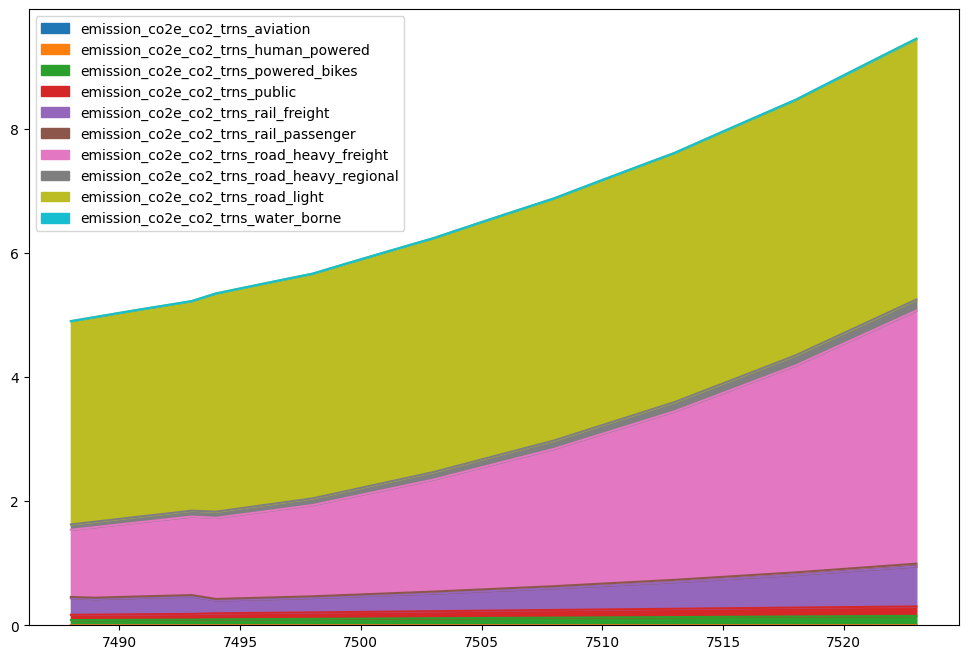

In [6]:
df_plot = df_out[
    df_out["primary_id"].isin([0]) &
    df_out["region"].isin(["guatemala"])
][[x for x in df_out.columns if x.startswith("emission_co2e_co2") and ("trns" in x)]]

fig, ax = plt.subplots(figsize = (12, 8))
df_plot.plot.area(ax = ax)

In [8]:
df_try = df_out[
    df_out["primary_id"].isin([0]) &
    df_out["region"].isin(["brazil"])
];

In [37]:
subsec = "Industrial Energy"
dict_repl = {
    "Carbon Capture and Sequestration": "CCSQ",
    "Stationary Combustion and Other Energy": "SCOE"
}

for subsec in ["Carbon Capture and Sequestration", "Industrial Energy", "Stationary Combustion and Other Energy", "Transportation"]:
    #sisepuede.model_attributes.get_standard_variables(
    #    df_try,
        #"Energy Demand by Fuel in Industrial Energy"
    #    "Energy Consumption from Transportation"
    #)
    
    snm = dict_repl.get(subsec, subsec)
    
    vl_1 = sisepuede.model_attributes.build_varlist(
        subsec, f"Energy Consumption from {snm}"
    )
    vl_2 = sisepuede.model_attributes.build_varlist(
        "Energy Fuels", f"Energy Demand by Fuel in {snm}"
    )
    
    print(subsec)
    print("-"*len(subsec) + "\n")
    
    str_print = " +\n".join(vl_1) + "\n = \n" + " +\n".join(vl_2) + "\n\n\n"
    
    print(str_print)



Carbon Capture and Sequestration
--------------------------------

energy_consumption_ccsq_direct_air_capture
 = 
energy_demand_enfu_subsector_total_pj_ccsq_fuel_biofuels +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_biogas +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_biomass +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_coal +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_coke +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_diesel +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_electricity +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_gas_furnace +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_gas_petroleum_liquid +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_gasoline +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_geothermal +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_hydrogen +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_hydropower +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_kerosene +
energy_demand_enfu_subsector_total_pj_ccsq_fuel_nat

In [17]:
df_out[
    (df_out["time_period"] == 35) &
    (df_out["primary_id"] == 0)
][["primary_id", "region", "energy_demand_enfu_subsector_total_pj_inen_fuel_coal"]]




,primary_id,region,energy_demand_enfu_subsector_total_pj_inen_fuel_coal
35,0,argentina,229.046741
971,0,brazil,1260.032978
1907,0,chile,121.707515
2843,0,colombia,355.019806
3779,0,costa_rica,41.374175
4715,0,dominican_republic,83.226304
5651,0,ecuador,61.921287
6587,0,el_salvador,26.714798
7523,0,guatemala,94.181011
8459,0,honduras,38.230958


In [10]:
df_out[df_out["time_period"] == 35][["primary_id", "region", "energy_demand_enfu_subsector_total_pj_trns_fuel_electricity"]]

,primary_id,region,energy_demand_enfu_subsector_total_pj_trns_fuel_electricity
35,0,argentina,2.422414
71,5005,argentina,2.422414
107,6006,argentina,2.422414
143,7007,argentina,2.422414
179,8008,argentina,2.422414
...,...,...,...
15767,25025,uruguay,0.169664
15803,26026,uruguay,0.169664
15839,27027,uruguay,0.169664
15875,28028,uruguay,0.169664


In [11]:
dict_check = sisepuede.experimental_manager.dict_future_trajectories["brazil"].dict_sampling_units
#for k in dict_check.keys():
#    if "frac_trns_fuelmix_public_electricity" in dict_check[k].variable_specifications:
#        print(k)
su = dict_check.get(1223)
su.generate_future(0, 1, baseline_future_q = True)
su.variable_specifications

['frac_trns_fuelmix_public_electricity']

In [82]:
baseline_future_q = True

In [12]:
baseline_future_q = True
strat_base = 0
rv = su.uncertainty_ramp_vector
vs = su.variable_specifications[0]

dict_ordered_traj_arrays = su.ordered_trajectory_arrays.get((vs, None))
dict_scalar_diff_arrays = su.scalar_diff_arrays.get((vs, None))
dict_var_info = su.dict_variable_info.get((vs, None))

# order the uniform scaling by the ordered trajectory arrays
vec_unif_scalar = su.ordered_by_ota_from_fid_dict(dict_var_info["uniform_scaling_q"], (vs, None))
# gives 1s where we keep standard fanning (using the ramp vector) and 0s where we use uniform scaling
vec_base = 1 - vec_unif_scalar
#
if max(vec_unif_scalar) > 0:
    vec_max_scalar = su.ordered_by_ota_from_fid_dict(dict_var_info["max_scalar"], (vs, None))
    vec_min_scalar = su.ordered_by_ota_from_fid_dict(dict_var_info["min_scalar"], (vs, None))
    vec_unif_scalar = vec_unif_scalar*(vec_min_scalar + lhs_trial_x*(vec_max_scalar - vec_min_scalar)) if not baseline_future_q else np.ones(vec_unif_scalar.shape)

vec_unif_scalar = np.array([vec_unif_scalar]).transpose()
vec_base = np.array([vec_base]).transpose()

In [13]:
delta_max = dict_scalar_diff_arrays.get("max_tp_end_delta")
delta_min = dict_scalar_diff_arrays.get("min_tp_end_delta")
delta_diff = delta_max - delta_min
delta_val = delta_min + 1*delta_diff

In [14]:
# delta and uniform scalar don't apply if operating under baseline future
delta_vec = 0.0 if baseline_future_q else (rv * np.array([delta_val]).transpose())

arr_out = dict_ordered_traj_arrays.get("data") + delta_vec
arr_out = arr_out*vec_base + vec_unif_scalar*dict_ordered_traj_arrays.get("data")

In [18]:
# get series of strategies
series_strats = list(dict_ordered_traj_arrays.get("id_coordinates")[su.key_strategy])
w = np.where(np.array(series_strats) == strat_base)[0]
# get strategy adjustments
lhs_mult_deltas = 1.0 if baseline_future_q else lhs_trial_l
vec_alt = np.zeros((1, len(su.time_periods)))
array_strat_deltas = np.concatenate(
    [
        su.dict_strategy_info["difference_arrays_by_strategy"].get(x, vec_alt)
        for x in series_strats
    ]
)
#array_strat_deltas = np.concatenate(
#	series_strats.apply(
#		self.dict_strategy_info["difference_arrays_by_strategy"].get,
#		args = (np.zeros((1, len(self.time_periods))), )
#	)
#)*lhs_mult_deltas

array_strat_deltas *= lhs_mult_deltas
arr_out = (array_strat_deltas + arr_out[w, :]) if (len(w) > 0) else arr_out

In [20]:
series_strats

[0, 1, 2, 1001, 2001, 3001, 4001, 5001]

In [121]:
xx = series_strats.apply(
    su.dict_strategy_info["difference_arrays_by_strategy"].get,
    args = (np.zeros((1, len(su.time_periods))), )
)

In [130]:
dict_test = {"this": 5, "that": 9}


In [127]:
# get series of strategies
series_strats = list(dict_ordered_traj_arrays.get("id_coordinates")[su.key_strategy])
w = np.where(np.array(series_strats) == strat_base)[0]
# get strategy adjustments
lhs_mult_deltas = 1.0 if baseline_future_q else lhs_trial_l
vec_alt = np.zeros((1, len(su.time_periods)))
array_strat_deltas = np.concatenate(
    [
        su.dict_strategy_info["difference_arrays_by_strategy"].get(x, vec_alt)
        for x in series_strats
    ]
)



In [112]:
su.dict_strategy_info["difference_arrays_by_strategy"].get(series_strats[1])

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.03913043,
        0.07826087, 0.1173913 , 0.15652174, 0.19565217, 0.23478261,
        0.27391304, 0.31304348, 0.35217391, 0.39130435, 0.43043478,
        0.46956522, 0.50869565, 0.54782609, 0.58695652, 0.62608696,
        0.66521739, 0.70434783, 0.74347826, 0.7826087 , 0.82173913,
        0.86086957, 0.9       , 0.9       , 0.9       , 0.9       ,
        0.9       ]])

In [8]:
ft = sisepuede.experimental_manager.dict_future_trajectories["brazil"]
df_try = ft.generate_future_from_lhs_vector(
    None,
    None,
    future_id = 0,
    baseline_future_q = True
)

df_try[df_try["time_period"] == 35][["strategy_id", "time_period"] + [x for x in df_try.columns if x.startswith("frac_trns_fuelmix")]]

,strategy_id,time_period,frac_trns_fuelmix_aviation_electricity,frac_trns_fuelmix_aviation_hydrogen,frac_trns_fuelmix_aviation_kerosene,frac_trns_fuelmix_powered_bikes_electricity,frac_trns_fuelmix_powered_bikes_gasoline,frac_trns_fuelmix_public_biofuels,frac_trns_fuelmix_public_diesel,frac_trns_fuelmix_public_electricity,...,frac_trns_fuelmix_road_heavy_regional_natural_gas,frac_trns_fuelmix_road_light_biofuels,frac_trns_fuelmix_road_light_diesel,frac_trns_fuelmix_road_light_electricity,frac_trns_fuelmix_road_light_gasoline,frac_trns_fuelmix_road_light_hydrogen,frac_trns_fuelmix_water_borne_diesel,frac_trns_fuelmix_water_borne_electricity,frac_trns_fuelmix_water_borne_hydrogen,frac_trns_fuelmix_water_borne_natural_gas
35,0,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
71,1,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
107,2,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
143,1001,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
179,2001,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
215,3001,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
251,3002,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
287,3003,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
323,3004,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0
359,3005,35,0.0,0.13,0.87,0.03,0.97,0.0,0.832440,0.000894,...,0.030000,0.0,0.030082,0.000927,0.968992,0.0,1.0,0.0,0.0,0.0


In [7]:
df_try

,future_id,time_period,strategy_id,area_gnrl_country_ha,avgload_trns_freight_tonne_per_vehicle_rail_freight,avgload_trns_freight_tonne_per_vehicle_road_heavy_freight,avgload_trns_freight_tonne_per_vehicle_water_borne,avgmass_lvst_animal_buffalo_kg,avgmass_lvst_animal_cattle_dairy_kg,avgmass_lvst_animal_cattle_nondairy_kg,...,yf_agrc_fruits_tonne_ha,yf_agrc_herbs_and_other_perennial_crops_tonne_ha,yf_agrc_nuts_tonne_ha,yf_agrc_other_annual_tonne_ha,yf_agrc_other_woody_perennial_tonne_ha,yf_agrc_pulses_tonne_ha,yf_agrc_rice_tonne_ha,yf_agrc_sugar_cane_tonne_ha,yf_agrc_tubers_tonne_ha,yf_agrc_vegetables_and_vines_tonne_ha
0,0,0,0,851577000.0,2923.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,19.625305,0.928300,2.714180,1.650240,4.404067,1.053567,5.752500,74.202600,16.945400,23.352171
1,0,1,0,851577000.0,2923.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,18.450614,0.908800,1.923760,1.561520,4.602733,1.558033,5.464300,75.176300,17.112775,24.085471
2,0,2,0,851577000.0,2923.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,19.820124,0.938300,2.034620,1.704260,5.412067,1.330933,6.213100,74.455900,17.432550,24.498743
3,0,3,0,851577000.0,2923.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,19.747876,0.869200,2.256860,1.743060,5.181767,1.568433,6.307400,74.575900,17.414775,25.249429
4,0,4,0,851577000.0,2923.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,19.682295,0.875600,1.987220,1.608520,5.488767,1.762200,6.063300,74.657000,17.579100,25.731600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,0,31,5001,851577000.0,4082.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,33.595444,1.494550,3.391959,2.745561,9.368702,3.007875,10.349365,127.431024,30.005528,43.920920
1256,0,32,5001,851577000.0,4082.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,34.267352,1.524441,3.459798,2.800472,9.556076,3.068033,10.556352,129.979644,30.605639,44.799338
1257,0,33,5001,851577000.0,4082.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,34.952699,1.554930,3.528994,2.856482,9.747197,3.129394,10.767479,132.579237,31.217751,45.695325
1258,0,34,5001,851577000.0,4082.0,31.751466,145000.0,322.900664,520.741388,310.599686,...,35.651753,1.586028,3.599574,2.913611,9.942141,3.191981,10.982829,135.230822,31.842106,46.609232


In [39]:
df_in = su.df_variable_definitions #if not isinstance(df_in, pd.DataFrame) else df_in
fields_id = su.fields_id #if not isinstance(fields_id, list) else fields_id
field_merge_key = su.primary_key_id_coordinates# if (field_merge_key is None) else field_merge_key
tups_id = set([tuple(x) for x in np.array(df_in[fields_id])])

for tg_type in su.required_tg_specs:
    df_check = df_in[df_in[su.field_variable_trajgroup_type] == tg_type]
    for vs in list(df_check[su.field_variable].unique()):
        tups_id = tups_id & set([tuple(x) for x in np.array(df_check[df_check[su.field_variable] == vs][fields_id])])
#
tups_id = sorted(list(tups_id))
df_scen = pd.DataFrame(tups_id, columns = fields_id)
df_in = pd.merge(df_in, df_scen, how = "inner", on = fields_id)
df_scen[field_merge_key] = range(len(df_scen))
tups_id = sorted(list(tups_id))

3386.0

<AxesSubplot: xlabel='time_period'>

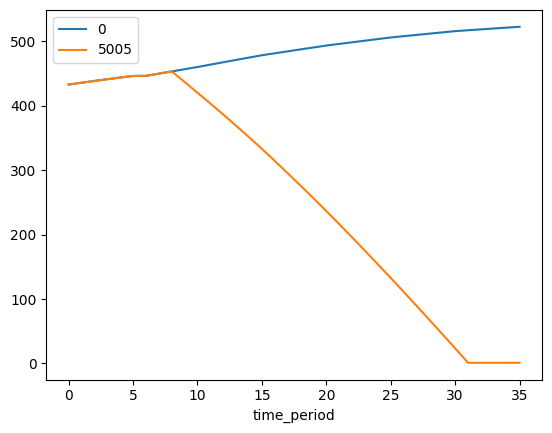

In [7]:
import support_functions as sf
fields = [x for x in df_out.columns if x.startswith("emission_co2e_subsector_total_entc")]
fields = [x for x in df_out.columns if x.startswith("emission_co2e_subsector_total_trns")]
df_wide = df_out[df_out["region"] == "brazil"][["primary_id", "time_period"] + fields]
df_wide = sf.pivot_df_clean(df_wide, ["primary_id"], fields);
df_wide.plot(x = "time_period")


In [24]:
import model_afolu as mafl
import model_ippu as mi
import model_energy as me
import model_circular_economy as mce
import setup_analysis as sa
import importlib
import numpy as np
import os, os.path
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df_input = pd.read_csv("/Users/jsyme/Desktop/df_input_tmp.csv")
df_input["efficfactor_ccsq_heat_energy_direct_air_capture_electricity"] = 0.99

In [106]:
import inspect
#inspect.getmembers(sisepuede.database)
ft = sisepuede.experimental_manager.dict_future_trajectories.get("brazil")
df_input = ft.generate_future_from_lhs_vector(
    None,
    df_row_lhc_sample_l = None,
    future_id = 0,
    baseline_future_q = 0
)

df_input = df_input[df_input["strategy_id"] == 0].reset_index(drop = True).drop(["future_id", "strategy_id"], axis = 1)

In [142]:
df_input.to_csv("/Users/jsyme/Desktop/df_input_tmp.csv", index = None, encoding = "UTF-8")

In [21]:
df_input = pd.read_csv("/Users/jsyme/Desktop/df_input_tmp.csv")

In [392]:
import ordered_direct_product_table as odpt
importlib.reload(odpt)  
            
    
    

vit = odpt.OrderedDirectProductTable(
    {"strategy_id": list(range(100)), "future_id": list(range(1000)), "design_id": [0, 1, 2, 3], "time_series_id": [0, 1, 2]},
    ["design_id", "time_series_id", "strategy_id", "future_id"],
    key_primary = "primary_id"
)


In [399]:
vit.get_dims_from_key(596, return_type = "dict")

{'design_id': 0, 'time_series_id': 0, 'strategy_id': 0, 'future_id': 596}

In [376]:
import time
t0 = time.time()

df1 = vit.get_indexing_dataframe(key_values = {"future_id": list(range(4000)), "strategy_id": [0, 5, 99]}, keys_return = ["primary_id"])

sf.get_time_elapsed(t0, n_digits = 5)

1.41068

In [401]:
vit.get_indexing_dataframe(key_values = {"future_id": list(range(5)), "strategy_id": [0, 5, 99]}, keys_return = ["primary_id"])




['primary_id']


,primary_id
0,0
1,1
2,2
3,3
4,4
...,...
175,1199000
176,1199001
177,1199002
178,1199003


In [332]:
#vit.get_indexing_dataframe(key_values = rands)
vit.get_key_value(**{"design_id": 3, "time_series_id": 0, "strategy_id": 98, "future_id": 71672})

99871672

In [346]:
#vit.get_key_value(**{"design_id": 3, "time_series_id": 0, "strategy_id": 98, "future_id": 71672})





get_dims_from_key(99871672, return_type = "dict")

{'design_id': 3, 'time_series_id': 0, 'strategy_id': 98, 'future_id': 71672}

In [338]:
99871672%30000000

9871672

In [330]:
#rands = np.random.choice(range(10**8), 3000, replace = False);
60/15
0%1

0

In [ ]:
#
# idea: 
#    0. generate output table of proper shape
#    1. generate dimensional vector
#    2. take subset of that vector
#    3. add to output table
#

In [262]:
vit.cardinality_ordered_reversed
vit.cumulative_dimensional_products_reversed
vit.get_key_value(**{"design_id": 3, "strategy_id": 1, "future_id": 0})



0
1
0
3


6400000

In [47]:
key = "this"
def func(**kwargs):
    for k in kwargs.keys():
        val = kwargs.get(k)
        print(f"{k}:\t{val}")
        
func(**{"strategy_id": 0, "primary_id": 2})

strategy_id:	0
primary_id:	2


In [7]:
import model_attributes as ma
import model_afolu as mafl
import model_ippu as mi
import model_circular_economy as mc
import model_energy as me
import model_electricity as ml
import model_socioeconomic as se
import setup_analysis as sa
import support_functions as sf
import importlib
import time
import warnings
import sql_utilities as sq
from typing import *
import sqlalchemy
import sql_utilities as sqlutil

import importlib

importlib.reload(ma)
importlib.reload(sa)
importlib.reload(mafl)
importlib.reload(me)
importlib.reload(ml)

#importlib.reload(mafl)

warnings.filterwarnings("ignore")

#df_cs_integrated = pd.read_csv(os.path.join(sa.dir_tmp, "temporary_full_inputs.csv"))
#df_cs_integrated = df_cs_integrated[
#    df_cs_integrated["strategy_id"].isin([0])
#].reset_index(drop = True)

df_cs_integrated = sisepuede.experimental_manager.dict_future_trajectories.get("mexico").generate_future_from_lhs_vector(None, None, 0, True)
df_cs_integrated = df_cs_integrated[
    (df_cs_integrated["strategy_id"] == 3005)
].reset_index(drop = True)

vars_try = [x for x in df_cs_integrated.columns if x.startswith("fuelefficiency_") and ("road_light" in x)]
for x in vars_try:
    df_cs_integrated[x] = min(np.array(df_cs_integrated[x]))

    
model_afolu = mafl.AFOLU(sa.model_attributes);
model_circecon = mc.CircularEconomy(sa.model_attributes);
model_ippu = mi.IPPU(sa.model_attributes);
model_energy = me.NonElectricEnergy(sa.model_attributes);

# 
df_project_afolu = model_afolu.project(df_cs_integrated)
df_cs_integrated = sf.merge_output_df_list([df_cs_integrated, df_project_afolu], sa.model_attributes, "concatenate")

# pass integrated df
df_project_ce = model_circecon.project(df_cs_integrated)
df_cs_integrated = sf.merge_output_df_list([df_cs_integrated, df_project_ce], sa.model_attributes, "concatenate")

# pass integrated df
df_project_ip = model_ippu.project(df_cs_integrated)
df_cs_integrated = sf.merge_output_df_list([df_cs_integrated, df_project_ip], sa.model_attributes, "concatenate")

# pass integrated df
df_project_en = model_energy.project(df_cs_integrated, subsectors_project = ["ccsq", "inen", "scoe", "trns", "fgtv"]);
df_cs_integrated = sf.merge_output_df_list([df_cs_integrated, df_project_en], sa.model_attributes, "concatenate")

model_elec = ml.ElectricEnergy(sa.model_attributes, sa.dir_jl, sa.dir_ref_nemo, logger = logger)


2023-02-22 12:51:21,246 - INFO - Calling Julia API...
2023-02-22 12:51:21,390 - DEBUG - 	Successfully activated Julia with compiled_modules = False
2023-02-22 12:51:21,391 - DEBUG - 	Successfully imported julia.Base
2023-02-22 12:51:21,391 - DEBUG - 	Successfully imported julia.Main
2023-02-22 12:51:21,393 - DEBUG - 	Successfully imported julia.Pkg
2023-02-22 12:51:22,187 - DEBUG - 	Available Packages:
		'CSV'
		 'HiGHS'
		 'SQLite'
		 'Clp'
		 'JuMP'
		 'NemoMod'
		 'GAMS'
		 'Cbc'
		 'DataFrames'
		 'Gurobi'
		 'MathOptInterface'
  Activating2023-02-22 12:51:23,374 - INFO - Successfully activated Julia environment at '/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/julia'
 project at `~/Documents/Projects/git_jbus/lac_decarbonization/julia`
2023-02-22 12:51:23,476 - INFO - Successfully initialized JuMP optimizer from solver module Gurobi.


In [29]:
importlib.reload(ma)
importlib.reload(sa)
sa.model_attributes.get_region_list_filtered("chile")

['chile']

In [11]:
model_elec.dict_nemomod_reference_tables.keys()

dict_keys(['CapacityFactor', 'SpecifiedDemandProfile'])

In [12]:
model_elec.format_nemomod_table_capacity_factor(
    model_elec.dict_nemomod_reference_tables.get("CapacityFactor")
)

{'CapacityFactor':           id           r          t            l     y   val
 0          1  costa_rica  pp_biogas  dec_feb_wd0  1000  0.50
 1          2  costa_rica  pp_biogas  dec_feb_wd0  1001  0.50
 2          3  costa_rica  pp_biogas  dec_feb_wd0  1002  0.50
 3          4  costa_rica  pp_biogas  dec_feb_wd0  1003  0.50
 4          5  costa_rica  pp_biogas  dec_feb_wd0  1004  0.50
 ...      ...         ...        ...          ...   ...   ...
 13819  13820  costa_rica    pp_wind  sep_nov_we6  1031  0.27
 13820  13821  costa_rica    pp_wind  sep_nov_we6  1032  0.27
 13821  13822  costa_rica    pp_wind  sep_nov_we6  1033  0.27
 13822  13823  costa_rica    pp_wind  sep_nov_we6  1034  0.27
 13823  13824  costa_rica    pp_wind  sep_nov_we6  1035  0.27
 
 [13824 rows x 6 columns]}

In [ ]:

model_elec.format_nemomod_table_specified_demand_profile()

In [66]:
sisepuede.model_attributes.get_standard_variables(
    df_cs_integrated,
    model_energy.modvar_inen_energy_consumption_total
)

,energy_consumption_inen_agriculture_and_livestock,energy_consumption_inen_cement,energy_consumption_inen_chemicals,energy_consumption_inen_electronics,energy_consumption_inen_glass,energy_consumption_inen_lime_and_carbonite,energy_consumption_inen_metals,energy_consumption_inen_other_product_manufacturing,energy_consumption_inen_paper,energy_consumption_inen_plastic,energy_consumption_inen_recycled_glass,energy_consumption_inen_recycled_metals,energy_consumption_inen_recycled_paper,energy_consumption_inen_recycled_plastic,energy_consumption_inen_recycled_rubber_and_leather,energy_consumption_inen_recycled_textiles,energy_consumption_inen_recycled_wood,energy_consumption_inen_rubber_and_leather,energy_consumption_inen_textiles
0,3.159000,242.661005,18.839838,0.418887,0.436975,0.336364,313.939442,0.278809,21.868323,8.131261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.119719,1.287580
1,3.137413,240.588907,18.858404,0.420287,0.429323,0.336306,314.112042,0.260651,22.071983,8.145407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.119671,1.287892
2,3.176989,241.390972,18.921273,0.421688,0.428351,0.337427,315.150235,0.264126,22.119334,8.159666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.119882,1.290949
3,3.220262,242.185120,18.983522,0.423075,0.427325,0.338537,316.177628,0.267602,22.164753,8.173101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.120086,1.293897
4,3.252176,242.971533,19.045164,0.424449,0.426307,0.339636,317.195294,0.271078,22.210414,8.186709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.120288,1.296857
5,3.341644,243.750383,19.106214,0.425809,0.425344,0.340725,318.204054,0.274554,22.257866,8.201201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.120494,1.299916
6,3.432190,245.686597,19.257983,0.429192,0.425996,0.343431,320.753114,0.283277,22.482030,8.286031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.121330,1.313494
7,3.529621,247.578092,19.406246,0.432496,0.424684,0.346075,323.218604,0.292001,22.637461,8.339671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.121945,1.323186
8,3.631408,249.427205,19.551188,0.435726,0.423279,0.348660,325.628729,0.300724,22.788952,8.391856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.122538,1.332645
9,3.737724,251.236088,19.692976,0.438886,0.421784,0.351189,327.986297,0.309448,22.936703,8.442661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.123111,1.341884


In [89]:
fp_sqlite_intermediate = sisepuede.file_struct.fp_sqlite_tmp_nemomod_intermediate
os.remove(fp_sqlite_intermediate) if os.path.exists(fp_sqlite_intermediate) else None
engine = sqlalchemy.create_engine(f"sqlite:///{fp_sqlite_intermediate}")
t0 = time.time()
df_test = model_elec.project(df_cs_integrated, engine = engine)
t1 = time.time()

2023-02-20 00:09:39,451 - INFO - 	Path to temporary NemoMod database '/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite' not found. Creating...


2023-20-Feb 00:09:39.455 Opened SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2023-20-Feb 00:09:39.487 Added NEMO structure to SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/vg6Tx/src/scenario_calculation.jl:6107
2023-02-20 00:10:00,252 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>


2023-20-Feb 00:09:41.195 Started modeling scenario.
2023-20-Feb 00:10:00.056 Finished modeling scenario.


In [78]:
table_name = "vregenerationannualnn"
#table_name = "vproductionbytechnologyannual"
#table_name = "REMinProductionTarget"
df = sqlutil.sql_table_to_df(engine, table_name)


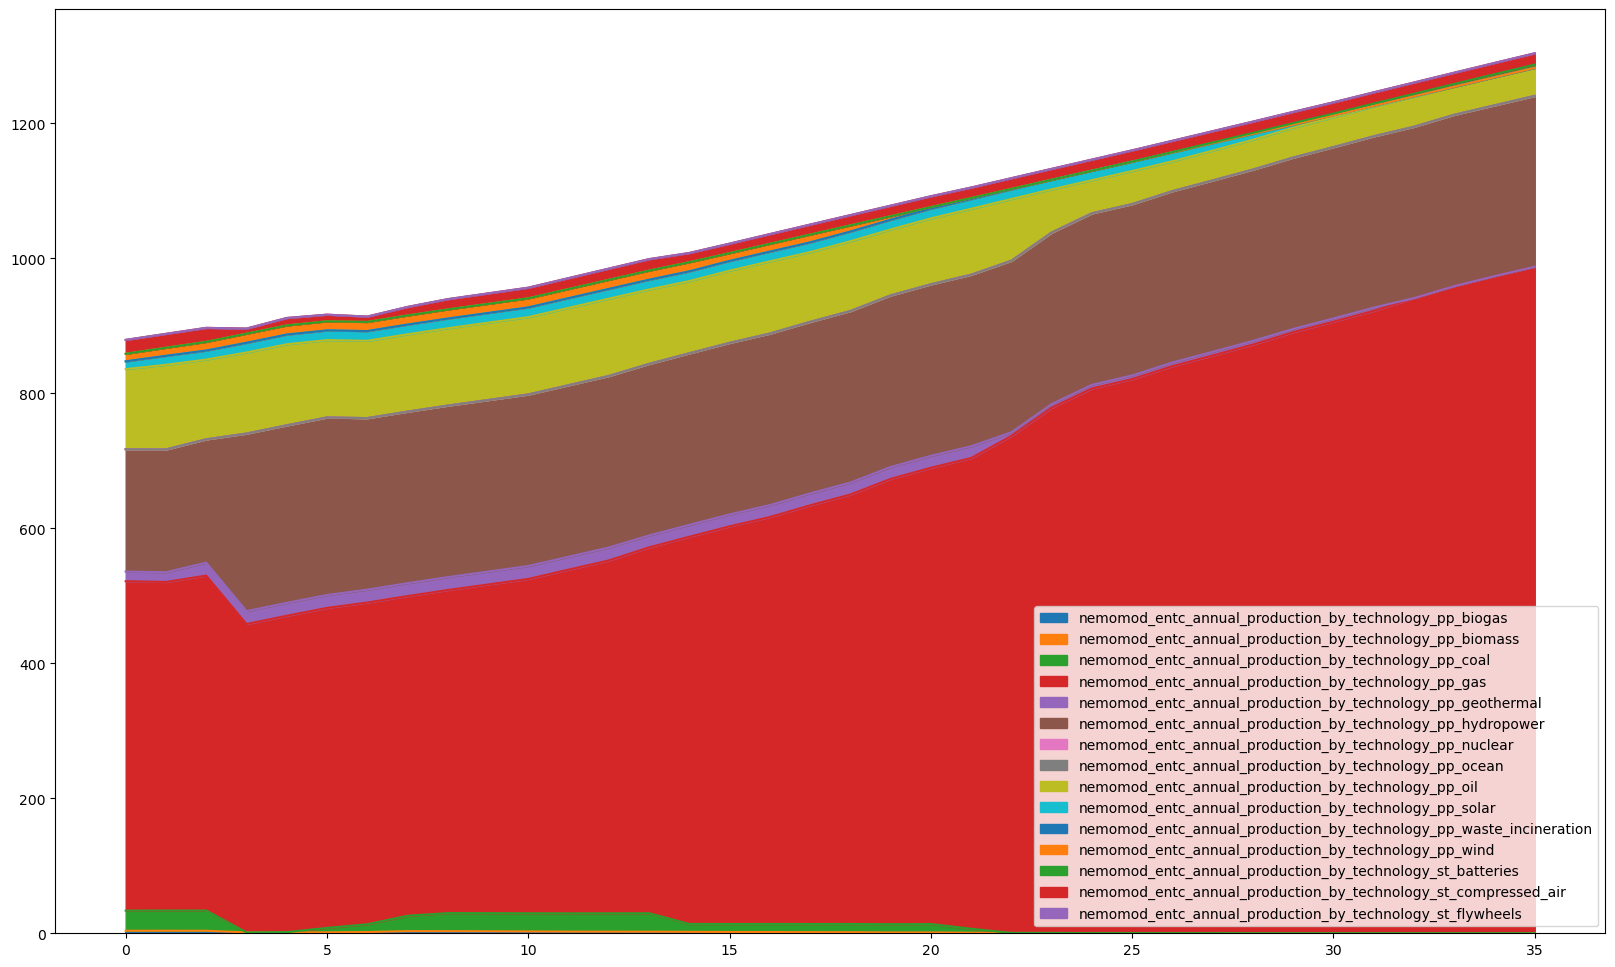

In [90]:

dict_filt2 = {}


fig, ax = plt.subplots(figsize = (20, 12))

if True:
    sisepuede.model_attributes.get_standard_variables(
        df_test,
        sisepuede.models.model_electricity.modvar_entc_nemomod_production_by_technology
    ).plot.area(ax = ax)
else:
    sisepuede.model_attributes.get_standard_variables(
        df_cs_integrated,
        sisepuede.models.model_electricity.modvar_entc_nemomod_residual_capacity
    ).plot.area(ax = ax)

In [77]:
import inspect
import time
inspect.getmembers(sisepuede.database.db)

dir_exp = os.path.join(sisepuede.file_struct.dir_out, f"csvs_{sisepuede.analysis_id.id_fs_safe}")
if not os.path.exists(dir_exp):
    os.makedirs(dir_exp, exist_ok = True)
    
t0 = time.time()
for k in sisepuede.database.db.dict_iterative_database_tables:
    
    print(f"Starting table {k}...")
    
    fp_write = os.path.join(dir_exp, f"{k}.csv")
    
    if not os.path.exists(fp_write):
        idt = sisepuede.database.db.dict_iterative_database_tables.get(k)
        tab = idt.read_table()

        tab.to_csv(
            fp_write,
            index = None,
            encoding = "UTF-8"
        ) if (tab is not None) else None
    
    t_elapse = np.round(time.time() - t0, decimals = 4)
    print(f"Table {k} complete at {t_elapse} seconds.\n\n")
    


Starting table ANALYSIS_METADATA...
Table ANALYSIS_METADATA complete at 0.0016 seconds.


Starting table ATTRIBUTE_DESIGN...
Table ATTRIBUTE_DESIGN complete at 0.0017 seconds.


Starting table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES...
Table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES complete at 0.0017 seconds.


Starting table ATTRIBUTE_LHC_SAMPLES_LEVER_EFFECTS...
Table ATTRIBUTE_LHC_SAMPLES_LEVER_EFFECTS complete at 0.0018 seconds.


Starting table ATTRIBUTE_PRIMARY...
Table ATTRIBUTE_PRIMARY complete at 0.0019 seconds.


Starting table ATTRIBUTE_STRATEGY...
Table ATTRIBUTE_STRATEGY complete at 0.0019 seconds.


Starting table MODEL_BASE_INPUT_DATABASE...
Table MODEL_BASE_INPUT_DATABASE complete at 0.002 seconds.


Starting table MODEL_INPUT...
Table MODEL_INPUT complete at 0.0022 seconds.


Starting table MODEL_OUTPUT...
Table MODEL_OUTPUT complete at 23.5008 seconds.




In [64]:
df = sisepuede.database.db.dict_iterative_database_tables.get("MODEL_OUTPUT").read_table();


##  RUBBER AND LEATHER ISSUES

In [ ]:
dict_inputs = sisepuede.generate_scenario_database_from_primary_key(0);


In [30]:
region_check = "brazil"
df_input_check = dict_inputs.get(region_check)
df_output_check = df_out[
    df_out["primary_id"].isin([0]) &
    df_out["region"].isin([region_check])
].reset_index(drop = True)

In [31]:
df_input_check[[x for x in df_input_check.columns if "rubber" in x]].head()

,consumpinit_inen_energy_tj_per_tonne_production_recycled_rubber_and_leather,consumpinit_inen_energy_tj_per_tonne_production_rubber_and_leather,demscalar_ippu_rubber_and_leather,ef_waso_incineration_tonne_n2o_per_tonne_rubber_leather,elasticity_ippu_rubber_and_leather_production_to_gdp,elasticity_waso_msw_to_gdppc_rubber_leather,factor_waso_waste_per_capita_scalar_rubber_leather,frac_inen_energy_recycled_rubber_and_leather_coal,frac_inen_energy_recycled_rubber_and_leather_coke,frac_inen_energy_recycled_rubber_and_leather_diesel,...,frac_waso_recycled_rubber_leather,physparam_waso_k_rubber_leather,prodinit_ippu_recycled_rubber_and_leather_tonne,prodinit_ippu_rubber_and_leather_tonne,qty_ippu_recycled_rubber_and_leather_tonne_cod_per_m3_ww,qty_ippu_rubber_and_leather_tonne_cod_per_m3_ww,scalar_inen_energy_demand_recycled_rubber_and_leather,scalar_inen_energy_demand_rubber_and_leather,vol_ippu_recycled_rubber_and_leather_m3_ww_per_tonne_production,vol_ippu_rubber_and_leather_m3_ww_per_tonne_production
0,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.050828,0.005648,0.000187,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182
1,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.045194,0.005022,0.000212,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182
2,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.045194,0.005022,0.000212,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182
3,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.045194,0.005022,0.000212,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182
4,0.0004,0.004,0.924415,0.000087,0.25,0.874549,1.0,0.045194,0.005022,0.000212,...,0.066,0.0,0.0,5.112787e+09,0.0,2.035616,1.0,1.0,16.391732,25.467182


In [32]:
df_input_check[[x for x in df_input_check.columns if "cement" in x]].head()

,consumpinit_inen_energy_tj_per_tonne_production_cement,dem_ippu_average_materials_tonne_per_household_cement,demscalar_ippu_cement,ef_ippu_tonne_co2_per_tonne_production_cement_clinker,elasticity_ippu_cement_production_to_gdp,frac_inen_energy_cement_coal,frac_inen_energy_cement_coke,frac_inen_energy_cement_diesel,frac_inen_energy_cement_electricity,frac_inen_energy_cement_gas_furnace,...,frac_inen_energy_cement_natural_gas,frac_inen_energy_cement_oil,frac_inen_energy_cement_solar,frac_inen_energy_cement_solid_biomass,frac_ippu_cement_clinker,net_imports_cement_clinker_tonne,prodinit_ippu_cement_tonne,qty_ippu_cement_tonne_cod_per_m3_ww,scalar_inen_energy_demand_cement,vol_ippu_cement_m3_ww_per_tonne_production
0,0.02,3.0,0.995377,0.264371,0.25,0.318215,0.035357,0.059189,0.158820,0.0,...,0.064766,0.276215,0.0,0.028249,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123
1,0.02,3.0,0.995377,0.264371,0.25,0.298649,0.033183,0.058397,0.162722,0.0,...,0.089334,0.272521,0.0,0.026796,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123
2,0.02,3.0,0.995377,0.264371,0.25,0.298649,0.033183,0.058397,0.162722,0.0,...,0.089334,0.272521,0.0,0.026796,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123
3,0.02,3.0,0.995377,0.264371,0.25,0.298649,0.033183,0.058397,0.162722,0.0,...,0.089334,0.272521,0.0,0.026796,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123
4,0.02,3.0,0.995377,0.264371,0.25,0.298649,0.033183,0.058397,0.162722,0.0,...,0.089334,0.272521,0.0,0.026796,0.937025,498.550172,62707429.49,0.890074,1.0,24.281123


In [28]:
df_input_check[[x for x in df_input_check.columns if ("rubber" in x) and x.startswith("frac_waso")]].head()

,frac_waso_initial_composition_ind_rubber_leather,frac_waso_initial_composition_mun_rubber_leather,frac_waso_recycled_rubber_leather
0,0.0,0.0,0.066
1,0.0,0.0,0.066
2,0.0,0.0,0.066
3,0.0,0.0,0.066
4,0.0,0.0,0.066


In [27]:
import inspect
import sqlalchemy
import sql_utilities as sq
engine = sqlalchemy.create_engine(
    f"sqlite:///{sisepuede.models.fp_nemomod_temp_sqlite_db}"
)



In [43]:
df_iar = sq.sql_table_to_df(
    engine,
    "InputActivityRatio"
    #"InputActivityRatio"
)
df_oar = sq.sql_table_to_df(
    engine,
    "OutputActivityRatio"
    #"InputActivityRatio"
)
df_oar

,id,r,t,f,m,y,val
0,1,costa_rica,pp_biogas,fuel_electricity,generate,1000,1.0
1,2,costa_rica,pp_biogas,fuel_electricity,generate,1001,1.0
2,3,costa_rica,pp_biogas,fuel_electricity,generate,1002,1.0
3,4,costa_rica,pp_biogas,fuel_electricity,generate,1003,1.0
4,5,costa_rica,pp_biogas,fuel_electricity,generate,1004,1.0
...,...,...,...,...,...,...,...
967,968,costa_rica,supply_fuel_wind,fuel_wind,generate,1031,1.0
968,969,costa_rica,supply_fuel_wind,fuel_wind,generate,1032,1.0
969,970,costa_rica,supply_fuel_wind,fuel_wind,generate,1033,1.0
970,971,costa_rica,supply_fuel_wind,fuel_wind,generate,1034,1.0


In [2]:
sq.sql_table_to_df(
    engine,
    "FUELS"
    #"InputActivityRatio"
)

NameError: name 'sq' is not defined

In [36]:
engine.table_names()

['AccumulatedAnnualDemand',
 'AnnualEmissionLimit',
 'AnnualExogenousEmission',
 'AvailabilityFactor',
 'CapacityFactor',
 'CapacityOfOneTechnologyUnit',
 'CapacityToActivityUnit',
 'CapitalCost',
 'CapitalCostStorage',
 'DefaultParams',
 'DepreciationMethod',
 'DiscountRate',
 'EMISSION',
 'EmissionActivityRatio',
 'EmissionsPenalty',
 'FUEL',
 'FixedCost',
 'InputActivityRatio',
 'InterestRateStorage',
 'InterestRateTechnology',
 'LTsGroup',
 'MODE_OF_OPERATION',
 'MinShareProduction',
 'MinStorageCharge',
 'MinimumUtilization',
 'ModelPeriodEmissionLimit',
 'ModelPeriodExogenousEmission',
 'NODE',
 'NodalDistributionDemand',
 'NodalDistributionStorageCapacity',
 'NodalDistributionTechnologyCapacity',
 'OperationalLife',
 'OperationalLifeStorage',
 'OutputActivityRatio',
 'REGION',
 'REMinProductionTarget',
 'RETagTechnology',
 'RampRate',
 'RampingReset',
 'ReserveMargin',
 'ReserveMarginTagFuel',
 'ReserveMarginTagTechnology',
 'ResidualCapacity',
 'ResidualStorageCapacity',
 'STOR

In [9]:
ft = sisepuede.experimental_manager.dict_future_trajectories["brazil"]
df_try = ft.generate_future_from_lhs_vector(
    None,
    None,
    future_id = 0,
    baseline_future_q = True
)
df_try.to_csv(
    os.path.join(sisepuede.file_struct.dir_tmp, "temporary_full_inputs.csv"),
    encoding = "UTF-8",
    index = None
)

In [31]:
import inspect
sisepuede.odpt_primary.get_key_value(
    strategy_id = 3011,
    future_id = 0, 
    design_id = 0
)




15015

In [17]:
df_out[
    (df_out["region"] == "brazil") & 
    (df_out["time_period"].isin([4, 5])) & 
    (df_out["primary_id"].isin([0, 15015])) 
][
    [x for x in df_out.columns if ("emission_co2e" in x) and ("trns" in x)]
]


,emission_co2e_ch4_trns_aviation,emission_co2e_ch4_trns_human_powered,emission_co2e_ch4_trns_powered_bikes,emission_co2e_ch4_trns_public,emission_co2e_ch4_trns_rail_freight,emission_co2e_ch4_trns_rail_passenger,emission_co2e_ch4_trns_road_heavy_freight,emission_co2e_ch4_trns_road_heavy_regional,emission_co2e_ch4_trns_road_light,emission_co2e_ch4_trns_water_borne,...,emission_co2e_n2o_trns_human_powered,emission_co2e_n2o_trns_powered_bikes,emission_co2e_n2o_trns_public,emission_co2e_n2o_trns_rail_freight,emission_co2e_n2o_trns_rail_passenger,emission_co2e_n2o_trns_road_heavy_freight,emission_co2e_n2o_trns_road_heavy_regional,emission_co2e_n2o_trns_road_light,emission_co2e_n2o_trns_water_borne,emission_co2e_subsector_total_trns
940,0.000009,0.0,0.003729,0.003175,0.000101,0.000057,0.122332,0.006572,1.316938,0.000133,...,0.0,0.010166,0.026133,0.006799,0.003865,0.923724,0.047992,3.556169,0.000371,237.558203
941,0.000009,0.0,0.003749,0.003193,0.000100,0.000058,0.120889,0.006596,1.322850,0.000132,...,0.0,0.010222,0.026278,0.006770,0.003879,0.910773,0.048171,3.572172,0.000370,237.439346
1336,0.000009,0.0,0.003729,0.003175,0.000101,0.000057,0.123489,0.006572,1.320636,0.000133,...,0.0,0.010166,0.026133,0.006799,0.003865,0.935050,0.047992,3.565980,0.000371,238.819438
1337,0.000009,0.0,0.003749,0.003193,0.000100,0.000058,0.122964,0.006596,1.327975,0.000132,...,0.0,0.010222,0.026278,0.006770,0.003879,0.931073,0.048171,3.585797,0.000370,239.514858


In [25]:
df_check = df_out[
    df_out["region"].isin(["brazil"]) &
    df_out["primary_id"].isin([0])
].reset_index(drop = True)
df_check[[
    x for x in df_check.columns if ("regional" in x) and ("trde" in x)
]]


,dem_trde_regional_passenger_km
0,1.120458e+06
1,1.125540e+06
2,1.130507e+06
3,1.135304e+06
4,1.139856e+06
5,1.144110e+06
6,1.147918e+06
7,1.158527e+06
8,1.169114e+06
9,1.179678e+06


In [36]:
df_check[
    df_check["time_period"].isin([0, 2])
][[
    x for x in df_check.columns if ("emission" in x) and ("trns" in x)
]]

,emission_co2e_ch4_trns_aviation,emission_co2e_ch4_trns_human_powered,emission_co2e_ch4_trns_powered_bikes,emission_co2e_ch4_trns_public,emission_co2e_ch4_trns_rail_freight,emission_co2e_ch4_trns_rail_passenger,emission_co2e_ch4_trns_road_heavy_freight,emission_co2e_ch4_trns_road_heavy_regional,emission_co2e_ch4_trns_road_light,emission_co2e_ch4_trns_water_borne,...,emission_co2e_n2o_trns_human_powered,emission_co2e_n2o_trns_powered_bikes,emission_co2e_n2o_trns_public,emission_co2e_n2o_trns_rail_freight,emission_co2e_n2o_trns_rail_passenger,emission_co2e_n2o_trns_road_heavy_freight,emission_co2e_n2o_trns_road_heavy_regional,emission_co2e_n2o_trns_road_light,emission_co2e_n2o_trns_water_borne,emission_co2e_subsector_total_trns
0,4.865727e-09,0.0,1.978793e-08,0.000002,0.012289,0.000004,0.455738,0.000004,0.000005,0.000139,...,0.0,5.395002e-08,0.000012,0.828718,0.000241,1.586244,0.000032,0.000013,0.000389,95.992430
2,4.909364e-09,0.0,2.004421e-08,0.000002,0.012187,0.000004,0.087895,0.000004,0.000005,0.000138,...,0.0,5.464875e-08,0.000012,0.821786,0.000248,0.578974,0.000033,0.000013,0.000386,47.141113


In [54]:
flds = list(df_try2.columns)#[x for x in df_try2.columns if ("road_heavy_freight" in x)]
fld_check = []

for fld in flds:
    vec = np.array(df_try2[fld])
    v0, v2 = vec[0], vec[2]
    delta = np.abs(vec[2]/vec[0] - 1)
    
    if (delta > 0.05) and (("trns" in fld) or ("trde" in fld)):
        print(f"field '{fld}':\n\tv0:\t{v0}\n\tv2:\t{v2}\n")
        fld_check.append(fld)

field 'frac_trns_fuelmix_public_electricity':
	v0:	0.0014800197335964
	v2:	0.0009078529278256

field 'frac_trns_fuelmix_road_light_diesel':
	v0:	0.0273322508679524
	v2:	0.0291327470632048

field 'frac_trns_fuelmix_road_light_electricity':
	v0:	0.0002244135545786
	v2:	0.000431209084138

